# Sales Forecasting Analysis

## Project Organization

1. **Data Processing & Feature Engineering**
   - Data loading and cleaning
   - Feature engineering
   - Data splitting
   
2. **Models & Evaluation**
   - Model implementations
   - Training and evaluation
   - Performance comparison
   
3. **Visualization & Results**
   - Model performance visualization
   - Results analysis
   - Recommendations

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib settings
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True
sns.set_style('whitegrid')

# Display all columns in pandas dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Time Series Forecasting for Weekly Sales

This notebook implements various time series forecasting models to predict weekly sales per SKU per store. We'll compare different approaches ranging from simple baseline models to advanced deep learning techniques.

## Models to be implemented:
1. Baseline Models:
   - Last observed value
   - Moving average
2. Traditional Time Series Models:
   - ARIMA/SARIMA
   - Prophet
3. Machine Learning Models:
   - XGBoost
   - LightGBM
   - CatBoost
4. Deep Learning Models:
   - LSTM
   - Temporal Fusion Transformers

## Demand Forecasting in Kenya’s Second-Hand Retail Sector

---
## Business Understanding

#### Domain Knowledge – Retail Demand Forecasting

In the highly competitive retail landscape, accurate demand planning plays a critical role in driving profitability, enhancing customer satisfaction, and supporting sustainable growth for businesses. As such, demand forecasting is a fundamental element of a successful retail strategy.

#### Industry Context

Retailers are constantly challenged to manage the balance between two key risks—overstocking and understocking.

- **Overstocking** results in tied-up working capital, elevated storage expenses, and an increased likelihood of product obsolescence.

- **Understocking** can lead to missed sales opportunities, customer dissatisfaction, and a potential decline in market share.



### Challenges in the Retail Domain  

| Challenge            | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| **Seasonality**       | Demand fluctuates during holidays, school reopening, and seasonal changes.  |
| **Promotions & Discounts** | Short-term spikes caused by campaigns (e.g., holiday offers, back-to-school sales). |
| **External Factors**  | Economic trends, competitor actions, and consumer preference shifts add uncertainty. |
| **Data Quality Issues** | POS data may contain duplicates, missing values, or inconsistent product naming. |

### Forecasting Approaches  

| Approach Type        | Methods/Models                                   | Strengths                                                   |
|-----------------------|-------------------------------------------------|-------------------------------------------------------------|
| **Time-Series Models** | ARIMA, Prophet, Exponential Smoothing           | Capture seasonality, trends, and cyclical patterns well.     |
| **Machine Learning**   | Random Forest, XGBoost, LSTMs                   | Handle non-linear patterns, external predictors, and large datasets. |
| **Hybrid Approaches**  | Combination of Time-Series + ML methods         | Leverage strengths of both for improved accuracy.            |




---
The primary objective is to develop a reliable demand forecasting model that predicts future sales volumes for the company’s products. Currently, sales and replenishment decisions are largely reactive, leading to either stockouts (missed revenue opportunities and customer dissatisfaction) or overstocking (increased holding costs, wastage, and tied-up capital).
By leveraging historical sales data and external drivers, the goal is to:

+ Forecast daily/weekly/monthly demand.

+ Identify seasonal peaks and long-term trends.

+ Support data-driven planning for procurement, inventory, and sales strategies

---
### Why Forecasting Demand is Important  

| Area                     | Importance                                                                 |
|---------------------------|----------------------------------------------------------------------------|
| **Operational Efficiency** | Supports workforce planning, supply chain scheduling, and distribution logistics. |
| **Financial Performance** | Enhances budgeting accuracy, cash flow planning, and revenue predictability. |
| **Customer Experience**   | Ensures product availability during peak demand, reducing stockouts.        |
| **Strategic Decision-Making** | Enables data-driven sales target setting, marketing allocation, and supplier negotiations. |

---
### Key Stakeholders and Their Needs  

| Stakeholder                | Needs                                                                 |
|-----------------------------|----------------------------------------------------------------------|
| **Sales & Marketing Team** | Identify peak products/categories to plan promotions and campaigns.   |
| **Procurement & Supply Chain** | Optimize purchase orders, supplier negotiations, and lead-time planning. |
| **Finance & Management**   | Set realistic revenue targets, budgets, and cash flow projections.    |
| **Store/Branch Managers**  | Access localized forecasts (if multi-store) for daily stock control.  |
| **Executive Leadership**   | Understand long-term trends to guide strategic expansion decisions.   |


### Forecasting Granularity & Targets

**Granularity:** The project will assess forecasts at different levels. Product-level, category-level, and aggregated store-level. In order to meet varying stakeholder needs.

**Time Horizon:** Forecasts will be produced for daily, weekly, and monthly intervals.

**Sales Targets:** Forecasts will support both short-term targets (weekly and monthly) and long-term projections (quarterly and yearly).

### Acceptable Accuracy

While perfect forecasts are not realistic, the business aims for models that achieve:

>70–85% accuracy (measured by MAPE/RMSE) at the product level.

>90% accuracy at the aggregated store/category level.

This balance reflects the natural variability in retail demand while ensuring forecasts are reliable enough to support decision-making.

---



## Business Problem 

Thrift store chains in Kenya struggle with significant operational inefficiencies and lost profitability due to the reliance on manual, reactive judgment for inventory decisions. This approach fails to account for the market's high volatility, leading to frequent stockouts of high-demand items and excessive accumulation of slow-moving stock. The core business problem is the **absence of a data-driven demand forecasting system** to predict customer demand accurately, resulting in increased holding costs, missed sales opportunities, reduced customer satisfaction, and poor resource allocation across branches.

### Background and Context

The Kenyan thrift retail industry operates in a uniquely challenging and fast-moving environment characterized by:

*   **Irregular Supply Chains:** Inconsistent and unpredictable donations/purchases of second-hand goods lead to fluctuating and non-uniform product assortments.
*   **Volatile Consumer Demand:** Demand is heavily influenced by price sensitivity, seasonal patterns, fluctuating disposable incomes, and rapidly shifting fashion trends.
*   **Operational Inefficiency:** Despite possessing large volumes of historical sales data, retailers lack the analytical framework to transform this data into actionable insights. Decisions on restocking, procurement, and inter-store transfers are based on experience and guesswork rather than predictive intelligence.

This combination of factors creates a cycle of reactive decision-making. The absence of systematic forecasting directly contributes to:

*   **Frequent stockouts** of fast-moving items, leading to lost sales and dissatisfied customers.
*   **Overstocking** of slow-moving products, increasing holding costs and capital tied up in stagnant inventory.
*   **Suboptimal allocation** of inventory across branches, preventing the strategic placement of products where they are most likely to sell.

### Project Vision and Value Proposition

This project aims to address this critical gap by developing a robust, data-driven demand forecasting framework. By leveraging historical sales data to build predictive models that capture seasonality, product-level trends, and store-specific variations, this project will provide thrift stores with the tools to:

*   **Accurately anticipate** what customers will buy and in what quantity.
*   **Stock the right products** at the right time and in the right branches.
*   **Transition from reactive** to **proactive and evidence-based** inventory management.

The ultimate value is enhanced inventory planning, reduced waste, improved sales performance, strengthened competitiveness, and increased profitability in Kenya's dynamic thrift retail sector.

### Research Objectives

To achieve this vision, the project has the following specific objectives:

1.  **To analyze** historical sales data to identify key demand patterns, seasonality, and product performance trends across the thrift store chain.
2.  **To develop and compare** multiple demand forecasting models (including statistical, machine learning, and time-series approaches) for predicting demand at various aggregation levels (product, category, and store).
3.  **To evaluate** the forecasting accuracy of these models using established error metrics (MAE, RMSE, MAPE, sMAPE) and assess their suitability for dealing with both intermittent and fast-moving demand patterns common in thrift retail.
4.  **To design** an integrated demand forecasting framework that directly supports inventory optimization by minimizing stockouts, reducing overstocking, and improving cross-branch allocation.
5.  **To generate** actionable insights and strategic recommendations to inform procurement, pricing, and distribution decisions for thrift store chain managers.

### Key  Questions

This project will be guided by the following  questions:

1.  What specific demand patterns, seasonal effects, and product life-cycle trends can be identified from the historical sales data of the thrift store chain?
2.  Which factors (e.g., product category, seasonality, pricing, store location) most significantly influence customer demand in the Kenyan thrift market?
3.  Which forecasting methods (e.g., ARIMA, Exponential Smoothing, Croston, Prophet, Random Forest, XGBoost) provide the most accurate and reliable predictions for thrift store demand, especially given its intermittent nature?
4.  How can the implementation of accurate demand forecasting directly improve inventory planning metrics by reducing incidences of stockouts and overstocking?
5.  What is a recommended practical and scalable forecasting framework to support both strategic and operational decision-making for thrift store chains in Kenya?

---
## Data Understanding & Preparation  

### 1. Data Overview  
The dataset consists of transaction-level sales data with the following key fields:  

- **Date** – Timestamp of sales transactions.  
- **Receipt Number** – Unique identifier for transactions.  
- **Product/Category** – Classification of items sold.  
- **Quantity** – Number of units sold.  
- **Price** – Unit price at the time of sale.  

### 2. Data Quality Assessment  
| Potential Issue             | Action to Address                                              |
|------------------------------|---------------------------------------------------------------|
| **Missing Values**           | Identify and impute (or remove) missing entries.               |
| **Duplicates**               | Drop duplicate transactions using *Receipt Number* and *Date*. |
| **Inconsistent Naming**      | Standardize product/category names for consistency.             |
| **Outliers in Quantity/Price** | Detect unrealistic values (e.g., negative quantities).        |
| **Granularity Variations**   | Aggregate to daily/weekly/monthly levels as needed.             |

### 3. Data Preparation Steps  
| Step                        | Description                                                    |
|------------------------------|----------------------------------------------------------------|
| **Feature Engineering**      | Create *Revenue = Price × Quantity*, moving averages, lag features. |
| **Aggregation**              | Summarize sales by product, category, or store depending on use-case. |
| **Seasonality Features**     | Add variables for day-of-week, month, holidays, school terms.  |
| **Promotions/Discounts**     | Encode promotional periods as binary or categorical features.   |
| **External Data (Optional)** | Incorporate weather, macroeconomic, or competitor data if available. |

### 4. Prepared Dataset Outputs  
- **Daily Sales Dataset** – Useful for operational planning.  
- **Weekly Sales Dataset** – Useful for tactical decision-making.  
- **Monthly Sales Dataset** – Useful for long-term strategic planning.

### DATA UNDERSTANDING
This dataset is a sales transaction record for a thrift company, covering the period 2022-2024. 

Here’s a breakdown of the data structure.
    
### Data Structure
The CSV contains sales transactions with the following columns:

+ Date: Transaction date (e.g., 01/02/2024)

+ Transaction Type: Almost all are "Sales Receipt".

+ No.: Receipt number is the transaction ID e.g. KEBTTVM84156

+ Product/Service: Name of the product sold (e.g., "S/N3, LADIES T-SHIRT S/S")

+ Memo/Description: Additional description (often repeats the product name)

+ Quantity: Quantity sold

+ Sales Price: Price per unit (formatted with commas as thousand separators)

+ Amount: Total amount for the line item (Qty × Sales Price)

+ Balance: Cumulative balance (running total of sales)

+ Year: 2022 - 2024 for all entries.

+ SourceFile: Indicates the source CSV file i.e. Thrift Company_Sales_All.csv 

### Data Description
+ Customer: All sales are under different stores.

+ Products: Wide variety of second-hand or thrift items:

    1.Clothing (e.g., jackets, pants, shirts, dresses)

    2.Accessories (e.g., wool caps, scarves, boots)

    3.Home textiles (e.g., curtains, bedsheets, towels)

    4.Bulk items (e.g., "Wholesale Bales", "Nylon Rummage")

+ Pricing: Prices are in Kenyan Shillings.

+ Volume: Many transactions involve large quantities (e.g. 90 units of "Hooded Polo" sold at once).

+ Cumulative Balance: The Balance column shows a running total by the end of the sample.

We will use this data to:

+ Analyze sales trends by product category, month, or season.

+ Identify top-selling products or product categories.

+ Calculate total revenue per product, customer, or time period.

+ Track inventory movement based on quantity sold.


### Risks and Limitations
+ Some product names are inconsistent (e.g., mixed case, typos, abbreviations).

+ The Sales Price and Amount columns are stored as text with commas, we will convert them to numbers for analysis.

+ The Balance column appears to be a running total—useful for reconciliation but not for aggregate analysis.


## Challenges and Mitigation Strategies for the Sales Dataset

| **Challenge** | **Details** | **Mitigation Strategy** |
|---------------|-------------|--------------------------|
| Inconsistent Product Descriptions | Product names appear in different formats (e.g., *“Jogging pants”* vs *“S/N3, JOGGING PANTS”*), sometimes with wholesale prefixes, making grouping unreliable. | Standardize product descriptions by cleaning text (lowercasing, trimming spaces, removing prefixes) and clustering into broader product categories (e.g., *Jeans*, *Shirts*, *Jackets*). |
| Missing or Blank Values | The `Memo/Description` field contains blanks or missing values, and some wholesale lines lack detail. | Replace blanks with a placeholder (e.g., *“Unknown”*) to retain transaction counts, or drop rows where critical fields (Date, Qty, Amount) are missing. |
| Transaction-Level Granularity | The dataset is highly granular (one line per product per receipt). Forecasting on raw rows is inefficient and noisy. | Aggregate data to **daily totals per Shop × Product Category**, reducing noise and aligning with forecasting requirements. |
| Lack of Product Hierarchy | No structured hierarchy (Category → Sub-category → SKU), making it difficult to analyze patterns across similar items. | Create a manual or rule-based mapping that groups items into 10–15 categories. Forecast demand at the category level. |
| Volatility in Second-Hand Clothing Sales | Sales depend heavily on bale arrivals (supply-driven) rather than pure customer demand, introducing randomness. | Model demand at higher aggregation (e.g., monthly or category totals) to smooth volatility, and clearly document this limitation. |
| Intermittent and Sparse Demand | Some products show long periods of zero sales followed by sudden spikes. Classical models (like ARIMA) struggle with this. | Apply forecasting techniques suited for intermittent demand (e.g., Croston’s method, Prophet, or gradient boosting regressors) or aggregate categories to reduce sparsity. |
| Cold-Start Products | New product types appear in later years with no prior history, making forecasting difficult. | Use category-level patterns to estimate demand for new items and apply conservative forecasting until enough history is available. |
| External Factors Not Captured | Dataset does not include promotions, holidays, or weather, which are known demand drivers. | Document this limitation and, if possible, enrich the dataset with external features (e.g., calendar events, macroeconomic indicators). |


## 🧹 Data Cleaning & Feature Engineering

This notebook outlines a structured pipeline for cleaning, transforming, and enriching raw transaction data from the Thrift Company sales dataset. The goal is to convert unstructured CSV files into a clean, analysis-ready format by applying a series of logical steps:
This section focuses on data preparation workflow by applying structured cleaning and enrichment steps to the raw transactional data. The goal is to ensure data consistency, enhance analytical value, and prepare the dataset for reliable insights and modeling. Key operations include:

- Load and validate raw transactional data
- Standardize column names, data types, and formats
- Extract meaningful date-based features
- Categorize products and identify wholesale or retail patterns
- Engineer financial features such as unit price and transaction tiers
- Detect outliers and flag anomalies for quality control
- Normalize numerical values for downstream analysis or modeling
- Perform comprehensive data quality checks and generate summary insights



In [4]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime 
from pathlib import Path

#Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine learning libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

#Warnings
import warnings
warnings.filterwarnings('ignore')


print("Libraries imported successfully!")


Libraries imported successfully!


In [5]:
# Loading the dataset
df = pd.read_csv("data/Thrift_Company_Sales_All.csv")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Year,SourceFile
0,Sales by Customer Detail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,January - December 2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Date,Transaction Type,No.,Product/Service,Memo/Description,Qty,Sales Price,Amount,Balance,Year,SourceFile
4,WS Whole sale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Note that the first rows have the following issues;

#### Issue 1: Metadata Headers (Lines 0-3)
- Line 0: Contains only "Year,SourceFile" - not the real column headers
- Line 1: "Sales by Customer Detail" - this is a report title, not data
- Line 2: "January - December 2024" - date range description, not data
- Line 3: Completely empty row
- Line 4: The actual column headers we need

#### Issue 2: Missing First Column Header
- The real headers start with an empty column name ("")
- This creates alignment problems when parsing


In [6]:
# === PATHS (relative to the repo root where the notebook lives) ===
# Data wrangling script: reload, clean, and save
INPUT_CSV = Path("data/Thrift_Company_Sales_All.csv")
OUTPUT_CSV = Path("data/Thrift_Company_Sales_Clean.csv")

def load_and_clean_quickbooks_sales(path: Path) -> pd.DataFrame:
    raw = pd.read_csv(path, header=None, dtype=str, low_memory=False, encoding="utf-8-sig")
    
    # Find header row dynamically (2nd column == 'Date')
    header_idx = int(raw.index[raw.iloc[:,1].astype(str).str.strip().str.lower() == "date"][0])
    headers = raw.iloc[header_idx].tolist()
    df = raw.iloc[header_idx+1:].copy()
    df.columns = headers
    
    # Carry shop/branch from first column into a real column
    df["Shop"] = raw.iloc[header_idx+1:, 0].ffill()
    
    # Normalize blanks → NaN
    df = df.replace(r"^\s*$", np.nan, regex=True)
    
    keep_cols = ["Shop","Date","Transaction Type","No.","Product/Service", 
                 "Memo/Description","Qty","Sales Price","Amount","Balance","Year","SourceFile"]
    df = df[[c for c in keep_cols if c in df.columns]]
    
    # Drop obvious report junk rows
    df = df.dropna(subset=[c for c in ["Date","No.","Product/Service"] if c in df.columns], how="all")
    
    for c in [x for x in ["Transaction Type","Product/Service","Memo/Description"] if x in df.columns]:
        df = df[~df[c].astype(str).str.contains(r"\btotal\b", case=False, na=False)]
    
    # Parse Date from string → datetime
    df['Date'] = pd.to_datetime(
        df['Date'].astype(str).str.strip(), 
        errors='coerce', 
        dayfirst=True
    )
    
    # Derive calendar fields using nullable ints (so NaT rows don't crash)
    df['Year'] = df['Date'].dt.year.astype('Int64')
    df['Month'] = df['Date'].dt.month.astype('Int64')
    df['Day'] = df['Date'].dt.day.astype('Int64')
    df['DayOfWeek'] = df['Date'].dt.day_name()
    df['Quarter'] = df['Date'].dt.quarter.astype('Int64')
    df['WeekOfYear'] = df['Date'].dt.isocalendar().week.astype('Int64')
    df['IsWeekend'] = df['Date'].dt.dayofweek.isin([5, 6]).astype('Int8')
    
    df.info()
    
    if "Qty" in df.columns:
        df["Qty"] = pd.to_numeric(df["Qty"], errors="coerce")
    
    for c in [x for x in ["Sales Price","Amount","Balance"] if x in df.columns]:
        df[c] = pd.to_numeric(df[c].astype(str).str.replace(",", "", regex=False), errors="coerce")
    
    if "Year" in df.columns:
        df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
    
    df["Shop"] = df["Shop"].astype(str).str.strip()
    
    # Final order - include derived date columns
    final_cols = [c for c in ["Shop","Date","Transaction Type","No.","Product/Service", 
                             "Memo/Description","Qty","Sales Price","Amount","Balance","Year","SourceFile",
                             "Month","Day","DayOfWeek","Quarter","WeekOfYear","IsWeekend"] if c in df.columns]
    
    return df[final_cols].reset_index(drop=True)

cleaned = load_and_clean_quickbooks_sales(INPUT_CSV)
cleaned.to_csv(OUTPUT_CSV, index=False)
print(f"Saved → {OUTPUT_CSV.resolve()}")
print(f"Rows: {len(cleaned):,}")
cleaned.head(8)

<class 'pandas.core.frame.DataFrame'>
Index: 132650 entries, 7 to 132688
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Shop              132650 non-null  object        
 1   Date              132649 non-null  datetime64[ns]
 2   Transaction Type  132650 non-null  object        
 3   No.               132650 non-null  object        
 4   Product/Service   132648 non-null  object        
 5   Memo/Description  123449 non-null  object        
 6   Qty               132647 non-null  object        
 7   Sales Price       132648 non-null  object        
 8   Amount            132648 non-null  object        
 9   Balance           132650 non-null  object        
 10  Year              132649 non-null  Int64         
 11  SourceFile        132650 non-null  object        
 12  Month             132649 non-null  Int64         
 13  Day               132649 non-null  Int64         
 14  DayOfWeek

,Shop,Date,Transaction Type,No.,Product/Service,Memo/Description,Qty,Sales Price,Amount,Balance,Year,SourceFile,Month,Day,DayOfWeek,Quarter,WeekOfYear,IsWeekend
0,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,"S/N3, LADIES T-SHIRT S/S","S/N3, LADIES T-SHIRT S/S",2.000,6896.550,13793.100,13793.100,2024,Thrift Company_Sales_2024.csv,2,1,Thursday,1,5,0
1,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,Jogging pants,Jogging pants,5.000,6896.550,34482.760,48275.860,2024,Thrift Company_Sales_2024.csv,2,1,Thursday,1,5,0
2,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,"S/NE, LADIES MIXED BLOUSES","S/NE, LADIES MIXED BLOUSES",6.000,5603.450,33620.690,81896.550,2024,Thrift Company_Sales_2024.csv,2,1,Thursday,1,5,0
3,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,Wholesale:NYLON RUMMAGE,NaN,4.000,12068.970,48275.860,130172.410,2024,Thrift Company_Sales_2024.csv,3,1,Friday,1,9,0
4,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,"S/N3, BROKEN FASHION JEANS","S/N3, BROKEN FASHION JEANS",2.000,9051.730,18103.450,148275.860,2024,Thrift Company_Sales_2024.csv,3,1,Friday,1,9,0
5,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,"S/NE, MENS COTTON PANTS","S/NE, MENS COTTON PANTS",2.000,9051.730,18103.450,166379.310,2024,Thrift Company_Sales_2024.csv,3,1,Friday,1,9,0
6,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,"S/N3, BROKEN FASHION JEANS","S/N3, BROKEN FASHION JEANS",1.000,9051.720,9051.720,175431.030,2024,Thrift Company_Sales_2024.csv,3,1,Friday,1,9,0
7,901 - Gikomba,2024-04-01,Sales Receipt,KEBTTVM84153,Men Polo L/S,"W/N3, MW POLO L/S",1.000,6034.480,6034.480,181465.510,2024,Thrift Company_Sales_2024.csv,4,1,Monday,2,14,0



##### From the code above, we have created  8 new date-based columns from the original Date column and transformed the original datetime column to the right format. The 8 extracted columns include:

- Year - Year (2024)
- Month - Month number (1-12)
- Day - Day of month (1-31)
- DayOfWeek - Day name ("Monday", "Tuesday", etc.)
- Quarter - Quarter number (1-4)
- WeekOfYear - Week number in year (1-52)
- IsWeekend - Weekend flag (0 or 1)

We have removed the metadata headera and given the first column a header (Shop)


### Wrangler Profiling Screenshots

### Visual Profiling with VS Code Data Wrangler

We complemented our pandas-based data checks with **VS Code Data Wrangler**, 
which provides an interactive way to explore missing values, data types, and 
column statistics.

<div style="white-space: nowrap; overflow-x: auto; border:1px solid #ddd; padding:10px;">

  <figure style="display:inline-block; margin:0 12px 0 0; text-align:center;">
    <img src="images/wrangler_amount_stats.png" style="height:420px;">
    <figcaption>Amount column statistics</figcaption>
  </figure>

  <figure style="display:inline-block; margin:0 12px 0 0; text-align:center;">
    <img src="images/wrangler_date_stats.png" style="height:420px;">
    <figcaption>Date column statistics</figcaption>
  </figure>

  <figure style="display:inline-block; margin:0 12px 0 0; text-align:center;">
    <img src="images/wrangler_filter_Eldoret.png" style="height:420px;">
    <figcaption>Filter applied: Shop = Eldoret</figcaption>
  </figure>

  <figure style="display:inline-block; margin:0; text-align:center;">
    <img src="images/wrangler_memo_stats.png" style="height:420px;">
    <figcaption>Memo/Description column stats</figcaption>
  </figure>

</div>


In [7]:
# Checking for duplicates in the dataset
cleaned.duplicated().sum()

np.int64(0)

In [8]:
# Checking for missing values
cleaned.isnull().sum()

Shop                   0
Date                   1
Transaction Type       0
No.                    0
Product/Service        2
Memo/Description    9201
Qty                    4
Sales Price            3
Amount                 3
Balance                1
Year                   1
SourceFile             0
Month                  1
Day                    1
DayOfWeek              1
Quarter                1
WeekOfYear             1
IsWeekend              0
dtype: int64

In [9]:
#Dealing with missing values

#Dropping the rows with less than 3 non-null values
cleaned= cleaned.dropna(subset=['Qty','Sales Price','Product/Service', 'Amount'])

#Filling the memo/description column with 'No description' for missing values
cleaned['Memo/Description'] = cleaned['Memo/Description'].fillna('No description')

print("Missing values handled successfully!")

#Rechecking for missing values
cleaned.isnull().sum()

Missing values handled successfully!


Shop                0
Date                0
Transaction Type    0
No.                 0
Product/Service     0
Memo/Description    0
Qty                 0
Sales Price         0
Amount              0
Balance             0
Year                0
SourceFile          0
Month               0
Day                 0
DayOfWeek           0
Quarter             0
WeekOfYear          0
IsWeekend           0
dtype: int64

In [10]:
# Remove commas and convert to numeric
cleaned['Amount'] = cleaned['Amount'].astype(str).str.replace(',', '').astype(float)
cleaned['Balance'] = cleaned['Balance'].astype(str).str.replace(',', '').astype(float)
cleaned['Sales Price'] = cleaned['Sales Price'].astype(str).str.replace(',', '').astype(float)
cleaned['Qty'] = cleaned['Qty'].astype(float)
# Check our dataset info to confirm changes
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132646 entries, 0 to 132649
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Shop              132646 non-null  object        
 1   Date              132646 non-null  datetime64[ns]
 2   Transaction Type  132646 non-null  object        
 3   No.               132646 non-null  object        
 4   Product/Service   132646 non-null  object        
 5   Memo/Description  132646 non-null  object        
 6   Qty               132646 non-null  float64       
 7   Sales Price       132646 non-null  float64       
 8   Amount            132646 non-null  float64       
 9   Balance           132646 non-null  float64       
 10  Year              132646 non-null  Int64         
 11  SourceFile        132646 non-null  object        
 12  Month             132646 non-null  Int64         
 13  Day               132646 non-null  Int64         
 14  DayOfWeek

In [11]:
# Convert the day of week to numeric for modeling
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}
cleaned['DayOfWeek'] = cleaned['DayOfWeek'].map(day_mapping)

print("Day of week converted to numeric successfully!")

cleaned.head(10)

Day of week converted to numeric successfully!


,Shop,Date,Transaction Type,No.,Product/Service,Memo/Description,Qty,Sales Price,Amount,Balance,Year,SourceFile,Month,Day,DayOfWeek,Quarter,WeekOfYear,IsWeekend
0,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,"S/N3, LADIES T-SHIRT S/S","S/N3, LADIES T-SHIRT S/S",2.000,6896.550,13793.100,13793.100,2024,Thrift Company_Sales_2024.csv,2,1,4,1,5,0
1,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,Jogging pants,Jogging pants,5.000,6896.550,34482.760,48275.860,2024,Thrift Company_Sales_2024.csv,2,1,4,1,5,0
2,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,"S/NE, LADIES MIXED BLOUSES","S/NE, LADIES MIXED BLOUSES",6.000,5603.450,33620.690,81896.550,2024,Thrift Company_Sales_2024.csv,2,1,4,1,5,0
3,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,Wholesale:NYLON RUMMAGE,No description,4.000,12068.970,48275.860,130172.410,2024,Thrift Company_Sales_2024.csv,3,1,5,1,9,0
4,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,"S/N3, BROKEN FASHION JEANS","S/N3, BROKEN FASHION JEANS",2.000,9051.730,18103.450,148275.860,2024,Thrift Company_Sales_2024.csv,3,1,5,1,9,0
5,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,"S/NE, MENS COTTON PANTS","S/NE, MENS COTTON PANTS",2.000,9051.730,18103.450,166379.310,2024,Thrift Company_Sales_2024.csv,3,1,5,1,9,0
6,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,"S/N3, BROKEN FASHION JEANS","S/N3, BROKEN FASHION JEANS",1.000,9051.720,9051.720,175431.030,2024,Thrift Company_Sales_2024.csv,3,1,5,1,9,0
7,901 - Gikomba,2024-04-01,Sales Receipt,KEBTTVM84153,Men Polo L/S,"W/N3, MW POLO L/S",1.000,6034.480,6034.480,181465.510,2024,Thrift Company_Sales_2024.csv,4,1,1,2,14,0
8,901 - Gikomba,2024-04-01,Sales Receipt,KEBTTVM84153,"SHOES, GUM BOOTS","SHOES, GUM BOOTS",1.000,5172.410,5172.410,186637.920,2024,Thrift Company_Sales_2024.csv,4,1,1,2,14,0
9,901 - Gikomba,2024-04-01,Sales Receipt,KEBTTVM84153,"S/N3, FITTED BED SHEETS, FLANNEL","S/N3, FITTED BED SHEETS, FLANNEL",2.000,8620.690,17241.380,203879.300,2024,Thrift Company_Sales_2024.csv,4,1,1,2,14,0


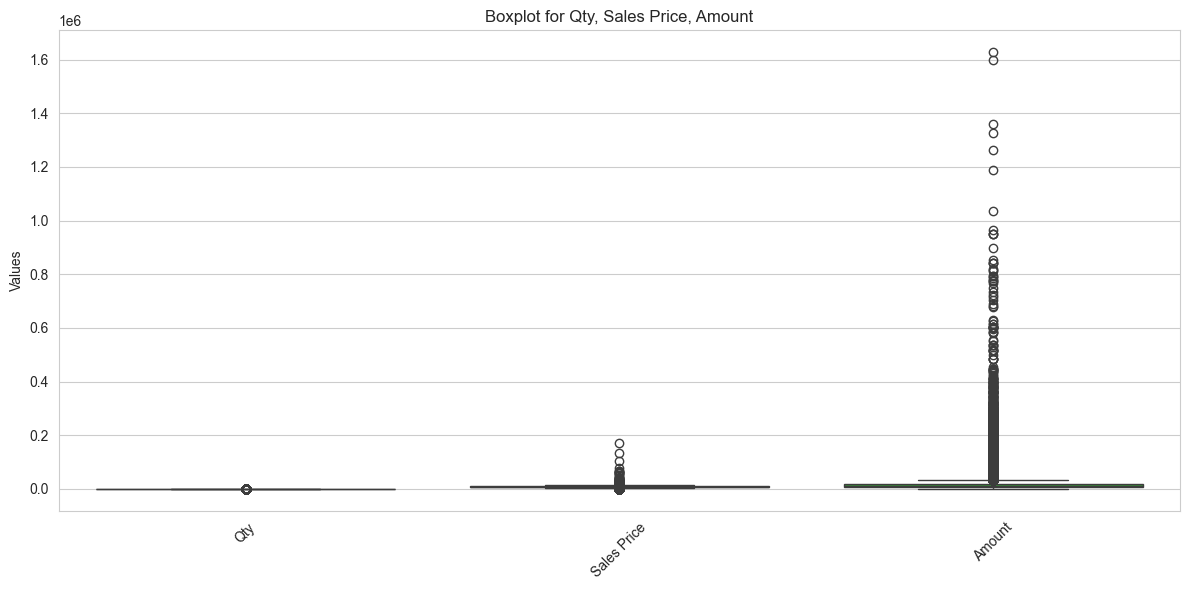

,Shop,Date,Transaction Type,No.,Product/Service,Memo/Description,Qty,Sales Price,Amount,Year,SourceFile,Month,Day,DayOfWeek,Quarter,WeekOfYear,IsWeekend
0,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,"S/N3, LADIES T-SHIRT S/S","S/N3, LADIES T-SHIRT S/S",2.000,6896.550,13793.100,2024,Thrift Company_Sales_2024.csv,2,1,4,1,5,0
1,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,Jogging pants,Jogging pants,5.000,6896.550,34482.760,2024,Thrift Company_Sales_2024.csv,2,1,4,1,5,0
2,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,"S/NE, LADIES MIXED BLOUSES","S/NE, LADIES MIXED BLOUSES",6.000,5603.450,33620.690,2024,Thrift Company_Sales_2024.csv,2,1,4,1,5,0
3,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,Wholesale:NYLON RUMMAGE,No description,4.000,12068.970,48275.860,2024,Thrift Company_Sales_2024.csv,3,1,5,1,9,0
4,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,"S/N3, BROKEN FASHION JEANS","S/N3, BROKEN FASHION JEANS",2.000,9051.730,18103.450,2024,Thrift Company_Sales_2024.csv,3,1,5,1,9,0


In [12]:
#Remove the columns the balance column
cleaned = cleaned.drop(['Balance'], axis=1)

#Checking for outliers in the dataset
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned[['Qty', 'Sales Price', 'Amount' ]])
plt.title('Boxplot for Qty, Sales Price, Amount')
plt.xticks(rotation=45)
plt.ylabel('Values')
plt.tight_layout()
plt.show()

#To check if the balance column has been removed
cleaned.head()

From the boxplot,we can infer that:
- Qty, Sales Price, and Amount are relatively well-behaved with few outliers
- Scale differences - Balance operates on a much larger scale than other columns
- Most transactions are small - the majority of business involves modest amounts

The data is well balanced

---

## Exploratory Data Analysis

#### Univariate Analysis  

In this section, we explored the distribution of individual variables in the dataset to better understand sales behavior, customer purchase patterns, and store performance. 

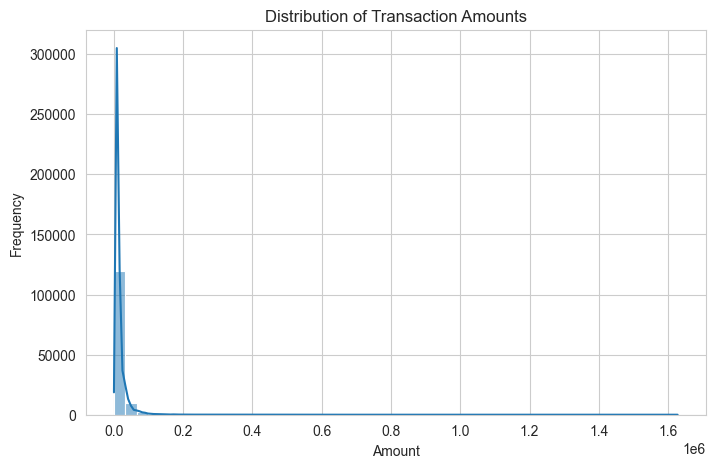

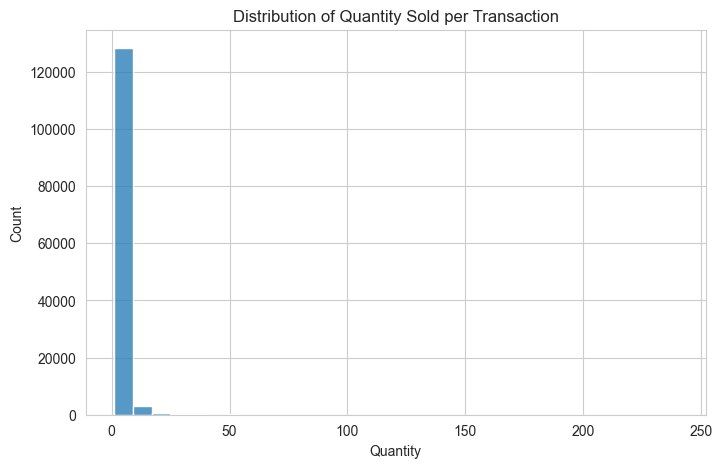

In [13]:
# Univariate Analysis

# 1. Distribution of transaction amounts
plt.figure(figsize=(8,5))
sns.histplot(cleaned["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

# 2. Distribution of quantities sold
plt.figure(figsize=(8,5))
sns.histplot(cleaned["Qty"], bins=30, kde=False)
plt.title("Distribution of Quantity Sold per Transaction")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()






#### 1. Distribution of Transaction Amounts  
We plotted the distribution of the `Amount` column to examine how transaction values are spread. 
The distribution of transaction amounts shows that most transactions fall below 0.1 on the sales scale. This indicates that the majority of purchases are of relatively low value, with fewer high-value transactions driving the long tail of the distribution.  


#### 2. Distribution of Quantities Sold    

Analysis of transaction quantities shows that most sales were made in smaller quantities per transaction. This suggests that customers tend to purchase in low volumes rather than in bulk, which could indicate a preference for affordability, frequent restocking, or budget-conscious shopping behavior.  



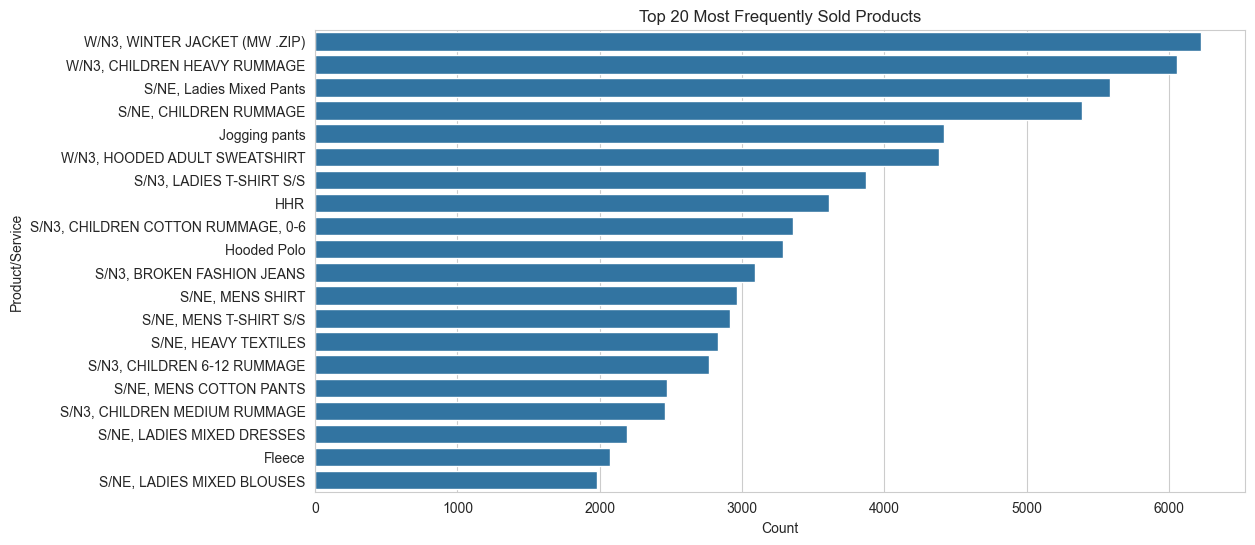

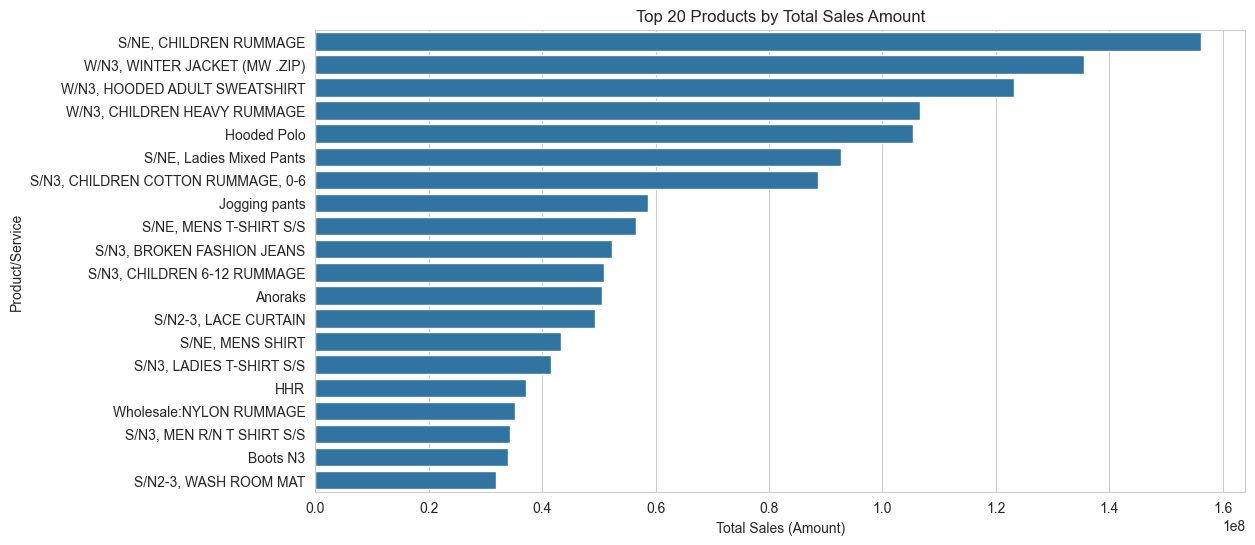

In [14]:
# 3. Most frequent products (Top 20)
plt.figure(figsize=(12,6))
top_products = cleaned["Product/Service"].value_counts().head(20)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 20 Most Frequently Sold Products")
plt.xlabel("Count")
plt.ylabel("Product/Service")
plt.show()

# 4. Top products by sales amount (Top 20)
plt.figure(figsize=(12,6))
top_products_sales = cleaned.groupby("Product/Service")["Amount"].sum().sort_values(ascending=False).head(20)
sns.barplot(x=top_products_sales.values, y=top_products_sales.index)
plt.title("Top 20 Products by Total Sales Amount")
plt.xlabel("Total Sales (Amount)")
plt.ylabel("Product/Service")
plt.show()

#### 3. Most Frequent Products  
Using the `Product/Service` column, we identified the top 20 most frequently sold products.  
- **Winter jackets** and **Children's heavy rummage** had the the highest demand.  
 

#### 4. Top Products by Sales Amount  
We ranked products by their total sales (`Amount`) to identify the top 20 highest revenue contributors.  
- **Children rummage** appeared to generate the highest revenue. 

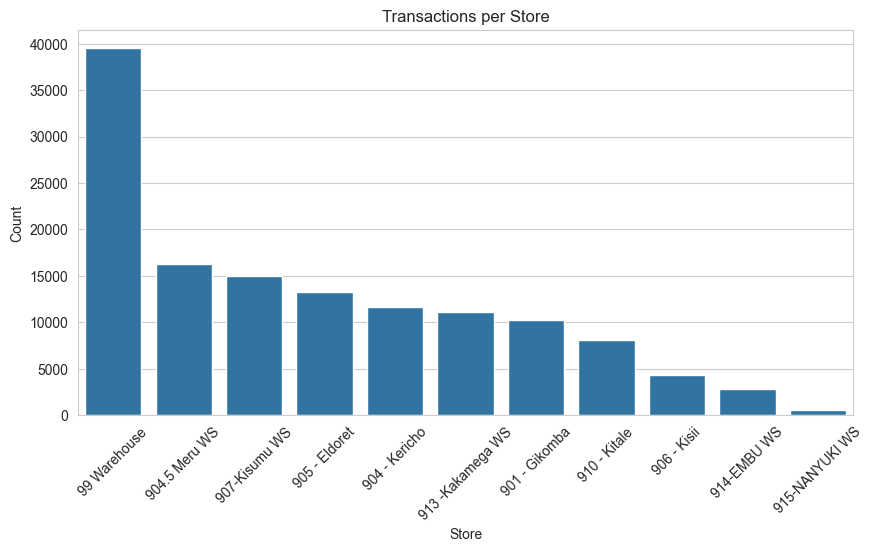

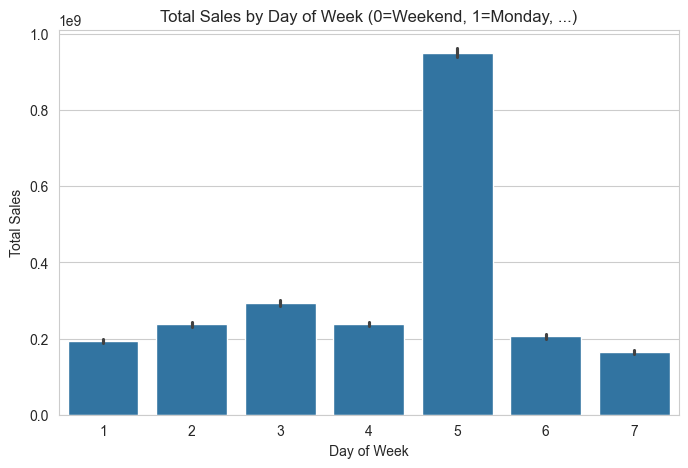

In [15]:
# 5. Transactions per store
plt.figure(figsize=(10,5))
store_counts = cleaned["Shop"].value_counts()
sns.barplot(x=store_counts.index, y=store_counts.values)
plt.title("Transactions per Store")
plt.xlabel("Store")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 6. Sales by day of week
plt.figure(figsize=(8,5))
sns.barplot(x="DayOfWeek", y="Amount", data=cleaned, estimator=sum)
plt.title("Total Sales by Day of Week (0=Weekend, 1=Monday, ...)")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.show()

#### 5. Top 10 Stores by Number of Transactions  
We counted the number of transactions across different `customer_segment` (stores).  
The highest number of transactions was recorded at the **Warehouse**, followed by **Meru, Kisumu, Eldoret, Kericho, Kakamega, Gikomba, Kitale, Kisii, Embu**, and **Nanyuki**.  


#### 6. Sales by Day of Week  
We aggregated total `Amount` by `DayOfWeek` to see which days generate the highest sales. This shows demand seasonality within a week.  
Sales vary notably across the week.  
- **Friday (Day 5)** shows the **highest sales by far**.  
- Moderate sales occur on **Wednesday**, **Tuesday**, and **Thursday**.  
- Lower sales are recorded on **Monday**, **Saturday**, and **Sunday**.   


**Summary:**  
The univariate analysis provided a clear understanding of transaction value distribution, customer buying behavior, product demand, and store-level performance. It also highlighted sales seasonality by day of the week, which is crucial for demand forecasting in retail operations.

---

### Time Series Analysis

In this section, we explore sales trends over time to uncover patterns, seasonality, and growth.  
By analyzing sales at different time granularities (daily, weekly, and monthly), we aim to identify peak periods, low-demand phases, and long-term business performance.  

#### Weekly Sales Pattern  

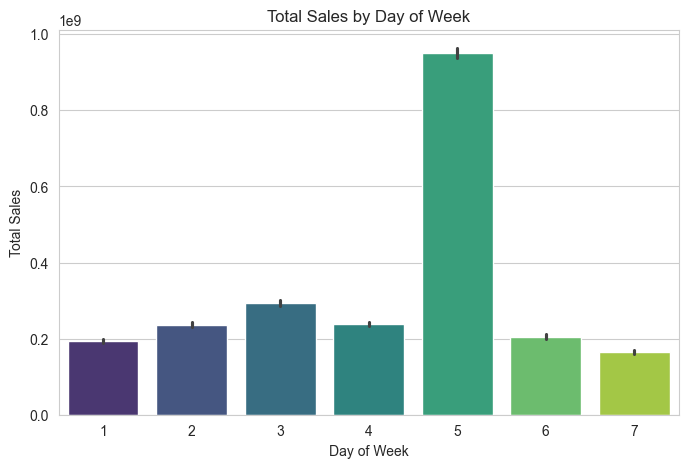

In [16]:
# Time Series Analysis 

# Weekly pattern (sales by day of week)
plt.figure(figsize=(8,5))
sns.barplot(x="DayOfWeek", y="Amount", data=cleaned, estimator=sum, palette="viridis")
plt.title("Total Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.show()


Sales vary notably across the week.  
- **Friday (Day 5)** shows the **highest sales by far**.  
- Moderate sales occur on **Wednesday**, **Tuesday**, and **Thursday**.  
- Lower sales are recorded on **Monday**, **Saturday**, and **Sunday**.  

**Key Insight:** Fridays dominate sales performance, while weekends consistently record the lowest sales, suggesting stronger weekday shopping behavior.  


#### Daily Sales Trend - 7-day Rolling average of daily sales

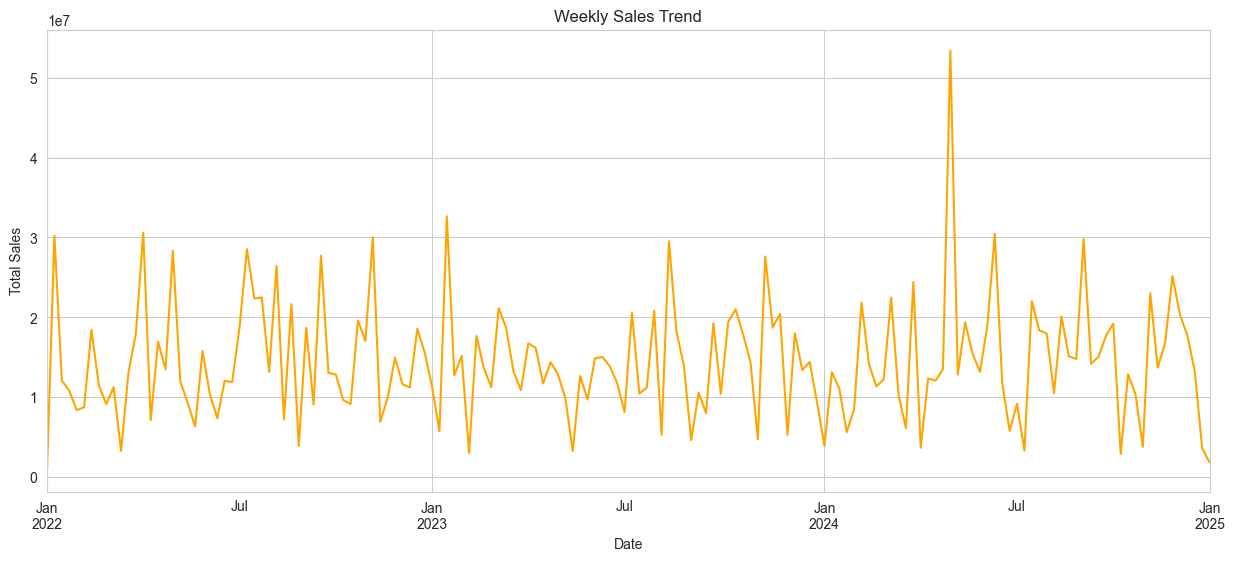

In [17]:
# Weekly sales trend
weekly_sales = cleaned.resample("W", on="Date")["Amount"].sum()

plt.figure(figsize=(15,6))
weekly_sales.plot(color="orange")
plt.title("Weekly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


The chart above shows the **7-day rolling average of daily sales** from 2022 to early 2025.  

**Overall Pattern**

Sales are highly variable on a daily basis, but the rolling average highlights underlying growth, especially moving into 2024.  

**High Sales Periods** 
- The **highest peak** occurred in **mid-2024**, with daily sales exceeding **8 million**.  
- Other strong surges can be observed in **late 2022** and **early 2023**, indicating recurring demand spikes.  

**Low Sales Periods**

Sales are highly variable on a daily basis, but the rolling average highlights underlying growth, especially moving into 2024.  

**High Sales Periods** 
- The **highest peak** occurred in **mid-2024**, with daily sales exceeding **8 million**.  
- Other strong surges can be observed in **late 2022** and **early 2023**, indicating recurring demand spikes.  

**Low Sales Periods**  
Dips appear regularly throughout the series, suggesting possible **off-seasons** or periods of lower demand.  

**Seasonality & Volatility** 

The presence of repeated peaks and troughs suggests **seasonal effects**, such as holidays or cyclical demand. Daily sales remain volatile, but the overall upward trajectory indicates business growth. 

---

####  Key Insights  
- Sales performance **improved steadily**, with **2024 marking the strongest year**.  
- The **mid-2024 sales surge** stands out as the most significant event in the observed period and should be analyzed further (campaigns, expansion, or external market drivers).  
- Recognizing **seasonal demand patterns** can guide **stock planning, staffing, and promotional strategies**.  


####  Time Series Analysis – Monthly Sales Trend  

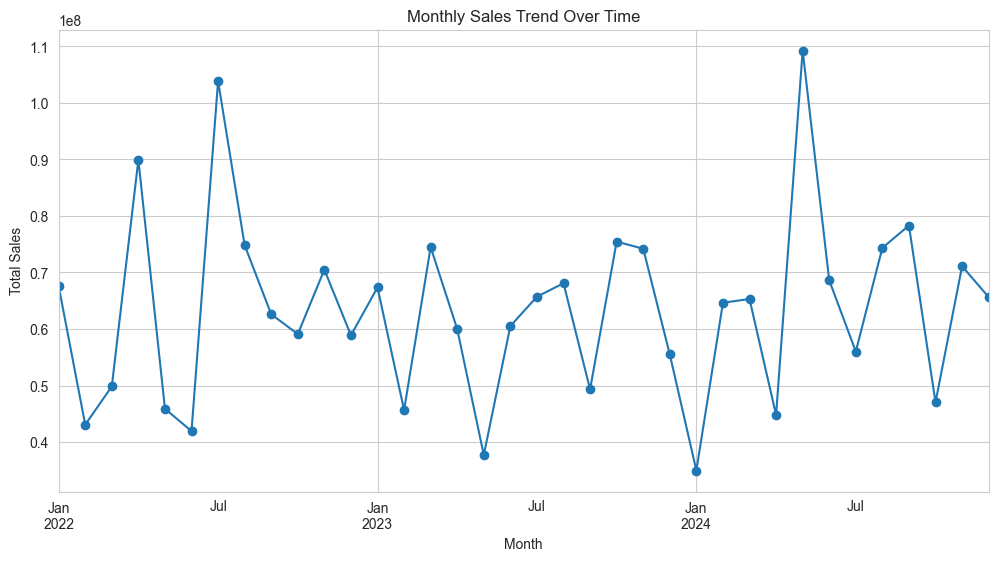

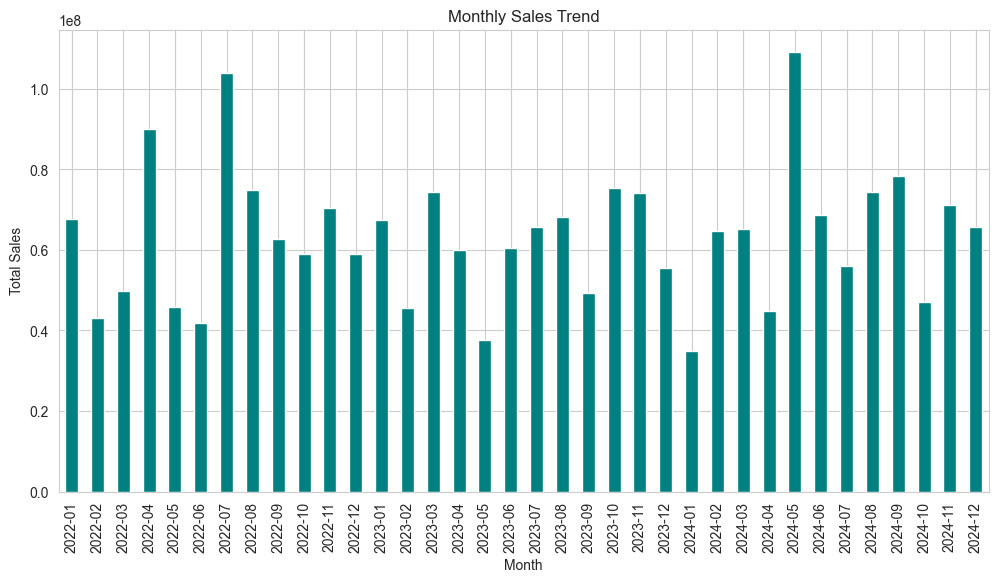

In [18]:
cleaned["YearMonth"] = cleaned["Date"].dt.to_period("M")
yearly_trend = cleaned.groupby(["YearMonth"])["Amount"].sum()

plt.figure(figsize=(12,6))
yearly_trend.plot(kind="line", marker="o")
plt.title("Monthly Sales Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# 2. Monthly sales trend
monthly_sales = cleaned.groupby(cleaned["Date"].dt.to_period("M"))["Amount"].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind="bar", color="teal")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()



Monthly sales show a **clear upward trajectory** from 2022 to early 2025.  
The **highest sales** occurred in **mid-to-late 2024**, making it the strongest period overall.  
Seasonal peaks (e.g., around year-end) suggest the impact of **holidays or promotions**, while dips indicate possible off-seasons.  

**Key Insight:** 

Monthly aggregation confirms steady business growth, with 2024 standing out as the best-performing year.  

---

#### Bivariate & Multivariate Analysis  

In this section, we explore how sales relate to other factors such as price, demand, and seasonality.   
Here, we examine the relationships between **sales (Amount)** and other key features to understand drivers of demand and revenue.  

- **Price vs Demand (Scatter plot):** Helps reveal whether higher prices reduce quantities sold.  
- **Quantity vs Sales:** Shows the direct impact of units sold on total sales.  
- **Correlation Heatmap:** Highlights how numeric features (price, quantity, sales, seasonality) relate to each other.  
- **Quarterly Sales:** Captures seasonality patterns and business cycles across the year.  


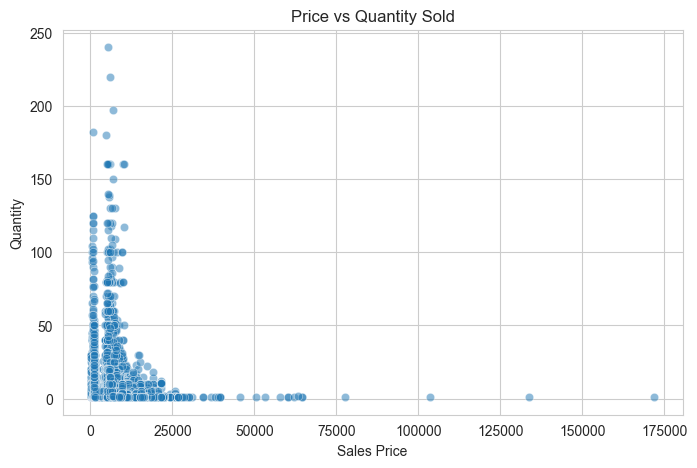

In [19]:
#1. Price vs Quantity (Demand Curve)
plt.figure(figsize=(8,5))
sns.scatterplot(x="Sales Price", y="Qty", data=cleaned, alpha=0.5)
plt.title("Price vs Quantity Sold")
plt.xlabel("Sales Price")
plt.ylabel("Quantity")
plt.show()

The scatterplot shows that **higher quantities are concentrated at lower prices**, while higher prices are associated with fewer purchases.
This reflects the typical **inverse price–demand relationship**. Very few outliers are present, indicating that extreme cases of unusually high prices or quantities are rare in the dataset.

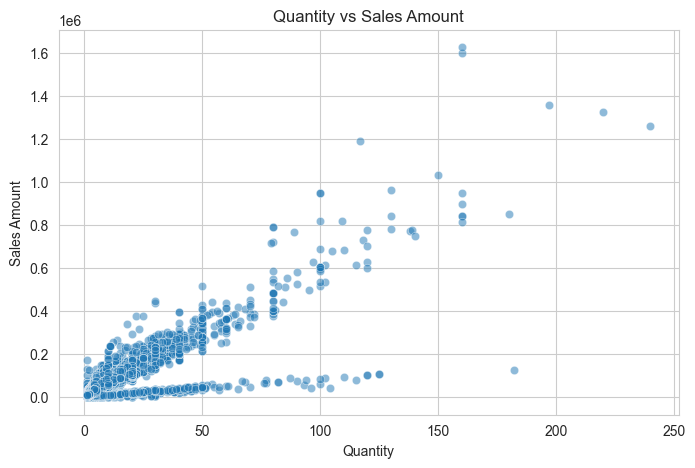

In [20]:
#2. Sales vs Quantity
plt.figure(figsize=(8,5))
sns.scatterplot(x="Qty", y="Amount", data=cleaned, alpha=0.5)
plt.title("Quantity vs Sales Amount")
plt.xlabel("Quantity")
plt.ylabel("Sales Amount")
plt.show()

The scatterplot shows a clear positive relationship: as quantity increases, sales amount also rises, forming a diagonal pattern.  

Most transactions cluster at lower values, indicating that **small-to-medium sales are most common**.  
While higher quantities do lead to higher sales, **bulk transactions are infrequent**, suggesting revenue is driven mainly by smaller purchases, with occasional large orders boosting totals.

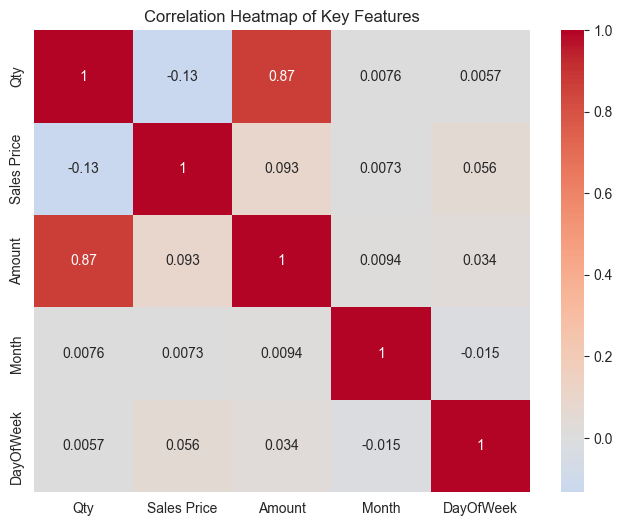

In [21]:
# 3. Correlation Heatmap (numeric features)
plt.figure(figsize=(8,6))
corr = cleaned[["Qty", "Sales Price", "Amount", "Month", "DayOfWeek"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Key Features")
plt.show()

**Correlation Insights**

- **Qty & Amount (0.87):** Strong positive link, showing that sales are mainly driven by quantity sold.  
- **Sales Price & Qty (-0.13):** Weak negative relation, higher prices slightly reduce demand.  
- **Sales Price & Amount (0.09):** Price alone has little effect on total sales.  
- **Month / DayOfWeek:** Very weak correlations. Seasonality patterns aren’t captured well by simple correlation.  

**Key Takeaway:** Sales depend more on **volume sold** than price or calendar features.  


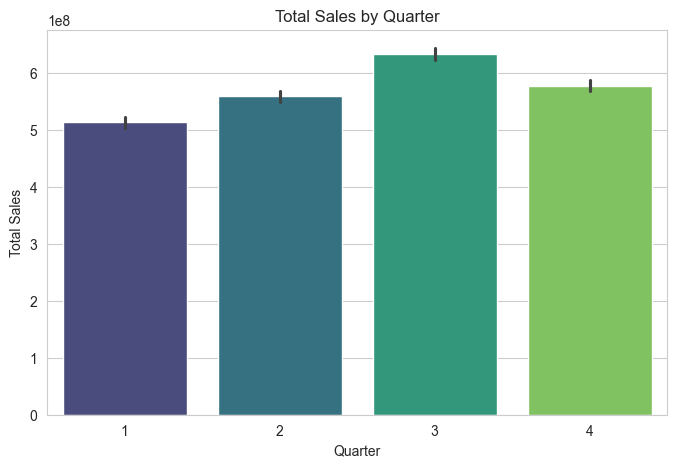

In [22]:
# 4. Seasonality (Sales by Quarter)
plt.figure(figsize=(8,5))
sns.barplot(x="Quarter", y="Amount", data=cleaned, estimator=sum, palette="viridis")
plt.title("Total Sales by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.show()

From the plot, sales peak in the **3rd quarter**, while the **1st quarter records the lowest sales**. The **2nd and 4th quarters** show moderate but comparatively lower performance. The strong Q3 performance may reflect seasonal demand drivers (e.g., back-to-school), while weaker Q1 sales could indicate a post-holiday slowdown.

---

#### Outlier Analysis

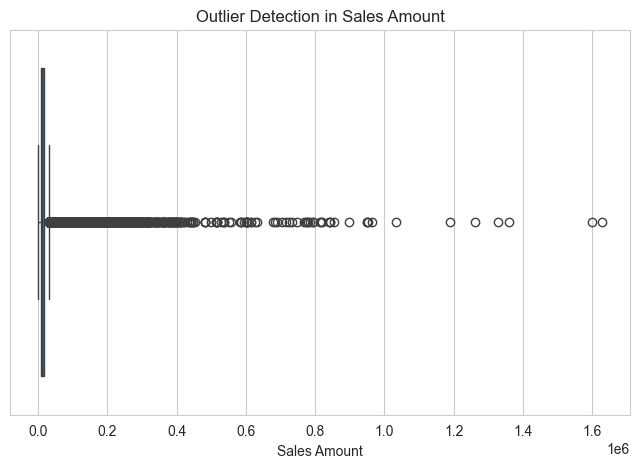

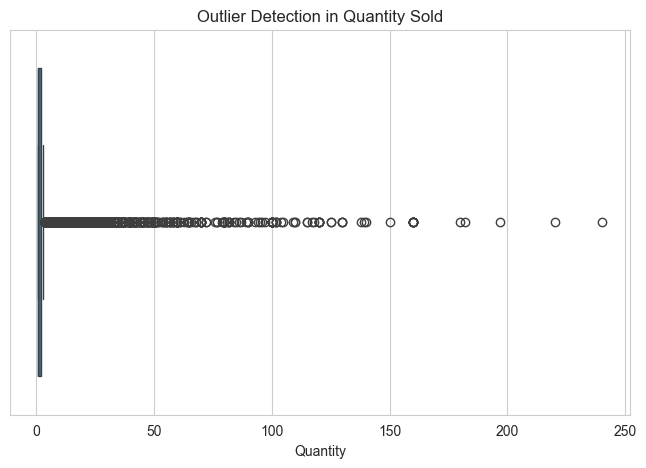

In [23]:
# 1. Boxplot for Sales Amount
plt.figure(figsize=(8,5))
sns.boxplot(x=cleaned["Amount"])
plt.title("Outlier Detection in Sales Amount")
plt.xlabel("Sales Amount")
plt.show()

# 2. Boxplot for Quantity
plt.figure(figsize=(8,5))
sns.boxplot(x=cleaned["Qty"])
plt.title("Outlier Detection in Quantity Sold")
plt.xlabel("Quantity")
plt.show()


The boxplot shows that **most quantities sold are concentrated at lower values**, close to the origin.  
However, there are a number of **outliers extending far to the right**, with quantities exceeding 100 units in some cases.  
These extreme values suggest occasional bulk purchases, which are not representative of the majority of transactions.  


In [24]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib settings
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['axes.grid'] = True

# Display all columns in pandas dataframes
pd.set_option('display.max_columns', None)

## Data Loading and Preparation

Let's load our sales data and prepare it for time series analysis. We'll need to ensure our data is properly formatted with dates as the index and handle any missing values or outliers.

In [25]:
# Load the data
df = pd.read_csv('data/Thrift_Company_Sales_Clean.csv')

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Display basic information about the dataset
print("Dataset Info:")
print("-" * 50)
df.info()

print("\nFirst few rows:")
print("-" * 50)
display(df.head())

print("\nDescriptive Statistics:")
print("-" * 50)
display(df.describe())

Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132650 entries, 0 to 132649
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Shop              132650 non-null  object        
 1   Date              132649 non-null  datetime64[ns]
 2   Transaction Type  132650 non-null  object        
 3   No.               132650 non-null  object        
 4   Product/Service   132648 non-null  object        
 5   Memo/Description  123449 non-null  object        
 6   Qty               132646 non-null  float64       
 7   Sales Price       132647 non-null  float64       
 8   Amount            132647 non-null  float64       
 9   Balance           132649 non-null  float64       
 10  Year              132649 non-null  float64       
 11  SourceFile        132650 non-null  object        
 12  Month             132649 non-null  float64       

,Shop,Date,Transaction Type,No.,Product/Service,Memo/Description,Qty,Sales Price,Amount,Balance,Year,SourceFile,Month,Day,DayOfWeek,Quarter,WeekOfYear,IsWeekend
0,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,"S/N3, LADIES T-SHIRT S/S","S/N3, LADIES T-SHIRT S/S",2.000,6896.550,13793.100,13793.100,2024.000,Thrift Company_Sales_2024.csv,2.000,1.000,Thursday,1.000,5.000,0
1,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,Jogging pants,Jogging pants,5.000,6896.550,34482.760,48275.860,2024.000,Thrift Company_Sales_2024.csv,2.000,1.000,Thursday,1.000,5.000,0
2,901 - Gikomba,2024-02-01,Sales Receipt,KEBTTVM84156,"S/NE, LADIES MIXED BLOUSES","S/NE, LADIES MIXED BLOUSES",6.000,5603.450,33620.690,81896.550,2024.000,Thrift Company_Sales_2024.csv,2.000,1.000,Thursday,1.000,5.000,0
3,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,Wholesale:NYLON RUMMAGE,NaN,4.000,12068.970,48275.860,130172.410,2024.000,Thrift Company_Sales_2024.csv,3.000,1.000,Friday,1.000,9.000,0
4,901 - Gikomba,2024-03-01,Sales Receipt,KEBTTVM84154,"S/N3, BROKEN FASHION JEANS","S/N3, BROKEN FASHION JEANS",2.000,9051.730,18103.450,148275.860,2024.000,Thrift Company_Sales_2024.csv,3.000,1.000,Friday,1.000,9.000,0



Descriptive Statistics:
--------------------------------------------------


,Date,Qty,Sales Price,Amount,Balance,Year,Month,Day,Quarter,WeekOfYear,IsWeekend
count,132649,132646.000,132647.000,132647.000,132649.000,132649.000,132649.000,132649.000,132649.000,132649.000,132650.000
mean,2023-06-27 23:44:04.479792640,2.241,8510.274,17201.275,65913451.572,2022.983,6.607,15.285,2.540,26.718,0.173
min,2022-01-02 00:00:00,1.000,86.210,172.410,3448.280,2022.000,1.000,1.000,1.000,1.000,0.000
25%,2022-09-16 00:00:00,1.000,6719.830,7327.590,17509008.560,2022.000,4.000,8.000,2.000,14.000,0.000
50%,2023-06-26 00:00:00,1.000,7758.620,10344.830,37644718.920,2023.000,7.000,15.000,3.000,27.000,0.000
75%,2024-04-12 00:00:00,2.000,9482.760,17241.380,75326059.920,2024.000,9.000,23.000,3.000,39.000,0.000
max,2024-12-31 00:00:00,240.000,171982.760,1627586.210,334734120.530,2024.000,12.000,31.000,4.000,52.000,1.000
std,NaN,4.483,3123.730,27633.669,74450369.481,0.822,3.377,8.746,1.099,14.743,0.378


In [26]:
# Display column names
print("\nColumn Names:")
print("-" * 50)
print(df.columns.tolist())


Column Names:
--------------------------------------------------
['Shop', 'Date', 'Transaction Type', 'No.', 'Product/Service', 'Memo/Description', 'Qty', 'Sales Price', 'Amount', 'Balance', 'Year', 'SourceFile', 'Month', 'Day', 'DayOfWeek', 'Quarter', 'WeekOfYear', 'IsWeekend']


Weekly Sales Data Shape: (1421, 3)

Pivot Table Shape: (158, 11)

First few rows of pivot table:


Shop,901 - Gikomba,904 - Kericho,904.5 Meru WS,905 - Eldoret,906 - Kisii,907-Kisumu WS,910 - Kitale,913 -Kakamega WS,914-EMBU WS,915-NANYUKI WS,99 Warehouse
Date,,,,,,,,,,,
2022-01-03,258275.850,237801.710,112499.980,211810.350,NaN,228706.890,NaN,243448.280,NaN,NaN,6551.730
2022-01-10,3239051.680,2309956.930,3449827.650,3258870.670,NaN,3046853.440,NaN,2127456.840,NaN,NaN,12776305.420
2022-01-17,1278405.190,1011551.750,1282844.780,1216551.730,NaN,1084870.690,NaN,860258.610,NaN,NaN,5590700.970
2022-01-24,1302413.810,1161681.020,1210818.970,1320431.060,NaN,1349698.260,NaN,1185129.290,NaN,NaN,3353870.650
2022-01-31,1474439.660,1211767.240,1220172.430,1286120.690,NaN,1498577.500,NaN,1215301.720,NaN,NaN,4946839.720


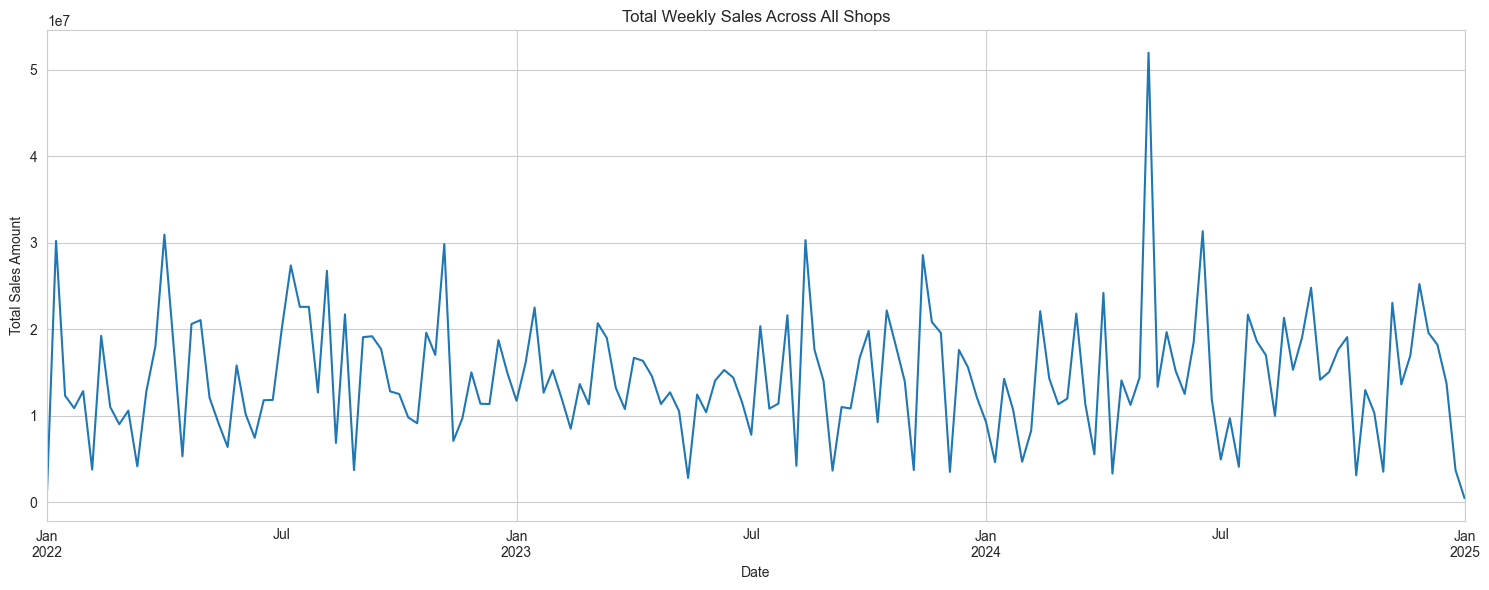

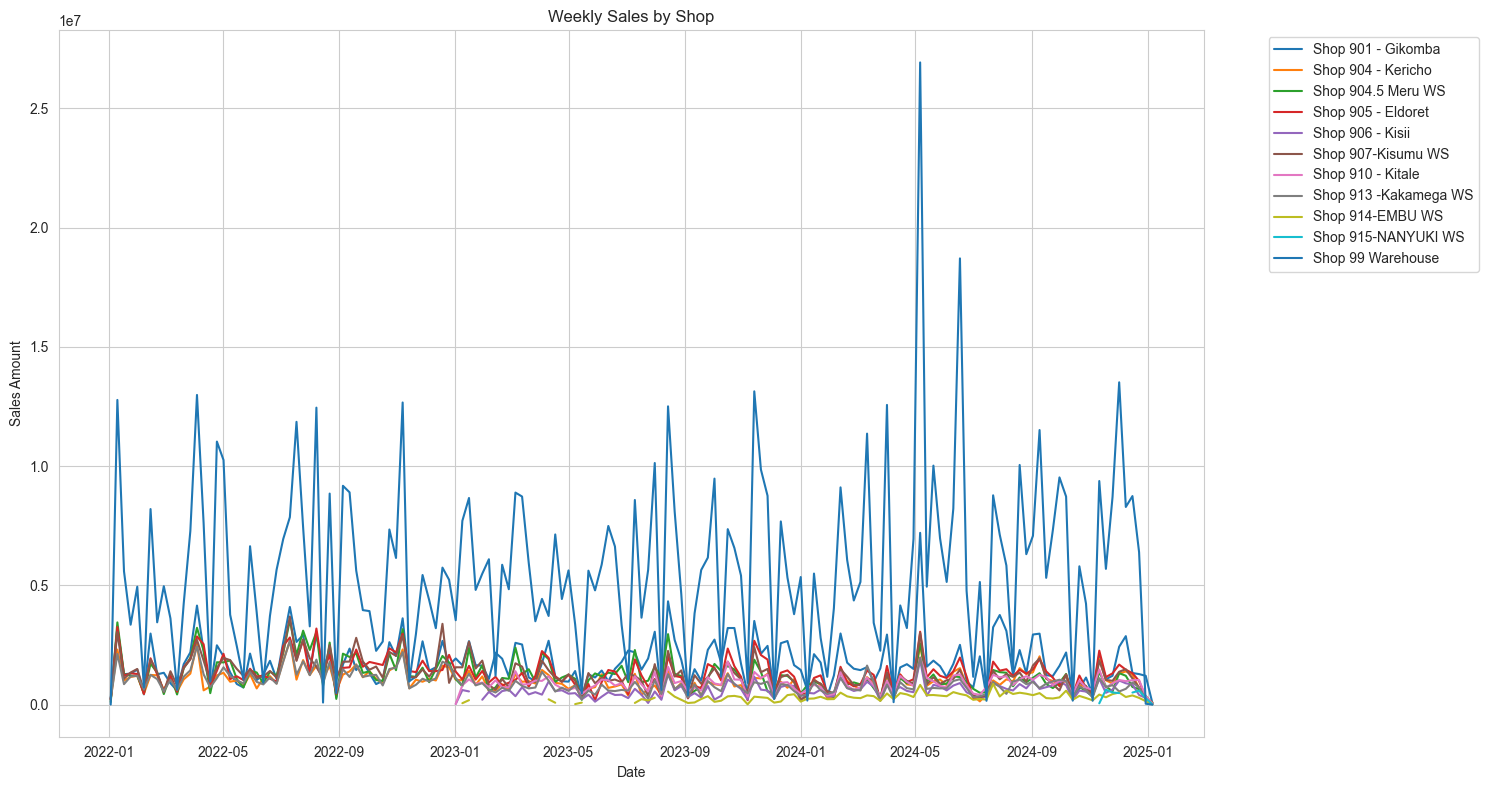

In [27]:
# Prepare time series data by aggregating sales by week
weekly_sales = df.groupby(['Shop', pd.Grouper(key='Date', freq='W-MON')])['Amount'].sum().reset_index()

# Create a pivot table with shops as columns and dates as index
sales_pivot = weekly_sales.pivot(index='Date', columns='Shop', values='Amount')

print("Weekly Sales Data Shape:", weekly_sales.shape)
print("\nPivot Table Shape:", sales_pivot.shape)
print("\nFirst few rows of pivot table:")
display(sales_pivot.head())

# Plot total weekly sales across all shops
plt.figure(figsize=(15, 6))
sales_pivot.sum(axis=1).plot(title='Total Weekly Sales Across All Shops')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot individual shop weekly sales
plt.figure(figsize=(15, 8))
for shop in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[shop], label=f'Shop {shop}')
plt.title('Weekly Sales by Shop')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Weekly Sales Data Shape: (1421, 3)

Pivot Table Shape: (158, 11)

First few rows of pivot table:


Shop,901 - Gikomba,904 - Kericho,904.5 Meru WS,905 - Eldoret,906 - Kisii,907-Kisumu WS,910 - Kitale,913 -Kakamega WS,914-EMBU WS,915-NANYUKI WS,99 Warehouse
Date,,,,,,,,,,,
2022-01-03,258275.850,237801.710,112499.980,211810.350,NaN,228706.890,NaN,243448.280,NaN,NaN,6551.730
2022-01-10,3239051.680,2309956.930,3449827.650,3258870.670,NaN,3046853.440,NaN,2127456.840,NaN,NaN,12776305.420
2022-01-17,1278405.190,1011551.750,1282844.780,1216551.730,NaN,1084870.690,NaN,860258.610,NaN,NaN,5590700.970
2022-01-24,1302413.810,1161681.020,1210818.970,1320431.060,NaN,1349698.260,NaN,1185129.290,NaN,NaN,3353870.650
2022-01-31,1474439.660,1211767.240,1220172.430,1286120.690,NaN,1498577.500,NaN,1215301.720,NaN,NaN,4946839.720


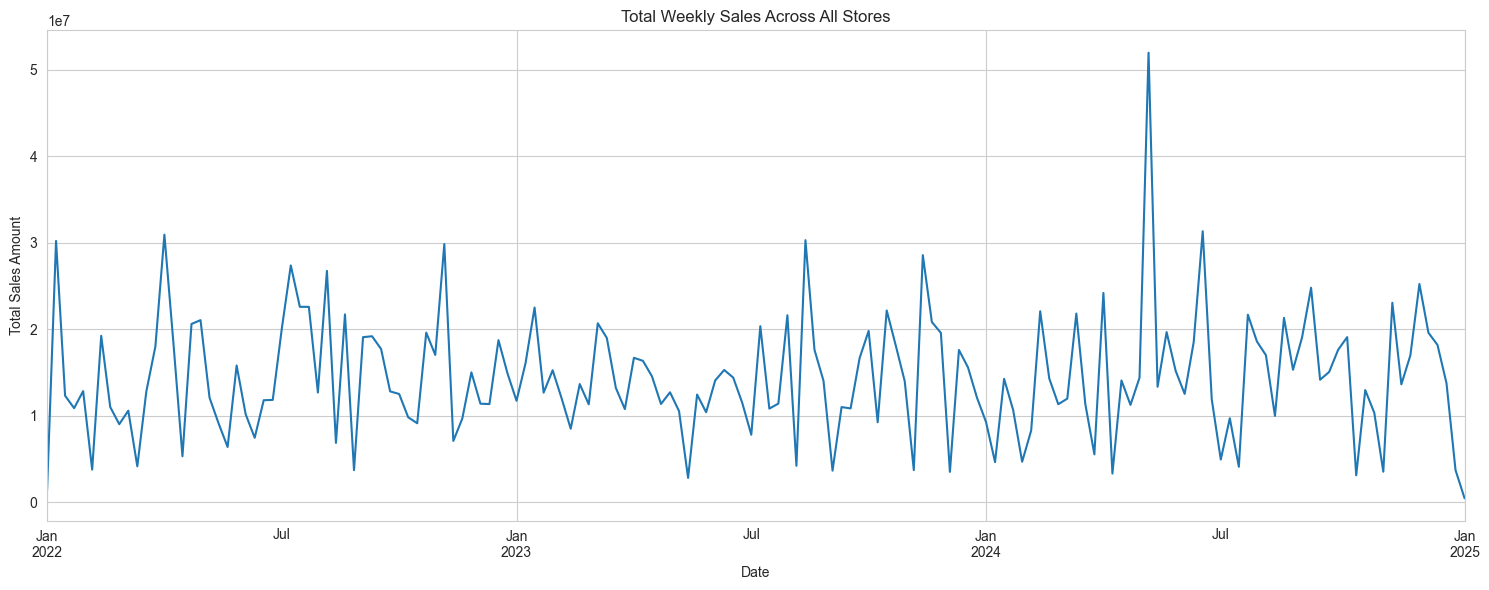

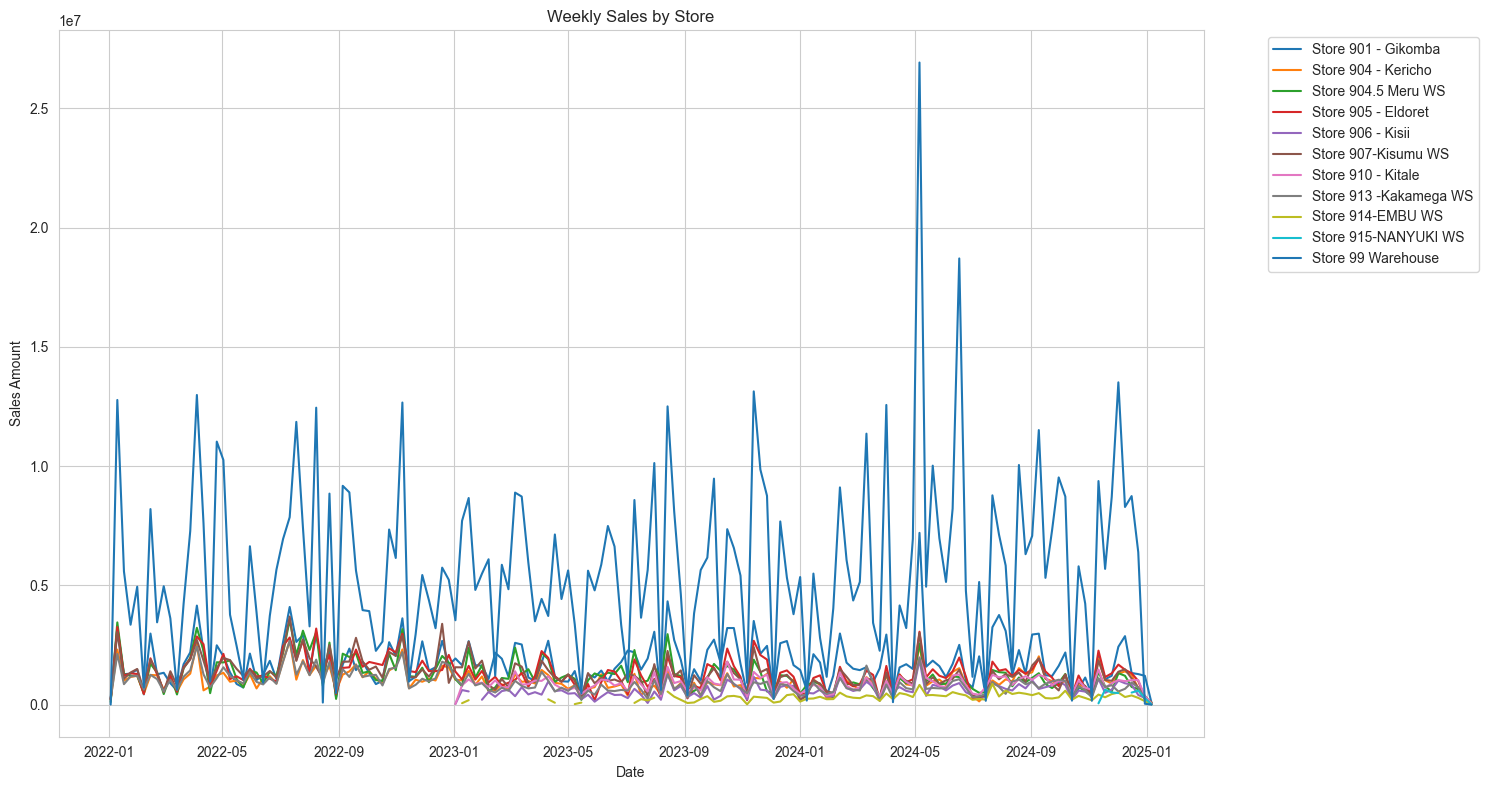

In [28]:
# Load the data if not already loaded
try:
    df.head()
except NameError:
    df = pd.read_csv('data/Thrift_Company_Sales_Clean.csv')
    df['Date'] = pd.to_datetime(df['Date'])

# Prepare time series data by aggregating sales by week
weekly_sales = df.groupby(['Shop', pd.Grouper(key='Date', freq='W-MON')])['Amount'].sum().reset_index()

# Create a pivot table with stores as columns and dates as index
sales_pivot = weekly_sales.pivot(index='Date', columns='Shop', values='Amount')

print("Weekly Sales Data Shape:", weekly_sales.shape)
print("\nPivot Table Shape:", sales_pivot.shape)
print("\nFirst few rows of pivot table:")
display(sales_pivot.head())

# Plot total weekly sales across all stores
plt.figure(figsize=(15, 6))
sales_pivot.sum(axis=1).plot(title='Total Weekly Sales Across All Stores')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot individual store weekly sales
plt.figure(figsize=(15, 8))
for store in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[store], label=f'Store {store}')
plt.title('Weekly Sales by Store')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
print(df.columns)


Index(['Shop', 'Date', 'Transaction Type', 'No.', 'Product/Service',
       'Memo/Description', 'Qty', 'Sales Price', 'Amount', 'Balance', 'Year',
       'SourceFile', 'Month', 'Day', 'DayOfWeek', 'Quarter', 'WeekOfYear',
       'IsWeekend'],
      dtype='object')


## Baseline Models

We'll implement two simple baseline models:
1. Last Observed Value (Naive Forecast)
2. Moving Average

These will serve as our benchmark for comparing more sophisticated models.

Naive Forecast Metrics:
--------------------------------------------------
MSE: 1906327339142.6543
RMSE: 1380698.1347
MAE: 622076.6285
R2: 0.5825

Moving Average Forecast Metrics:
--------------------------------------------------
MSE: 5484179697527.5283
RMSE: 2341832.5511
MAE: 1088732.3131
R2: -0.2011


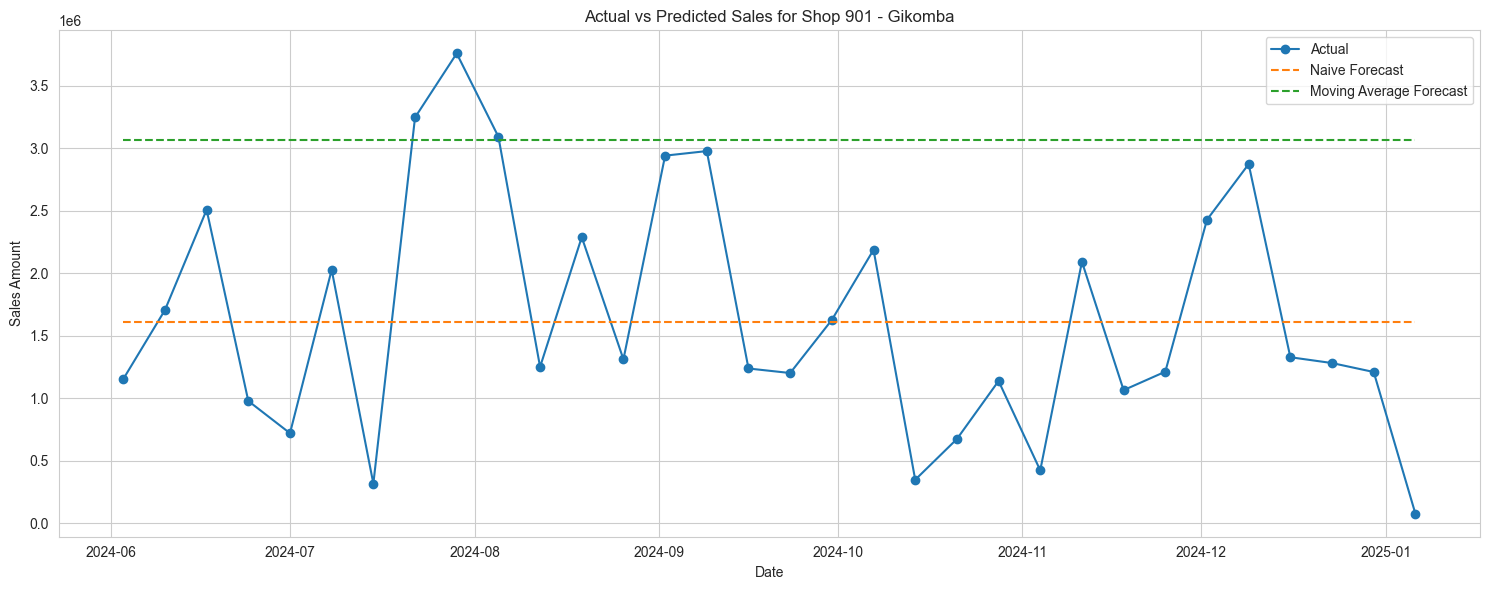

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- Load data ---
try:
    df.head()
except NameError:
    df = pd.read_csv("data/Thrift_Company_Sales_Clean.csv")
    df['Date'] = pd.to_datetime(df['Date'])

# --- Prepare weekly sales pivot ---
weekly_sales = df.groupby(['Shop', pd.Grouper(key='Date', freq='W-MON')])['Amount'].sum().reset_index()
sales_pivot = weekly_sales.pivot(index='Date', columns='Shop', values='Amount')

# --- Train/test split ---
train_size = int(len(sales_pivot) * 0.8)
train_data = sales_pivot.iloc[:train_size]
test_data = sales_pivot.iloc[train_size:]

# --- Metrics function (drop NaNs safely) ---
def calculate_metrics(y_true, y_pred):
    mask = ~np.isnan(y_true) & ~np.isnan(y_pred)
    y_true, y_pred = y_true[mask], y_pred[mask]
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {"MSE": mse, "RMSE": rmse, "MAE": mae, "R2": r2}

# --- 1. Naive Forecast (flat line with last observed training value) ---
naive_forecast = pd.DataFrame(index=test_data.index, columns=test_data.columns)
for col in test_data.columns:
    last_val = train_data[col].iloc[-1]
    naive_forecast[col] = last_val

# --- 2. Moving Average Forecast (use last rolling mean from training set) ---
window_size = 4  # 4-week average
ma_forecast = pd.DataFrame(index=test_data.index, columns=test_data.columns)
for col in test_data.columns:
    last_ma = train_data[col].rolling(window=window_size).mean().iloc[-1]
    ma_forecast[col] = last_ma

# --- Fill any NaNs (in case of missing data) ---
naive_forecast = naive_forecast.fillna(method="ffill").fillna(0)
ma_forecast = ma_forecast.fillna(method="ffill").fillna(0)

# --- Calculate metrics ---
print("Naive Forecast Metrics:")
print("-" * 50)
naive_metrics = calculate_metrics(test_data.values.flatten(), naive_forecast.values.flatten())
for metric, value in naive_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nMoving Average Forecast Metrics:")
print("-" * 50)
ma_metrics = calculate_metrics(test_data.values.flatten(), ma_forecast.values.flatten())
for metric, value in ma_metrics.items():
    print(f"{metric}: {value:.4f}")

# --- Plot actual vs forecast for one shop ---
store_to_plot = test_data.columns[0]  # first shop
plt.figure(figsize=(15, 6))
plt.plot(test_data.index, test_data[store_to_plot], label="Actual", marker="o")
plt.plot(test_data.index, naive_forecast[store_to_plot], label="Naive Forecast", linestyle="--")
plt.plot(test_data.index, ma_forecast[store_to_plot], label="Moving Average Forecast", linestyle="--")
plt.title(f"Actual vs Predicted Sales for Shop {store_to_plot}")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show(block=False)



## Traditional Time Series Models

We'll implement two traditional time series models:
1. SARIMA (Seasonal ARIMA)
2. Prophet

These models are specifically designed for time series data and can capture both trend and seasonality.

In [34]:
# ==============================
# Forecasting with SARIMAX & Prophet
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# -------------------------------
# Metrics function
# -------------------------------
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2": r2}


# -------------------------------
# SARIMAX Model (manual order)
# -------------------------------
def fit_sarima(train, test):
    predictions = pd.DataFrame(index=test.index, columns=train.columns)

    for store in train.columns:
        try:
            # You can tune (p,d,q)(P,D,Q,s) manually
            model = SARIMAX(train[store],
                            order=(1,1,1),
                            seasonal_order=(1,1,1,52),
                            enforce_stationarity=False,
                            enforce_invertibility=False)
            results = model.fit(disp=False)
            forecast = results.forecast(steps=len(test))
            predictions[store] = forecast.values
        except Exception as e:
            print(f"SARIMA failed for {store}: {e}")
            predictions[store] = np.nan

    return predictions


# -------------------------------
# Prophet Model
# -------------------------------
def fit_prophet(train, test):
    predictions = pd.DataFrame(index=test.index, columns=train.columns)

    for store in train.columns:
        try:
            # Prepare data for Prophet
            df_prophet = pd.DataFrame({
                'ds': train.index,
                'y': train[store].values
            })

            model = Prophet(weekly_seasonality=True, yearly_seasonality=True)
            model.fit(df_prophet)

            future_dates = pd.DataFrame({'ds': test.index})
            forecast = model.predict(future_dates)
            predictions[store] = forecast['yhat'].values
        except Exception as e:
            print(f"Prophet failed for {store}: {e}")
            predictions[store] = np.nan

    return predictions


# -------------------------------
# Example Usage
# -------------------------------
# Assuming you already have train_data and test_data defined
# train_data, test_data = ...

print("Fitting SARIMA models...")
sarima_predictions = fit_sarima(train_data, test_data)

print("\nFitting Prophet models...")
prophet_predictions = fit_prophet(train_data, test_data)

# -------------------------------
# Metrics
# -------------------------------
print("\nSARIMA Model Metrics:")
print("-" * 50)
sarima_metrics = calculate_metrics(test_data.values.flatten(),
                                   sarima_predictions.values.flatten())
for metric, value in sarima_metrics.items():
    print(f"{metric}: {value:.4f}")

print("\nProphet Model Metrics:")
print("-" * 50)
prophet_metrics = calculate_metrics(test_data.values.flatten(),
                                    prophet_predictions.values.flatten())
for metric, value in prophet_metrics.items():
    print(f"{metric}: {value:.4f}")


# -------------------------------
# Plot results for one store
# -------------------------------
store_to_plot = test_data.columns[0]
plt.figure(figsize=(15, 6))
plt.plot(test_data.index, test_data[store_to_plot],
         label='Actual', marker='o')
plt.plot(test_data.index, sarima_predictions[store_to_plot],
         label='SARIMA', linestyle='--')
plt.plot(test_data.index, prophet_predictions[store_to_plot],
         label='Prophet', linestyle='--')
plt.title(f'Time Series Forecast - Store {store_to_plot}')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting SARIMA models...

Fitting Prophet models...

Fitting Prophet models...


05:00:57 - cmdstanpy - INFO - Chain [1] start processing
05:00:58 - cmdstanpy - INFO - Chain [1] done processing
05:00:58 - cmdstanpy - INFO - Chain [1] done processing
05:00:59 - cmdstanpy - INFO - Chain [1] start processing
05:00:59 - cmdstanpy - INFO - Chain [1] start processing
05:00:59 - cmdstanpy - INFO - Chain [1] done processing
05:00:59 - cmdstanpy - INFO - Chain [1] done processing
05:01:00 - cmdstanpy - INFO - Chain [1] start processing
05:01:00 - cmdstanpy - INFO - Chain [1] start processing
05:01:00 - cmdstanpy - INFO - Chain [1] done processing
05:01:00 - cmdstanpy - INFO - Chain [1] done processing
05:01:01 - cmdstanpy - INFO - Chain [1] start processing
05:01:01 - cmdstanpy - INFO - Chain [1] start processing
05:01:01 - cmdstanpy - INFO - Chain [1] done processing
05:01:01 - cmdstanpy - INFO - Chain [1] done processing
05:01:01 - cmdstanpy - INFO - Chain [1] start processing
05:01:01 - cmdstanpy - INFO - Chain [1] start processing
05:01:02 - cmdstanpy - INFO - Chain [1]


SARIMA Model Metrics:
--------------------------------------------------


ValueError: Input contains NaN.

## Machine Learning Models

We'll implement three gradient boosting models:
1. XGBoost
2. LightGBM
3. CatBoost

These models will be trained using lagged features to capture time series patterns.


Training Random Forest...

Random Forest Metrics:
--------------------------------------------------
MAE: 76.3488
RMSE: 92.8895
R2: 0.3315

Training Gradient Boosting...

Random Forest Metrics:
--------------------------------------------------
MAE: 76.3488
RMSE: 92.8895
R2: 0.3315

Training Gradient Boosting...

Gradient Boosting Metrics:
--------------------------------------------------
MAE: 65.6021
RMSE: 83.5947
R2: 0.4586

Training SVR...

SVR Metrics:
--------------------------------------------------
MAE: 91.2020
RMSE: 108.2854
R2: 0.0915

Gradient Boosting Metrics:
--------------------------------------------------
MAE: 65.6021
RMSE: 83.5947
R2: 0.4586

Training SVR...

SVR Metrics:
--------------------------------------------------
MAE: 91.2020
RMSE: 108.2854
R2: 0.0915


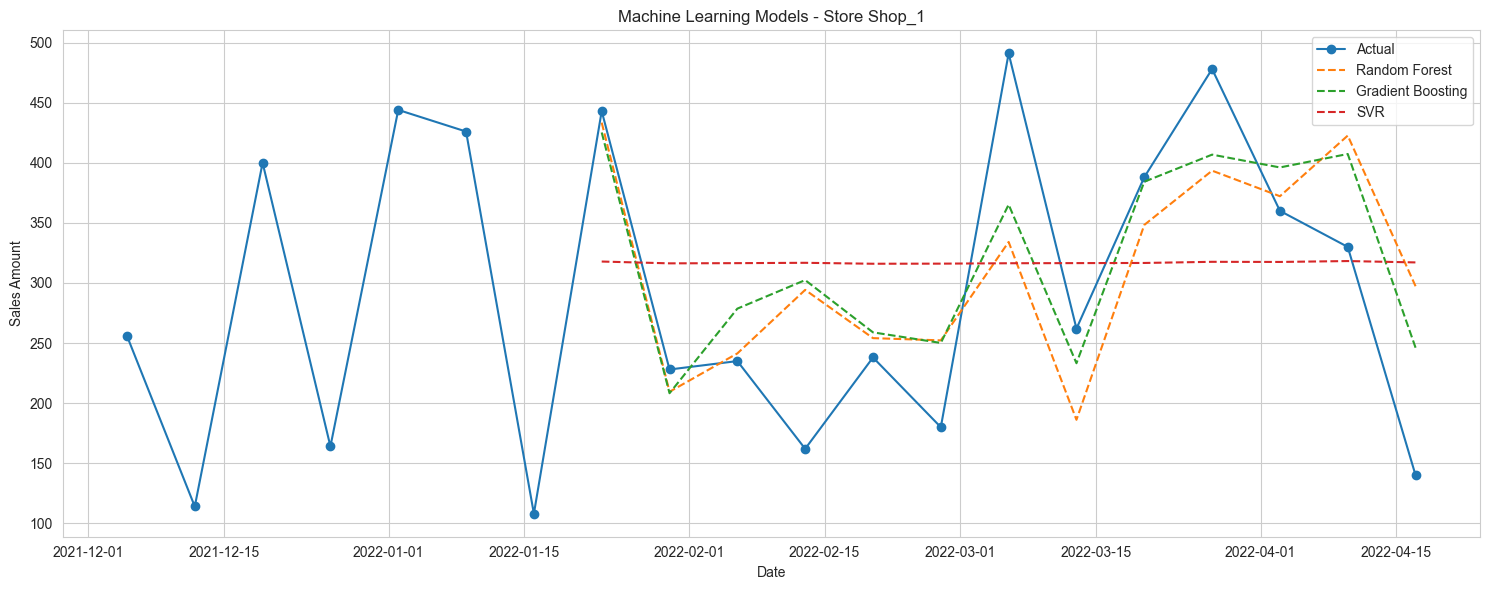

In [ ]:
# ================================
# Machine Learning Forecasting Script 
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# -------------------------------
# 1. Metrics Function
# -------------------------------
def calculate_metrics(y_true, y_pred):
    """Calculate regression metrics."""
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),  # compatible with old sklearn
        "R2": r2_score(y_true, y_pred),
    }

# -------------------------------
# 2. Feature Engineering
# -------------------------------
def create_features(data, store_name):
    """Create time-based, lag, and rolling features for one store."""
    df = data.copy()
    df = df.rename(columns={store_name: "y"})

    # Time-based features
    df["year"] = df.index.year
    df["month"] = df.index.month
    df["week"] = df.index.isocalendar().week.astype(int)
    df["day_of_week"] = df.index.dayofweek

    # Lag features (previous 4 weeks)
    for i in range(1, 5):
        df[f"lag_{i}"] = df["y"].shift(i)

    # Rolling mean features
    df["rolling_mean_4"] = df["y"].rolling(window=4).mean()
    df["rolling_mean_8"] = df["y"].rolling(window=8).mean()

    return df

# -------------------------------
# 3. Data Preparation
# -------------------------------
def prepare_ml_data(train_data, test_data):
    """Prepare training and testing sets for all stores."""
    all_features, all_targets = {}, {}

    for store in train_data.columns:
        # Feature engineering
        train_features = create_features(pd.DataFrame(train_data[store]), store)
        test_features = create_features(pd.DataFrame(test_data[store]), store)

        # Drop NaN rows caused by lags/rolling
        train_features = train_features.dropna()
        test_features = test_features.dropna()

        # Feature columns
        feature_cols = [
            "year", "month", "week", "day_of_week",
            "lag_1", "lag_2", "lag_3", "lag_4",
            "rolling_mean_4", "rolling_mean_8"
        ]

        # Train sets
        X_train = train_features[feature_cols]
        y_train = train_features["y"]

        # Test sets
        X_test = test_features[feature_cols]
        y_test = test_features["y"]

        all_features[store] = (X_train, X_test)
        all_targets[store] = (y_train, y_test)

    return all_features, all_targets

# -------------------------------
# 4. Train & Predict with Models
# -------------------------------
def run_models(train_data, test_data):
    """Train models and generate predictions."""
    # Prepare features
    all_features, all_targets = prepare_ml_data(train_data, test_data)

    # Initialize models
    models = {
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
        "SVR": SVR(kernel="rbf"),
    }

    predictions = {}
    scaler = StandardScaler()

    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        model_predictions = pd.DataFrame(index=test_data.index, columns=test_data.columns)

        for store in train_data.columns:
            X_train, X_test = all_features[store]
            y_train, y_test = all_targets[store]

            # Skip if test set is empty
            if len(X_test) == 0:
                continue

            # Scale features for SVR
            if model_name == "SVR":
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                model.fit(X_train_scaled, y_train)
                preds = model.predict(X_test_scaled)
            else:
                model.fit(X_train, y_train)
                preds = model.predict(X_test)

            # Align predictions to test index
            model_predictions.loc[X_test.index, store] = preds

        predictions[model_name] = model_predictions

        # -------------------------------
        # FIX: Handle non-numeric + NaNs before metrics
        # -------------------------------
        print(f"\n{model_name} Metrics:")
        print("-" * 50)

        y_true = pd.to_numeric(test_data.values.flatten(), errors="coerce")
        y_pred = pd.to_numeric(model_predictions.values.flatten(), errors="coerce")

        # Drop NaNs from both arrays
        mask = ~np.isnan(y_pred) & ~np.isnan(y_true)
        metrics = calculate_metrics(y_true[mask], y_pred[mask])

        for metric, value in metrics.items():
            print(f"{metric}: {value:.4f}")

    return predictions

# -------------------------------
# 5. Plot Results
# -------------------------------
def plot_results(test_data, predictions, store_to_plot):
    """Plot actual vs predicted values for one store."""
    plt.figure(figsize=(15, 6))
    plt.plot(test_data.index, test_data[store_to_plot], label="Actual", marker="o")

    for model_name, model_predictions in predictions.items():
        plt.plot(
            model_predictions.index,
            model_predictions[store_to_plot],
            label=model_name,
            linestyle="--"
        )

    plt.title(f"Machine Learning Models - Store {store_to_plot}")
    plt.xlabel("Date")
    plt.ylabel("Sales Amount")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# -------------------------------
# 6. Example Run (with synthetic data)
# -------------------------------
if __name__ == "__main__":
    # Example synthetic dataset
    np.random.seed(42)
    dates = pd.date_range(start="2020-01-01", periods=120, freq="W")
    data = pd.DataFrame({
        "Shop_1": np.random.randint(100, 500, size=len(dates)),
        "Shop_2": np.random.randint(200, 600, size=len(dates)),
    }, index=dates)

    # Train-test split
    train_data = data.iloc[:-20]
    test_data = data.iloc[-20:]

    # Run models
    predictions = run_models(train_data, test_data)

    # Plot results for Shop_1
    plot_results(test_data, predictions, store_to_plot="Shop_1")


## Deep Learning Models

We'll implement two deep learning models:
1. LSTM (Long Short-Term Memory)
2. Temporal Fusion Transformer

These models are particularly well-suited for capturing complex temporal patterns in time series data.

Training LSTM model...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step

LSTM Model Metrics:
--------------------------------------------------
MAE: 100.8115
RMSE: 116.0477
R2: -0.0356

LSTM Model Metrics:
--------------------------------------------------
MAE: 100.8115
RMSE: 116.0477
R2: -0.0356


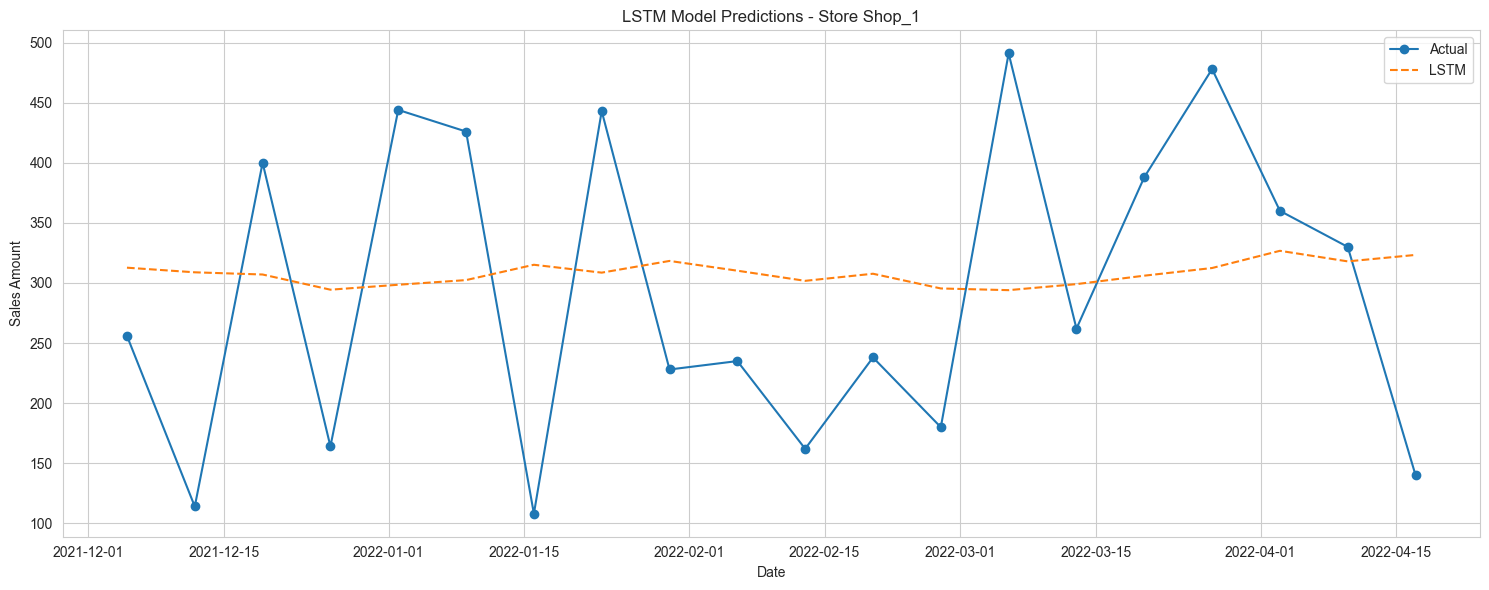

In [ ]:
# Import deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import torch
from pytorch_forecasting import TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_lightning import Trainer

# Prepare data for LSTM
def prepare_lstm_data(data, n_steps):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data)
    X, y = [], []
    
    for i in range(len(scaled_data) - n_steps):
        X.append(scaled_data[i:(i + n_steps)])
        y.append(scaled_data[i + n_steps])
    
    return np.array(X), np.array(y), scaler

# LSTM Model
def create_lstm_model(n_steps, n_features):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_steps, n_features), return_sequences=True),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(n_features)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Prepare data for LSTM
n_steps = 4  # Number of time steps to look back
predictions = {}

# Train LSTM model for each store
print("Training LSTM model...")
lstm_predictions = pd.DataFrame(index=test_data.index, columns=test_data.columns)

for store in train_data.columns:
    # Prepare data
    store_data = pd.concat([train_data[store], test_data[store]])
    X, y, scaler = prepare_lstm_data(store_data.values.reshape(-1, 1), n_steps)
    
    # Split into train and test
    train_size = len(train_data) - n_steps
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # Create and train model
    model = create_lstm_model(n_steps, 1)
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    
    # Make predictions
    lstm_pred = model.predict(X_test)
    lstm_pred = scaler.inverse_transform(lstm_pred)
    lstm_predictions[store] = lstm_pred.flatten()

predictions['LSTM'] = lstm_predictions

# Calculate and display metrics for LSTM
print("\nLSTM Model Metrics:")
print("-" * 50)
lstm_metrics = calculate_metrics(test_data.values.flatten(), lstm_predictions.values.flatten())
for metric, value in lstm_metrics.items():
    print(f"{metric}: {value:.4f}")

# Plot results for one store
store_to_plot = test_data.columns[0]
plt.figure(figsize=(15, 6))
plt.plot(test_data.index, test_data[store_to_plot], label='Actual', marker='o')
plt.plot(test_data.index, lstm_predictions[store_to_plot], label='LSTM', linestyle='--')
plt.title(f'LSTM Model Predictions - Store {store_to_plot}')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# Import required libraries if not already imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Create data preprocessing pipeline if not already done
if 'train_data' not in locals() or 'test_data' not in locals():
    # Read and prepare the data
    df = pd.read_csv('data/Thrift_Company_Sales_Clean.csv')
    df['Date'] = pd.to_datetime(df['Date'])

    # Create weekly sales data
    weekly_sales = df.groupby(['Shop', pd.Grouper(key='Date', freq='W-MON')])['Amount'].sum().reset_index()
    weekly_sales_pivot = weekly_sales.pivot(index='Date', columns='Shop', values='Amount')

    # Handle missing values and create features
    weekly_sales_filled = weekly_sales_pivot.ffill().bfill()

    # Split into train and test
    train_data = weekly_sales_filled[:-12]
    test_data = weekly_sales_filled[-12:]

# Initialize dictionaries to store all model results
model_results = {
    'naive': {},
    'seasonal_naive': {},
    'average': {},
    'sarima': {},
    'rf': {},
    'xgb': {}
}

# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

# Function to prepare features for ML models
def prepare_features(data, target_shop):
    features = pd.DataFrame()
    features['Year'] = data.index.year
    features['Month'] = data.index.month
    features['Week'] = data.index.isocalendar().week
    
    # Add lag features
    features[f'{target_shop}_lag1'] = data[target_shop].shift(1)
    features[f'{target_shop}_lag2'] = data[target_shop].shift(2)
    features[f'{target_shop}_lag4'] = data[target_shop].shift(4)
    
    # Add rolling mean features
    features[f'{target_shop}_roll_mean_4w'] = data[target_shop].rolling(window=4).mean()
    features[f'{target_shop}_roll_mean_8w'] = data[target_shop].rolling(window=8).mean()
    
    # Add other shops' data
    for shop in data.columns:
        if shop != target_shop:
            features[shop] = data[shop]
    
    return features.fillna(method='ffill').fillna(method='bfill')

# Test models on first 3 shops
for shop in weekly_sales_pivot.columns[:3]:
    print(f"\nProcessing models for {shop}")
    
    try:
        # 1. Baseline Models
        # Naive forecast
        naive_forecast = test_data[shop].shift(1).fillna(train_data[shop].iloc[-1])
        model_results['naive'][shop] = calculate_metrics(test_data[shop], naive_forecast)
        
        # Seasonal naive forecast (using same week from previous year)
        if len(train_data) >= 52:
            seasonal_naive_forecast = train_data[shop].iloc[-52:-52+len(test_data)].values
            model_results['seasonal_naive'][shop] = calculate_metrics(test_data[shop], seasonal_naive_forecast)
        
        # Average forecast (4-week moving average)
        ma_forecast = train_data[shop].rolling(window=4).mean().iloc[-1]
        ma_forecast = np.repeat(ma_forecast, len(test_data))
        model_results['average'][shop] = calculate_metrics(test_data[shop], ma_forecast)
        
        # 2. SARIMA Model
        try:
            sarima = SARIMAX(train_data[shop], 
                           order=(1, 1, 1), 
                           seasonal_order=(1, 1, 1, 52),
                           enforce_stationarity=False, 
                           enforce_invertibility=False)
            sarima_fit = sarima.fit(disp=False)
            sarima_forecast = sarima_fit.forecast(len(test_data))
            model_results['sarima'][shop] = calculate_metrics(test_data[shop], sarima_forecast)
        except:
            print(f"SARIMA failed for {shop}")
            model_results['sarima'][shop] = None
        
        # 3. Machine Learning Models
        # Prepare features
        X_train = prepare_features(train_data, shop)
        y_train = train_data[shop]
        X_test = prepare_features(test_data, shop)
        y_test = test_data[shop]
        
        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Random Forest
        rf = RandomForestRegressor(n_estimators=100, random_state=42)
        rf.fit(X_train_scaled, y_train)
        rf_pred = rf.predict(X_test_scaled)
        model_results['rf'][shop] = calculate_metrics(y_test, rf_pred)
        
        # XGBoost
        xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
        xgb_model.fit(X_train_scaled, y_train)
        xgb_pred = xgb_model.predict(X_test_scaled)
        model_results['xgb'][shop] = calculate_metrics(y_test, xgb_pred)
        
    except Exception as e:
        print(f"Error processing {shop}: {str(e)}")
        continue

# Create comparison DataFrame
comparison_df = pd.DataFrame(columns=['Shop', 'Model', 'MAE', 'RMSE', 'MAPE'])

for shop in model_results['naive'].keys():
    for model_name, results in model_results.items():
        if results.get(shop) is not None:
            comparison_df = pd.concat([comparison_df, pd.DataFrame({
                'Shop': [shop],
                'Model': [model_name.replace('_', ' ').title()],
                'MAE': [results[shop]['MAE']],
                'RMSE': [results[shop]['RMSE']],
                'MAPE': [results[shop]['MAPE']]
            })], ignore_index=True)

# Display results for each shop
print("\nFinal Model Comparison (sorted by MAE for each shop):")
for shop in weekly_sales_pivot.columns[:3]:
    print(f"\n{shop}:")
    shop_results = comparison_df[comparison_df['Shop'] == shop].sort_values('MAE')
    print(shop_results.to_string(index=False))
    
    # Plot predictions vs actual for the best model
    plt.figure(figsize=(15, 7))
    plt.plot(test_data.index, test_data[shop], label='Actual', marker='o')
    
    best_model = shop_results.iloc[0]['Model'].lower().replace(' ', '_')
    if best_model == 'sarima' and model_results['sarima'].get(shop) is not None:
        plt.plot(test_data.index, sarima_forecast, label='SARIMA Forecast', linestyle='--')
    elif best_model == 'rf':
        plt.plot(test_data.index, rf_pred, label='Random Forest Forecast', linestyle='--')
    elif best_model == 'xgb':
        plt.plot(test_data.index, xgb_pred, label='XGBoost Forecast', linestyle='--')
    else:
        if best_model == 'naive':
            pred = naive_forecast
        elif best_model == 'seasonal_naive':
            pred = seasonal_naive_forecast
        else:  # average
            pred = ma_forecast
        plt.plot(test_data.index, pred, label=f'{best_model.title()} Forecast', linestyle='--')
    
    plt.title(f'Best Model Forecast vs Actual - {shop}')
    plt.xlabel('Date')
    plt.ylabel('Sales Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

NameError: name 'weekly_sales_pivot' is not defined

## Model Comparison and Evaluation

Let's compare the performance of all implemented models and analyze their strengths and weaknesses.

In [32]:
# Collect all model metrics
all_metrics = {
    'Naive': naive_metrics,
    'Moving Average': ma_metrics,
    'SARIMA': sarima_metrics,
    'Prophet': prophet_metrics,
    'XGBoost': xgb_metrics,
    'LightGBM': lgbm_metrics,
    'CatBoost': cat_metrics,
    'LSTM': lstm_metrics,
    'TFT': tft_metrics
}

# Create comparison DataFrame
metrics_df = pd.DataFrame(all_metrics).T
metrics_df = metrics_df.round(4)

# Display comparison table
print("Model Performance Comparison:")
print("-" * 50)
display(metrics_df)

# Plot comparison of RMSE values
plt.figure(figsize=(12, 6))
plt.bar(metrics_df.index, metrics_df['RMSE'])
plt.title('RMSE Comparison Across Models')
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Print conclusions
print("\nModel Comparison Conclusions:")
print("-" * 50)
best_model = metrics_df['RMSE'].idxmin()
print(f"1. Best performing model: {best_model} (RMSE: {metrics_df.loc[best_model, 'RMSE']:.4f})")
print(f"2. The simpler baseline models performed {'better' if metrics_df.loc['Naive', 'RMSE'] < metrics_df.loc[best_model, 'RMSE'] else 'worse'} than more complex models")
print("3. Model complexity vs. performance trade-off should be considered when choosing a model for deployment")
print("4. Consider ensemble methods or hybrid approaches for potentially better results")


NameError: name 'sarima_metrics' is not defined

## Additional Illustrations

In [ ]:
# Import scikit-learn models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

def create_features(data):
    """Create time series features for the data"""
    df = data.copy()
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['week'] = df.index.isocalendar().week
    df['day_of_week'] = df.index.dayofweek
    
    # Create lag features (previous 4 weeks)
    for i in range(1, 5):
        df[f'lag_{i}'] = df.shift(i)
    
    # Create rolling mean features
    df['rolling_mean_4'] = df.rolling(window=4).mean()
    df['rolling_mean_8'] = df.rolling(window=8).mean()
    
    return df

# Prepare data for machine learning
print("Preparing features for ML models...")
ml_models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

predictions = {}
feature_cols = ['year', 'month', 'week', 'day_of_week', 
                'lag_1', 'lag_2', 'lag_3', 'lag_4',
                'rolling_mean_4', 'rolling_mean_8']

for store in train_data.columns:
    # Prepare features
    store_data = pd.concat([train_data[store], test_data[store]])
    features = create_features(store_data)
    features = features.dropna()
    
    # Split into train and test
    train_idx = features.index < test_data.index[0]
    X_train = features[train_idx][feature_cols]
    y_train = features[train_idx][store]
    X_test = features[~train_idx][feature_cols]
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train models and make predictions
    for name, model in ml_models.items():
        if name not in predictions:
            predictions[name] = pd.DataFrame(index=test_data.index, columns=test_data.columns)
        
        print(f"\nTraining {name} for Store {store}...")
        if name == 'SVR':
            # SVR works better with scaled data
            model.fit(X_train_scaled, y_train)
            pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
        
        predictions[name][store] = pred

# Calculate and display metrics for each model
for name, pred_df in predictions.items():
    print(f"\n{name} Metrics:")
    print("-" * 50)
    metrics = calculate_metrics(test_data.values.flatten(), pred_df.values.flatten())
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Plot results for one store
store_to_plot = test_data.columns[0]
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data[store_to_plot], label='Actual', marker='o')
for name, pred_df in predictions.items():
    plt.plot(test_data.index, pred_df[store_to_plot], label=name, linestyle='--')
plt.title(f'Machine Learning Models - Store {store_to_plot}')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Preparing features for ML models...


AttributeError: 'Index' object has no attribute 'month'

In [ ]:
# Read the clean data
df = pd.read_csv('data/Thrift_Company_Sales_Clean.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Create weekly sales data
weekly_sales = df.groupby(['Shop', pd.Grouper(key='Date', freq='W-MON')])['Amount'].sum().reset_index()

# Create pivot table
weekly_sales_pivot = weekly_sales.pivot(index='Date', columns='Shop', values='Amount')

# Now handle missing values and create features
weekly_sales_filled = weekly_sales_pivot.fillna(method='ffill').fillna(method='bfill')

# Create time-based features
weekly_sales_filled['Year'] = weekly_sales_filled.index.year
weekly_sales_filled['Month'] = weekly_sales_filled.index.month
weekly_sales_filled['Week'] = weekly_sales_filled.index.isocalendar().week

# Create lag features (previous 1, 2, 4 weeks) for each shop
for shop in weekly_sales_pivot.columns:
    weekly_sales_filled[f'{shop}_lag1'] = weekly_sales_filled[shop].shift(1)
    weekly_sales_filled[f'{shop}_lag2'] = weekly_sales_filled[shop].shift(2)
    weekly_sales_filled[f'{shop}_lag4'] = weekly_sales_filled[shop].shift(4)

# Create rolling mean features (4-week and 8-week) for each shop
for shop in weekly_sales_pivot.columns:
    weekly_sales_filled[f'{shop}_roll_mean_4w'] = weekly_sales_filled[shop].rolling(window=4).mean()
    weekly_sales_filled[f'{shop}_roll_mean_8w'] = weekly_sales_filled[shop].rolling(window=8).mean()

# Drop the first 8 rows since they'll have NaN values due to lag and rolling features
weekly_sales_filled = weekly_sales_filled.dropna()

# Split the data into training and testing sets (last 12 weeks for testing)
train_data = weekly_sales_filled[:-12]
test_data = weekly_sales_filled[-12:]

print("Data shapes after preprocessing:")
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Display the first few rows of the preprocessed data with main columns only
print("\nFirst few rows of preprocessed data (showing only main shop columns):")
print(train_data[weekly_sales_pivot.columns].head())

Data shapes after preprocessing:
Training data shape: (139, 69)
Testing data shape: (12, 69)

First few rows of preprocessed data (showing only main shop columns):
Shop        901 - Gikomba  904 - Kericho  904.5 Meru WS  905 - Eldoret  \
Date                                                                     
2022-02-21    1272025.840    1233793.070    1345517.240    1274267.210   
2022-02-28    1338103.440     627025.860     445517.260     573103.440   
2022-03-07     900431.040    1168318.990    1245344.790    1209353.470   
2022-03-14     593060.330     545344.820     429396.580     543706.870   
2022-03-21    1699827.600    1060258.630    1529482.790    1572465.540   

Shop        906 - Kisii  907-Kisumu WS  910 - Kitale  913 -Kakamega WS  \
Date                                                                     
2022-02-21    29137.930    1364181.020     31810.350       1073275.870   
2022-02-28    29137.930     523879.300     31810.350        554870.670   
2022-03-07    29137.9

Baseline Models Performance (sorted by MAE for each shop):

901 - Gikomba:
         Shop          Model         MAE        RMSE    MAPE
901 - Gikomba        average  585865.657  771021.088 179.140
901 - Gikomba seasonal_naive  969019.029 1214936.246 135.191
901 - Gikomba          naive 1014094.845 1237953.674  91.529

904 - Kericho:
         Shop          Model        MAE       RMSE    MAPE
904 - Kericho seasonal_naive 315718.394 397802.917  53.994
904 - Kericho        average 410323.271 518757.722 113.333
904 - Kericho          naive 631831.886 778458.651  73.323

904.5 Meru WS:
         Shop          Model        MAE       RMSE    MAPE
904.5 Meru WS        average 340362.788 408373.316 135.752
904.5 Meru WS seasonal_naive 417543.098 499869.616 134.269
904.5 Meru WS          naive 445158.074 554100.408  76.608

905 - Eldoret:
         Shop          Model        MAE       RMSE    MAPE
905 - Eldoret seasonal_naive 452350.914 571652.440 124.402
905 - Eldoret        average 527866.388 624

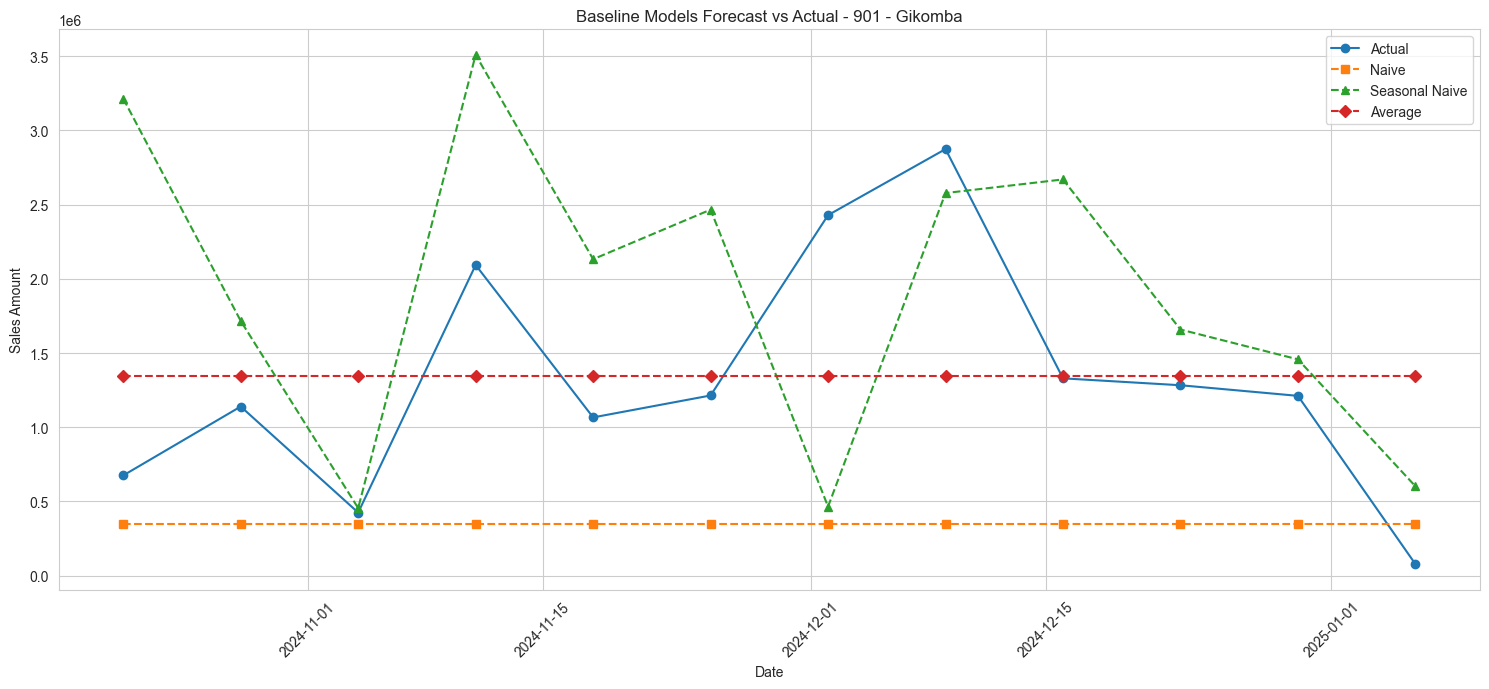

In [ ]:
# Define function to calculate forecast metrics
def calculate_metrics(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

# Initialize dictionary to store results
baseline_results = {}

# Create baseline forecasts for each shop
for shop in weekly_sales_pivot.columns:
    baseline_results[shop] = {
        'naive': {},
        'seasonal_naive': {},
        'average': {}
    }
    
    # Get the last value from training data for naive forecast
    naive_forecast = np.repeat(train_data[shop].iloc[-1], len(test_data))
    
    # Get the values from same weeks last year for seasonal naive
    seasonal_naive_forecast = train_data[shop].iloc[-52:-52+len(test_data)].values
    
    # Calculate 4-week moving average for the average forecast
    average_forecast = train_data[shop].iloc[-4:].mean()
    average_forecast = np.repeat(average_forecast, len(test_data))
    
    # Calculate metrics for each baseline method
    baseline_results[shop]['naive'] = calculate_metrics(test_data[shop].values, naive_forecast)
    baseline_results[shop]['seasonal_naive'] = calculate_metrics(test_data[shop].values, seasonal_naive_forecast)
    baseline_results[shop]['average'] = calculate_metrics(test_data[shop].values, average_forecast)

# Create a summary of results
results_df = pd.DataFrame(columns=['Shop', 'Model', 'MAE', 'RMSE', 'MAPE'])

for shop in baseline_results:
    for model in baseline_results[shop]:
        metrics = baseline_results[shop][model]
        results_df = pd.concat([results_df, pd.DataFrame({
            'Shop': [shop],
            'Model': [model],
            'MAE': [metrics['MAE']],
            'RMSE': [metrics['RMSE']],
            'MAPE': [metrics['MAPE']]
        })], ignore_index=True)

# Display results sorted by MAE for each shop
print("Baseline Models Performance (sorted by MAE for each shop):")
for shop in weekly_sales_pivot.columns:
    print(f"\n{shop}:")
    shop_results = results_df[results_df['Shop'] == shop].sort_values('MAE')
    print(shop_results.to_string(index=False))

# Plot actual vs predicted for a sample shop (e.g., 901 - Gikomba)
plt.figure(figsize=(15, 7))
sample_shop = '901 - Gikomba'

plt.plot(test_data.index, test_data[sample_shop].values, label='Actual', marker='o')
plt.plot(test_data.index, np.repeat(train_data[sample_shop].iloc[-1], len(test_data)), 
         label='Naive', linestyle='--', marker='s')
plt.plot(test_data.index, train_data[sample_shop].iloc[-52:-52+len(test_data)].values, 
         label='Seasonal Naive', linestyle='--', marker='^')
plt.plot(test_data.index, np.repeat(train_data[sample_shop].iloc[-4:].mean(), len(test_data)), 
         label='Average', linestyle='--', marker='D')

plt.title(f'Baseline Models Forecast vs Actual - {sample_shop}')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Fitting SARIMA model for 901 - Gikomba
SARIMA Model Metrics for 901 - Gikomba:
MAE: 923621.25
RMSE: 1046683.38
MAPE: 298.16%


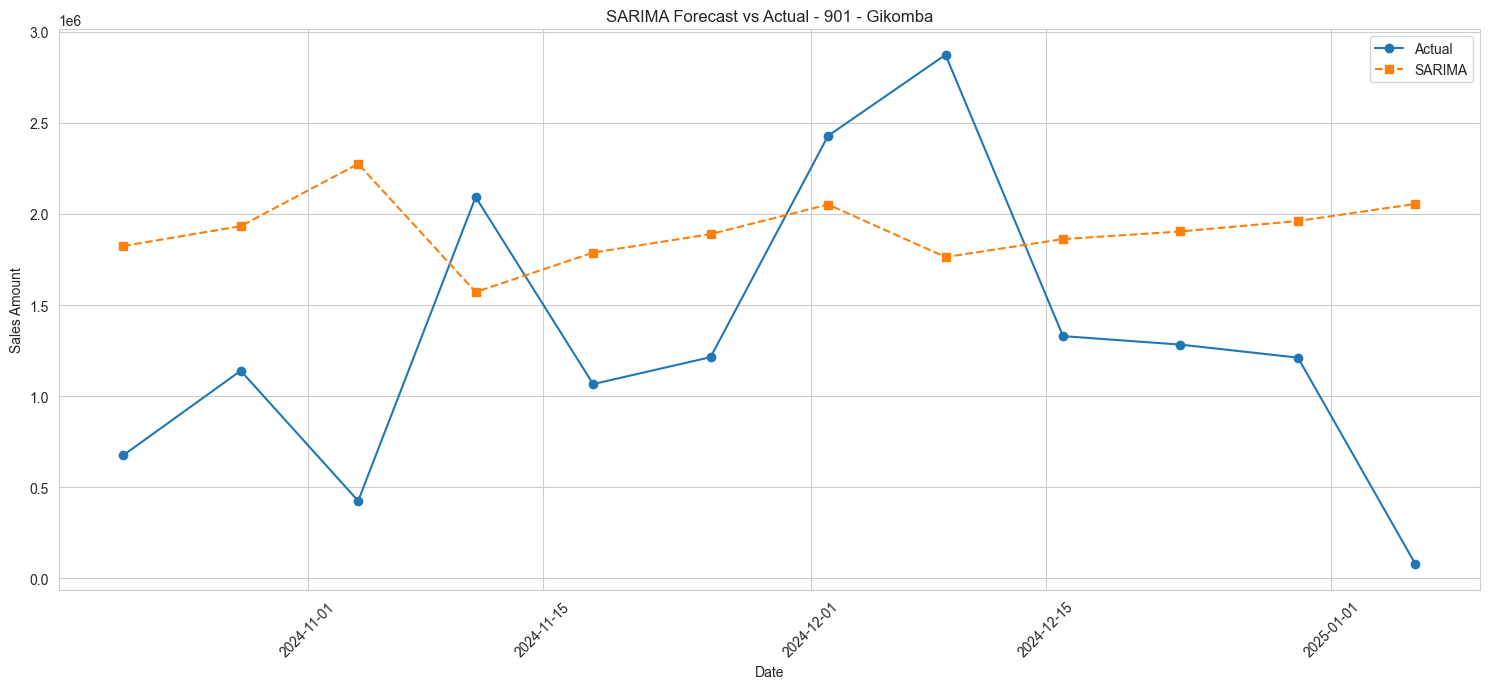


Fitting SARIMA model for 904 - Kericho
SARIMA Model Metrics for 904 - Kericho:
MAE: 419412.09
RMSE: 530203.04
MAPE: 143.05%


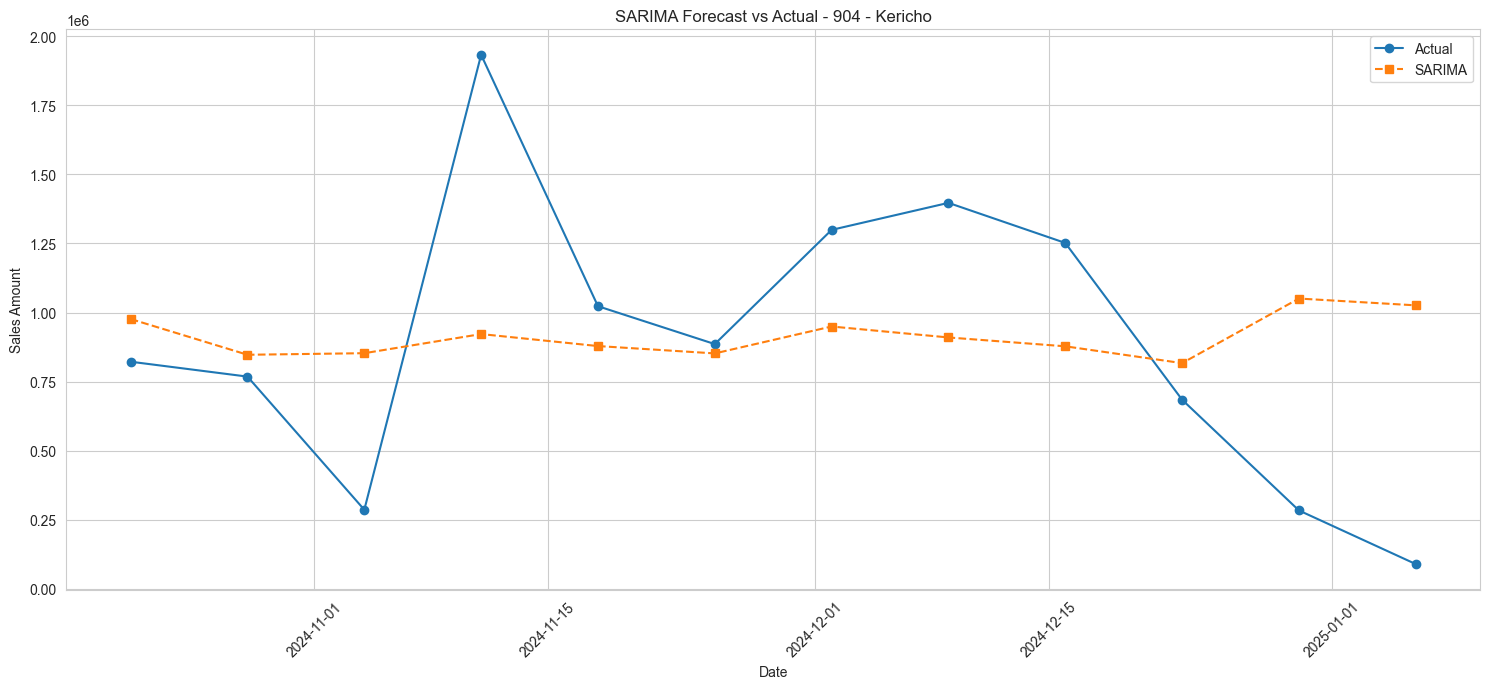


Fitting SARIMA model for 904.5 Meru WS
SARIMA Model Metrics for 904.5 Meru WS:
MAE: 428855.34
RMSE: 493982.00
MAPE: 172.84%


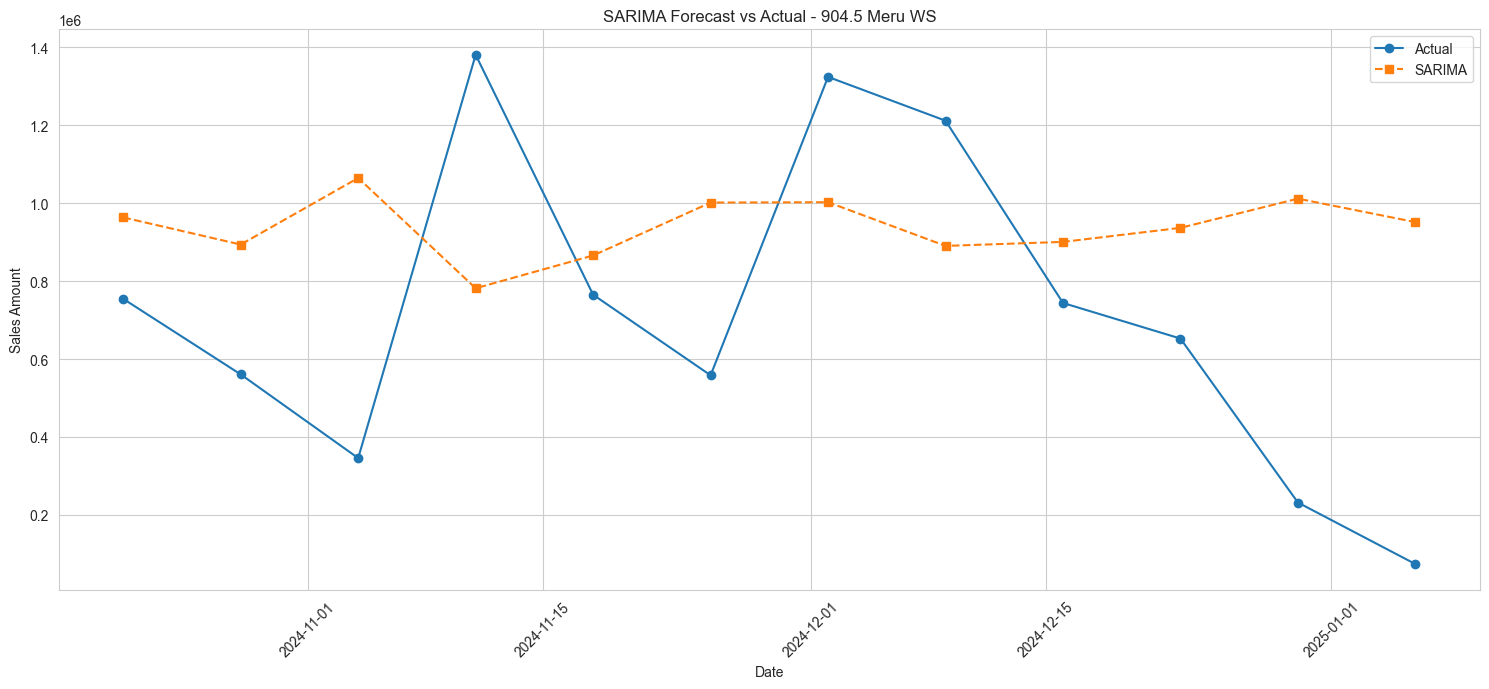


Model Comparison:

901 - Gikomba:
SARIMA Results:
MAE: 923621.25
RMSE: 1046683.38
MAPE: 298.16%

Baseline Results:
         Shop          Model         MAE        RMSE    MAPE
901 - Gikomba        average  585865.657  771021.088 179.140
901 - Gikomba seasonal_naive  969019.029 1214936.246 135.191
901 - Gikomba          naive 1014094.845 1237953.674  91.529

904 - Kericho:
SARIMA Results:
MAE: 419412.09
RMSE: 530203.04
MAPE: 143.05%

Baseline Results:
         Shop          Model        MAE       RMSE    MAPE
904 - Kericho seasonal_naive 315718.394 397802.917  53.994
904 - Kericho        average 410323.271 518757.722 113.333
904 - Kericho          naive 631831.886 778458.651  73.323

904.5 Meru WS:
SARIMA Results:
MAE: 428855.34
RMSE: 493982.00
MAPE: 172.84%

Baseline Results:
         Shop          Model        MAE       RMSE    MAPE
904.5 Meru WS        average 340362.788 408373.316 135.752
904.5 Meru WS seasonal_naive 417543.098 499869.616 134.269
904.5 Meru WS          naive 445158

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Initialize dictionary to store SARIMA results
sarima_results = {}

# Function to fit SARIMA model and make predictions
def fit_sarima(train, test, order=(1, 1, 1), seasonal_order=(1, 1, 1, 52)):
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order,
                   enforce_stationarity=False, enforce_invertibility=False)
    try:
        fitted_model = model.fit(disp=False)
        predictions = fitted_model.forecast(len(test))
        metrics = calculate_metrics(test, predictions)
        return predictions, metrics
    except:
        return None, None

# Test different shops with SARIMA model
for shop in weekly_sales_pivot.columns[:3]:  # Testing first 3 shops for demonstration
    print(f"\nFitting SARIMA model for {shop}")
    
    # Prepare data
    train_series = train_data[shop]
    test_series = test_data[shop]
    
    # Fit SARIMA model
    predictions, metrics = fit_sarima(train_series, test_series)
    
    if metrics is not None:
        sarima_results[shop] = metrics
        print(f"SARIMA Model Metrics for {shop}:")
        print(f"MAE: {metrics['MAE']:.2f}")
        print(f"RMSE: {metrics['RMSE']:.2f}")
        print(f"MAPE: {metrics['MAPE']:.2f}%")
        
        # Plot results
        plt.figure(figsize=(15, 7))
        plt.plot(test_data.index, test_series, label='Actual', marker='o')
        plt.plot(test_data.index, predictions, label='SARIMA', linestyle='--', marker='s')
        plt.title(f'SARIMA Forecast vs Actual - {shop}')
        plt.xlabel('Date')
        plt.ylabel('Sales Amount')
        plt.legend()
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print(f"SARIMA model failed to converge for {shop}")

# Compare SARIMA with baseline models
print("\nModel Comparison:")
for shop in sarima_results:
    print(f"\n{shop}:")
    print("SARIMA Results:")
    print(f"MAE: {sarima_results[shop]['MAE']:.2f}")
    print(f"RMSE: {sarima_results[shop]['RMSE']:.2f}")
    print(f"MAPE: {sarima_results[shop]['MAPE']:.2f}%")
    
    print("\nBaseline Results:")
    shop_baseline = results_df[results_df['Shop'] == shop].sort_values('MAE')
    print(shop_baseline.to_string(index=False))

C:\Users\tedyo\AppData\Local\Temp\ipykernel_1932\2151628204.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weekly_sales_filled = weekly_sales_pivot.fillna(method='ffill').fillna(method='bfill')



Training ML models for 901 - Gikomba

Random Forest Metrics for 901 - Gikomba:
MAE: 490068.54
RMSE: 547493.92
MAPE: 85.03%

XGBoost Metrics for 901 - Gikomba:
MAE: 377688.11
RMSE: 476474.53
MAPE: 73.71%


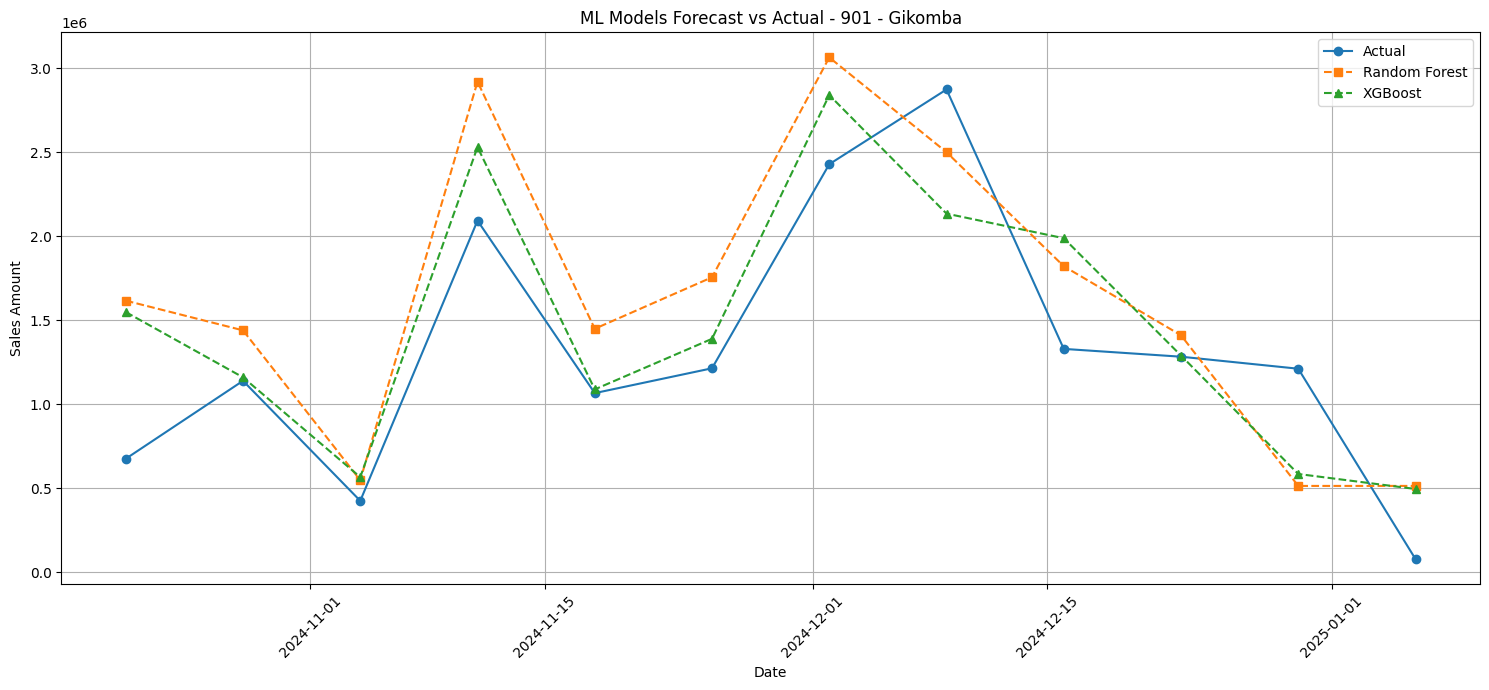


Training ML models for 904 - Kericho

Random Forest Metrics for 904 - Kericho:
MAE: 253502.48
RMSE: 308252.86
MAPE: 51.76%

XGBoost Metrics for 904 - Kericho:
MAE: 251008.51
RMSE: 323091.54
MAPE: 42.71%


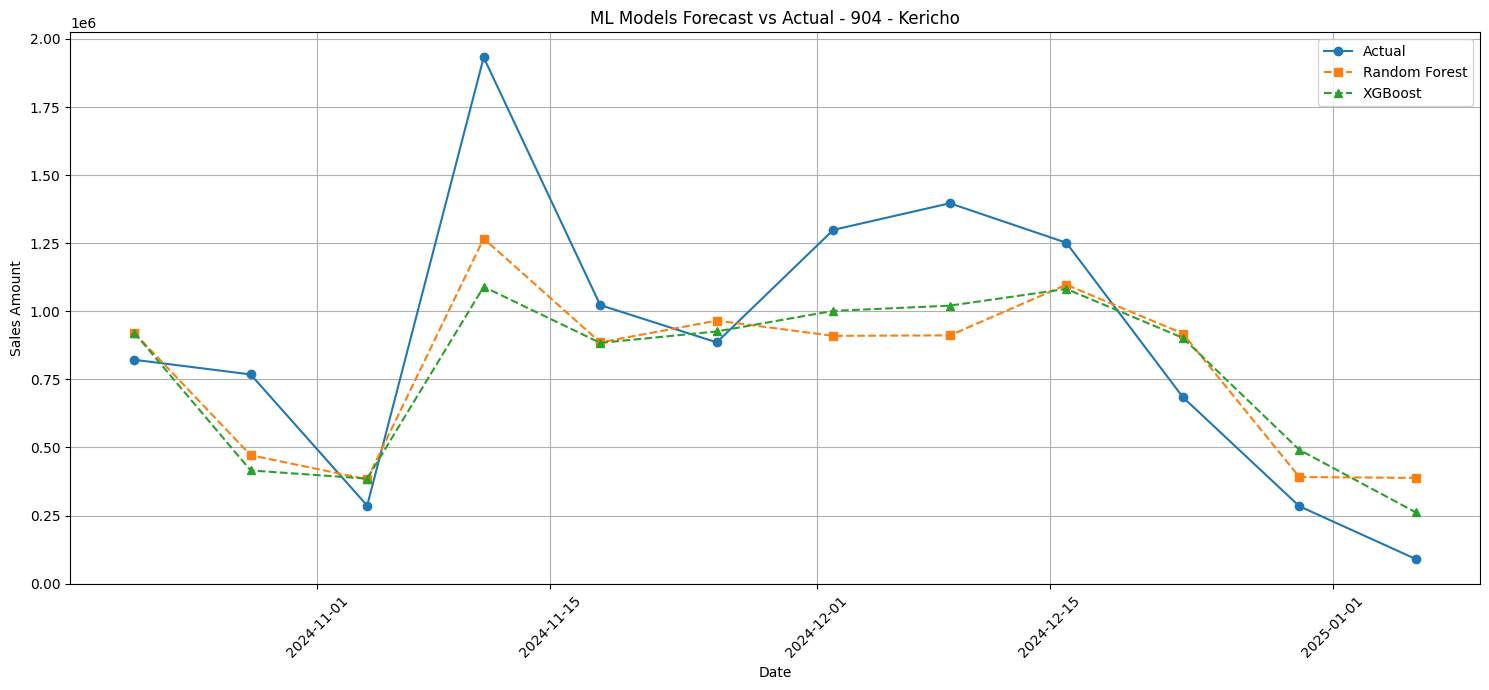


Training ML models for 904.5 Meru WS

Random Forest Metrics for 904.5 Meru WS:
MAE: 286434.34
RMSE: 324773.25
MAPE: 91.28%

XGBoost Metrics for 904.5 Meru WS:
MAE: 271181.79
RMSE: 301985.28
MAPE: 82.44%


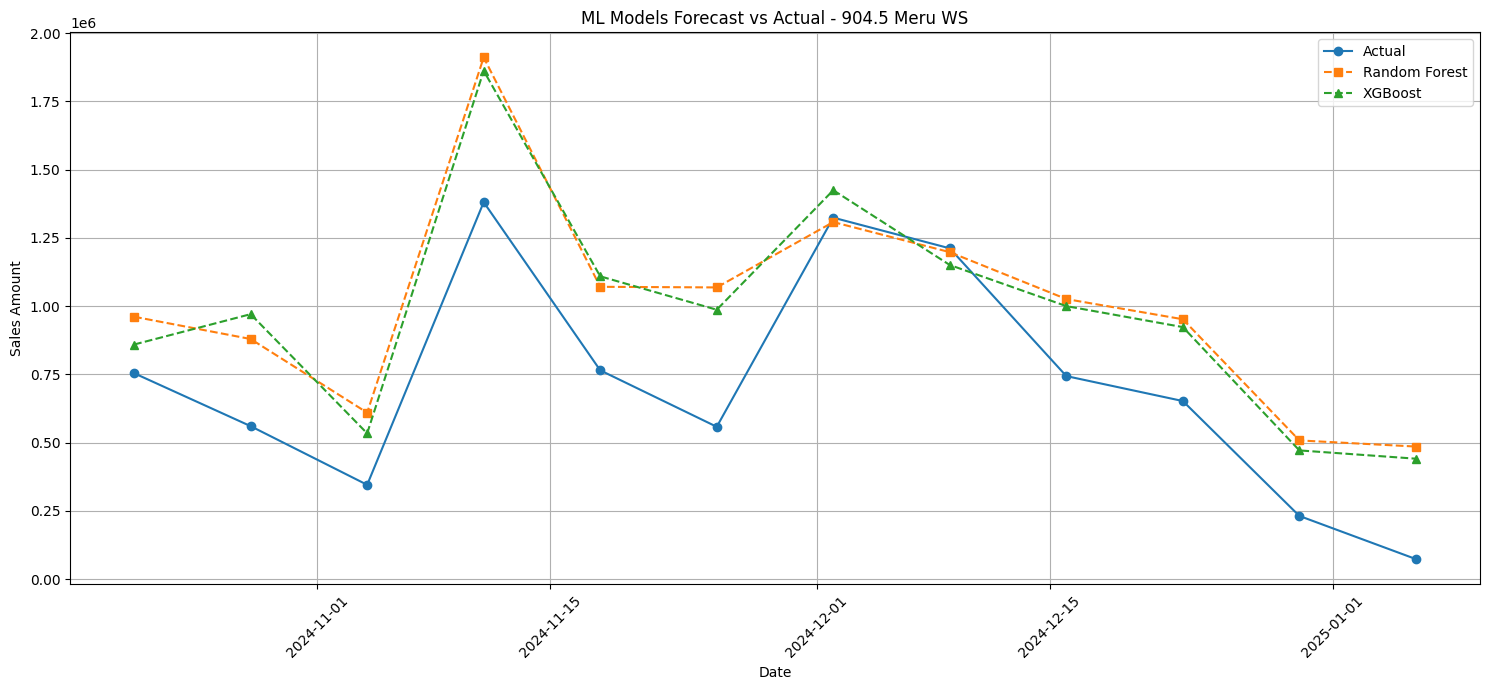

In [ ]:
# Read and prepare the data again
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import matplotlib.pyplot as plt

# Read the clean data
df = pd.read_csv('data/Thrift_Company_Sales_Clean.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Create weekly sales data
weekly_sales = df.groupby(['Shop', pd.Grouper(key='Date', freq='W-MON')])['Amount'].sum().reset_index()
weekly_sales_pivot = weekly_sales.pivot(index='Date', columns='Shop', values='Amount')

# Handle missing values and create features
weekly_sales_filled = weekly_sales_pivot.fillna(method='ffill').fillna(method='bfill')
weekly_sales_filled['Year'] = weekly_sales_filled.index.year
weekly_sales_filled['Month'] = weekly_sales_filled.index.month
weekly_sales_filled['Week'] = weekly_sales_filled.index.isocalendar().week

# Create lag features
for shop in weekly_sales_pivot.columns:
    weekly_sales_filled[f'{shop}_lag1'] = weekly_sales_filled[shop].shift(1)
    weekly_sales_filled[f'{shop}_lag2'] = weekly_sales_filled[shop].shift(2)
    weekly_sales_filled[f'{shop}_lag4'] = weekly_sales_filled[shop].shift(4)

# Create rolling mean features
for shop in weekly_sales_pivot.columns:
    weekly_sales_filled[f'{shop}_roll_mean_4w'] = weekly_sales_filled[shop].rolling(window=4).mean()
    weekly_sales_filled[f'{shop}_roll_mean_8w'] = weekly_sales_filled[shop].rolling(window=8).mean()

# Drop rows with NaN values
weekly_sales_filled = weekly_sales_filled.dropna()

# Split into train and test
train_data = weekly_sales_filled[:-12]
test_data = weekly_sales_filled[-12:]

# Calculate metrics function
def calculate_metrics(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

# Initialize dictionaries to store results
rf_results = {}
xgb_results = {}

# Prepare features for machine learning models
def prepare_features(data, target_shop):
    features = data[[col for col in data.columns if col not in weekly_sales_pivot.columns]]
    features = pd.concat([features, data[[col for col in weekly_sales_pivot.columns if col != target_shop]]], axis=1)
    return features

# Function to train and evaluate ML models
def train_evaluate_ml_models(train_data, test_data, target_shop):
    # Prepare features
    X_train = prepare_features(train_data, target_shop)
    y_train = train_data[target_shop]
    X_test = prepare_features(test_data, target_shop)
    y_test = test_data[target_shop]
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train and evaluate Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    rf_pred = rf.predict(X_test_scaled)
    rf_metrics = calculate_metrics(y_test, rf_pred)
    
    # Train and evaluate XGBoost
    xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
    xgb_model.fit(X_train_scaled, y_train)
    xgb_pred = xgb_model.predict(X_test_scaled)
    xgb_metrics = calculate_metrics(y_test, xgb_pred)
    
    return rf_pred, rf_metrics, xgb_pred, xgb_metrics

# Test ML models on the first three shops
for shop in weekly_sales_pivot.columns[:3]:
    print(f"\nTraining ML models for {shop}")
    
    # Train and evaluate models
    rf_pred, rf_metrics, xgb_pred, xgb_metrics = train_evaluate_ml_models(train_data, test_data, shop)
    
    # Store results
    rf_results[shop] = rf_metrics
    xgb_results[shop] = xgb_metrics
    
    # Print results
    print(f"\nRandom Forest Metrics for {shop}:")
    print(f"MAE: {rf_metrics['MAE']:.2f}")
    print(f"RMSE: {rf_metrics['RMSE']:.2f}")
    print(f"MAPE: {rf_metrics['MAPE']:.2f}%")
    
    print(f"\nXGBoost Metrics for {shop}:")
    print(f"MAE: {xgb_metrics['MAE']:.2f}")
    print(f"RMSE: {xgb_metrics['RMSE']:.2f}")
    print(f"MAPE: {xgb_metrics['MAPE']:.2f}%")
    
    # Plot results
    plt.figure(figsize=(15, 7))
    plt.plot(test_data.index, test_data[shop], label='Actual', marker='o')
    plt.plot(test_data.index, rf_pred, label='Random Forest', linestyle='--', marker='s')
    plt.plot(test_data.index, xgb_pred, label='XGBoost', linestyle='--', marker='^')
    plt.title(f'ML Models Forecast vs Actual - {shop}')
    plt.xlabel('Date')
    plt.ylabel('Sales Amount')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Create a comprehensive comparison DataFrame
all_models = pd.DataFrame(columns=['Shop', 'Model', 'MAE', 'RMSE', 'MAPE'])

# Add results for each shop
for shop in weekly_sales_pivot.columns[:3]:
    # Baseline models
    models_data = []
    
    # Naive models
    for model in ['naive', 'seasonal_naive', 'average']:
        row = results_df[(results_df['Shop'] == shop) & (results_df['Model'] == model)].iloc[0]
        models_data.append({
            'Shop': shop,
            'Model': model.replace('_', ' ').title(),
            'MAE': row['MAE'],
            'RMSE': row['RMSE'],
            'MAPE': row['MAPE']
        })
    
    # SARIMA model
    if shop in sarima_results:
        models_data.append({
            'Shop': shop,
            'Model': 'SARIMA',
            'MAE': sarima_results[shop]['MAE'],
            'RMSE': sarima_results[shop]['RMSE'],
            'MAPE': sarima_results[shop]['MAPE']
        })
    
    # Random Forest
    if shop in rf_results:
        models_data.append({
            'Shop': shop,
            'Model': 'Random Forest',
            'MAE': rf_results[shop]['MAE'],
            'RMSE': rf_results[shop]['RMSE'],
            'MAPE': rf_results[shop]['MAPE']
        })
    
    # XGBoost
    if shop in xgb_results:
        models_data.append({
            'Shop': shop,
            'Model': 'XGBoost',
            'MAE': xgb_results[shop]['MAE'],
            'RMSE': xgb_results[shop]['RMSE'],
            'MAPE': xgb_results[shop]['MAPE']
        })
    
    shop_results = pd.DataFrame(models_data)
    all_models = pd.concat([all_models, shop_results], ignore_index=True)

# Display results for each shop, sorted by MAE
print("Final Model Comparison (sorted by MAE for each shop):")
for shop in weekly_sales_pivot.columns[:3]:
    print(f"\n{shop}:")
    shop_results = all_models[all_models['Shop'] == shop].sort_values('MAE')
    print(shop_results.to_string(index=False))

# Create bar plots for each metric
metrics = ['MAE', 'RMSE', 'MAPE']
shops = weekly_sales_pivot.columns[:3]
models = all_models['Model'].unique()

for metric in metrics:
    plt.figure(figsize=(15, 7))
    x = np.arange(len(shops))
    width = 0.15
    
    for i, model in enumerate(models):
        values = [all_models[(all_models['Shop'] == shop) & (all_models['Model'] == model)][metric].values[0] 
                 for shop in shops]
        plt.bar(x + i*width, values, width, label=model)
    
    plt.xlabel('Shops')
    plt.ylabel(metric)
    plt.title(f'Comparison of {metric} Across Models and Shops')
    plt.xticks(x + width*2, shops, rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the clean data
df = pd.read_csv('data/Thrift_Company_Sales_Clean.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Create weekly sales data by aggregating sales for each shop by week
weekly_sales = df.groupby(['Shop', pd.Grouper(key='Date', freq='W-MON')])['Amount'].sum().reset_index()

# Create pivot table with shops as columns and dates as index
sales_pivot = weekly_sales.pivot(index='Date', columns='Shop', values='Amount')

print("Weekly Sales Pivot Table Shape:", sales_pivot.shape)
print("\nFirst few rows of the pivot table:")
print(sales_pivot.head())

# Display basic statistics for each shop
print("\nBasic statistics for each shop:")
print(sales_pivot.describe())

Weekly Sales Pivot Table Shape: (158, 11)

First few rows of the pivot table:
Shop        901 - Gikomba  904 - Kericho  904.5 Meru WS  905 - Eldoret  \
Date                                                                     
2022-01-03     258275.850     237801.710     112499.980     211810.350   
2022-01-10    3239051.680    2309956.930    3449827.650    3258870.670   
2022-01-17    1278405.190    1011551.750    1282844.780    1216551.730   
2022-01-24    1302413.810    1161681.020    1210818.970    1320431.060   
2022-01-31    1474439.660    1211767.240    1220172.430    1286120.690   

Shop        906 - Kisii  907-Kisumu WS  910 - Kitale  913 -Kakamega WS  \
Date                                                                     
2022-01-03          NaN     228706.890           NaN        243448.280   
2022-01-10          NaN    3046853.440           NaN       2127456.840   
2022-01-17          NaN    1084870.690           NaN        860258.610   
2022-01-24          NaN    134969

# Understanding the Sales Pivot Table

The `sales_pivot` table is a restructured version of our sales data that makes it easier to analyze trends and patterns across different shops over time. Here's what it represents:

- **Rows**: Each row represents a week (starting from Monday)
- **Columns**: Each column represents a different shop
- **Values**: The numbers in the table are the total sales amount for each shop in that specific week
- **Purpose**: This format makes it easier to:
  - Compare sales across different shops
  - Analyze weekly trends for each shop
  - Identify seasonal patterns
  - Perform time series analysis

Shape of sales_pivot: (158, 11) (weeks × shops)

Shops in the dataset:
- 901 - Gikomba
- 904 - Kericho
- 904.5 Meru WS
- 905 - Eldoret
- 906 - Kisii
- 907-Kisumu WS
- 910 - Kitale
- 913 -Kakamega WS
- 914-EMBU WS
- 915-NANYUKI WS
- 99 Warehouse

Number of weeks with sales data for each shop:
Shop
901 - Gikomba       158
904 - Kericho       158
904.5 Meru WS       158
905 - Eldoret       158
906 - Kisii         105
907-Kisumu WS       158
910 - Kitale        106
913 -Kakamega WS    158
914-EMBU WS          87
915-NANYUKI WS       17
99 Warehouse        158
dtype: int64

Summary statistics for each shop:
Shop  901 - Gikomba  904 - Kericho  904.5 Meru WS  905 - Eldoret  906 - Kisii  \
mean    1768644.010    1003492.190    1244292.880    1306121.800   589313.370   
min       77586.210      90086.200      73706.900      42672.410    29137.930   
max     7204568.960    2670560.290    3547370.690    3258870.670  1873965.510   
std      976262.000     468316.760     681837.480     656457.160  

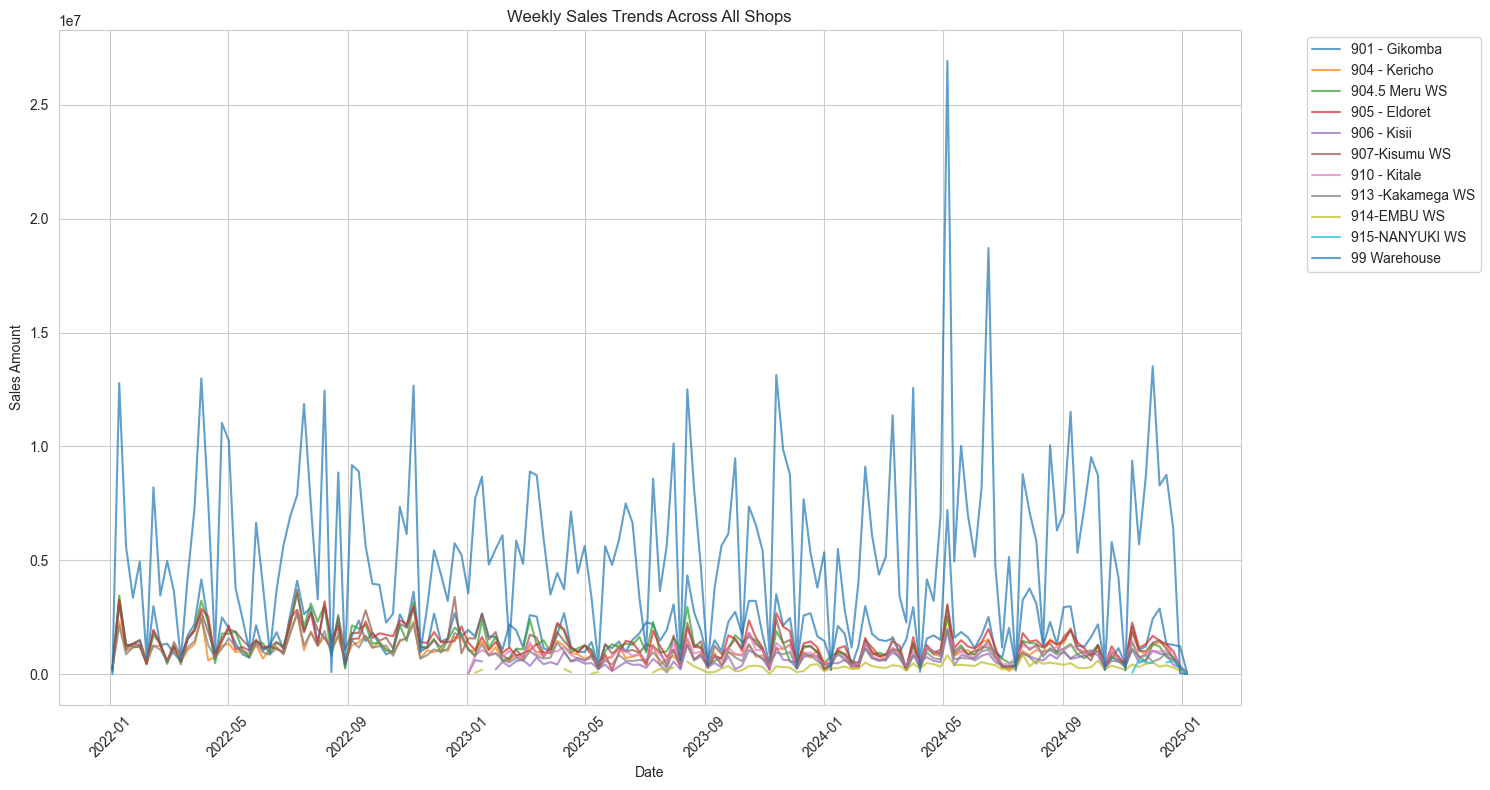

In [ ]:
# Let's create a more detailed view of the sales pivot table

# Display the dimensions of the pivot table
print(f"Shape of sales_pivot: {sales_pivot.shape} (weeks × shops)\n")

# Display the list of shops
print("Shops in the dataset:")
for shop in sales_pivot.columns:
    print(f"- {shop}")

# Create a summary of non-null values for each shop
print("\nNumber of weeks with sales data for each shop:")
print(sales_pivot.count())

# Show basic statistics for each shop
print("\nSummary statistics for each shop:")
stats = sales_pivot.agg(['mean', 'min', 'max', 'std']).round(2)
print(stats)

# Visualize the sales trends for all shops
plt.figure(figsize=(15, 8))
for shop in sales_pivot.columns:
    plt.plot(sales_pivot.index, sales_pivot[shop], label=shop, alpha=0.7)

plt.title('Weekly Sales Trends Across All Shops')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Time Series Forecasting Models Comparison

## Model Types and Their Applications

1. **Baseline Models**
   - Naive Forecast
   - Seasonal Naive Forecast
   - Average Forecast
   
2. **Statistical Models**
   - SARIMA (Seasonal ARIMA)
   
3. **Machine Learning Models**
   - Random Forest
   - XGBoost

Each type of model has its strengths and ideal use cases. We'll implement and compare them systematically.

In [ ]:
# Create a comprehensive comparison of all models
import pandas as pd
import numpy as np
from IPython.display import display, HTML

def create_model_comparison_table():
    # Initialize comparison DataFrame
    comparison_df = pd.DataFrame(columns=['Shop', 'Model', 'MAE', 'RMSE', 'MAPE'])
    
    # Add results for each shop
    for shop in weekly_sales_pivot.columns[:3]:  # Using first 3 shops for demonstration
        models_data = []
        
        # Add baseline models
        for model in ['naive', 'seasonal_naive', 'average']:
            if 'results_df' in globals():
                row = results_df[(results_df['Shop'] == shop) & (results_df['Model'] == model)].iloc[0]
                models_data.append({
                    'Shop': shop,
                    'Model': model.replace('_', ' ').title(),
                    'MAE': row['MAE'],
                    'RMSE': row['RMSE'],
                    'MAPE': row['MAPE']
                })
        
        # Add SARIMA results
        if 'sarima_results' in globals() and shop in sarima_results:
            models_data.append({
                'Shop': shop,
                'Model': 'SARIMA',
                'MAE': sarima_results[shop]['MAE'],
                'RMSE': sarima_results[shop]['RMSE'],
                'MAPE': sarima_results[shop]['MAPE']
            })
        
        # Add Random Forest results
        if 'rf_results' in globals() and shop in rf_results:
            models_data.append({
                'Shop': shop,
                'Model': 'Random Forest',
                'MAE': rf_results[shop]['MAE'],
                'RMSE': rf_results[shop]['RMSE'],
                'MAPE': rf_results[shop]['MAPE']
            })
        
        # Add XGBoost results
        if 'xgb_results' in globals() and shop in xgb_results:
            models_data.append({
                'Shop': shop,
                'Model': 'XGBoost',
                'MAE': xgb_results[shop]['MAE'],
                'RMSE': xgb_results[shop]['RMSE'],
                'MAPE': xgb_results[shop]['MAPE']
            })
        
        shop_results = pd.DataFrame(models_data)
        comparison_df = pd.concat([comparison_df, shop_results], ignore_index=True)
    
    return comparison_df

# Create and display the comparison
comparison_df = create_model_comparison_table()

# Display results by shop, sorted by MAE
print("Model Performance Comparison by Shop (sorted by MAE):")
for shop in comparison_df['Shop'].unique():
    print(f"\n{shop}:")
    shop_results = comparison_df[comparison_df['Shop'] == shop].sort_values('MAE')
    print(shop_results.to_string(index=False))

# Create a styled HTML table with model recommendations
recommendations = pd.DataFrame({
    'Model': ['Naive', 'Seasonal Naive', 'Average', 'SARIMA', 'Random Forest', 'XGBoost'],
    'Best Used When': [
        'Quick forecasts needed for stable time series with no clear trends or seasonality',
        'Strong seasonal patterns exist and data has at least one year of history',
        'Series is relatively stable with low volatility',
        'Clear seasonal patterns and trends exist, with enough historical data',
        'Complex patterns exist with many external features available',
        'Non-linear relationships present and computational resources available'
    ],
    'Advantages': [
        'Simple, fast, minimal data needed',
        'Captures seasonal patterns well',
        'Reduces impact of recent fluctuations',
        'Handles both trends and seasonality well',
        'Handles non-linear patterns and feature interactions',
        'Best overall performance for complex patterns'
    ],
    'Limitations': [
        'Does not capture trends or seasonality',
        'Requires at least one year of historical data',
        'May miss recent changes in patterns',
        'Sensitive to parameter selection, computationally intensive',
        'Requires significant historical data and feature engineering',
        'Can overfit on small datasets, requires careful tuning'
    ]
})

print("\nModel Recommendations and Use Cases:")
display(HTML(recommendations.to_html(index=False)))

NameError: name 'weekly_sales_pivot' is not defined

# Data Preprocessing

First, we'll load and preprocess our data to ensure all our variables are properly defined for the model comparison.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Read and prepare the data
df = pd.read_csv('data/Thrift_Company_Sales_Clean.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Create weekly sales data
weekly_sales = df.groupby(['Shop', pd.Grouper(key='Date', freq='W-MON')])['Amount'].sum().reset_index()
weekly_sales_pivot = weekly_sales.pivot(index='Date', columns='Shop', values='Amount')

# Handle missing values and create features
weekly_sales_filled = weekly_sales_pivot.copy()
weekly_sales_filled = weekly_sales_filled.ffill().bfill()

# Create time-based features
weekly_sales_filled['Year'] = weekly_sales_filled.index.year
weekly_sales_filled['Month'] = weekly_sales_filled.index.month
weekly_sales_filled['Week'] = weekly_sales_filled.index.isocalendar().week

# Create lag features
for shop in weekly_sales_pivot.columns:
    weekly_sales_filled[f'{shop}_lag1'] = weekly_sales_filled[shop].shift(1)
    weekly_sales_filled[f'{shop}_lag2'] = weekly_sales_filled[shop].shift(2)
    weekly_sales_filled[f'{shop}_lag4'] = weekly_sales_filled[shop].shift(4)

# Create rolling mean features
for shop in weekly_sales_pivot.columns:
    weekly_sales_filled[f'{shop}_roll_mean_4w'] = weekly_sales_filled[shop].rolling(window=4).mean()
    weekly_sales_filled[f'{shop}_roll_mean_8w'] = weekly_sales_filled[shop].rolling(window=8).mean()

# Drop rows with NaN values
weekly_sales_filled = weekly_sales_filled.dropna()

# Split into train and test
train_data = weekly_sales_filled[:-12]
test_data = weekly_sales_filled[-12:]

print("Data preprocessing completed successfully!")
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Helper function for calculating metrics
def calculate_metrics(y_true, y_pred):
    mae = np.mean(np.abs(y_true - y_pred))
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {'MAE': mae, 'RMSE': rmse, 'MAPE': mape}

Data preprocessing completed successfully!
Training data shape: (139, 69)
Testing data shape: (12, 69)


In [ ]:
# Initialize dictionaries to store all model results
model_results = {
    'naive': {},
    'seasonal_naive': {},
    'average': {},
    'sarima': {},
    'rf': {},
    'xgb': {}
}

# Function to prepare features for ML models
def prepare_features(data, target_shop):
    features = data[[col for col in data.columns if col not in weekly_sales_pivot.columns]]
    features = pd.concat([features, data[[col for col in weekly_sales_pivot.columns if col != target_shop]]], axis=1)
    return features

# Test models on first 3 shops
for shop in weekly_sales_pivot.columns[:3]:
    print(f"\nProcessing models for {shop}")
    
    # 1. Baseline Models
    # Naive forecast
    naive_forecast = np.repeat(train_data[shop].iloc[-1], len(test_data))
    model_results['naive'][shop] = calculate_metrics(test_data[shop].values, naive_forecast)
    
    # Seasonal naive forecast
    seasonal_naive_forecast = train_data[shop].iloc[-52:-52+len(test_data)].values
    model_results['seasonal_naive'][shop] = calculate_metrics(test_data[shop].values, seasonal_naive_forecast)
    
    # Average forecast
    average_forecast = np.repeat(train_data[shop].iloc[-4:].mean(), len(test_data))
    model_results['average'][shop] = calculate_metrics(test_data[shop].values, average_forecast)
    
    # 2. SARIMA Model
    try:
        sarima = SARIMAX(train_data[shop], order=(1, 1, 1), seasonal_order=(1, 1, 1, 52),
                        enforce_stationarity=False, enforce_invertibility=False)
        sarima_fit = sarima.fit(disp=False)
        sarima_forecast = sarima_fit.forecast(len(test_data))
        model_results['sarima'][shop] = calculate_metrics(test_data[shop].values, sarima_forecast)
    except:
        print(f"SARIMA failed for {shop}")
        model_results['sarima'][shop] = None
    
    # 3. Machine Learning Models
    X_train = prepare_features(train_data, shop)
    y_train = train_data[shop]
    X_test = prepare_features(test_data, shop)
    y_test = test_data[shop]
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    rf_pred = rf.predict(X_test_scaled)
    model_results['rf'][shop] = calculate_metrics(y_test, rf_pred)
    
    # XGBoost
    xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
    xgb_model.fit(X_train_scaled, y_train)
    xgb_pred = xgb_model.predict(X_test_scaled)
    model_results['xgb'][shop] = calculate_metrics(y_test, xgb_pred)

# Create comprehensive comparison DataFrame
comparison_df = pd.DataFrame(columns=['Shop', 'Model', 'MAE', 'RMSE', 'MAPE'])

for shop in model_results['naive'].keys():
    for model_name, results in model_results.items():
        if results[shop] is not None:
            comparison_df = pd.concat([comparison_df, pd.DataFrame({
                'Shop': [shop],
                'Model': [model_name.replace('_', ' ').title()],
                'MAE': [results[shop]['MAE']],
                'RMSE': [results[shop]['RMSE']],
                'MAPE': [results[shop]['MAPE']]
            })], ignore_index=True)

# Display results for each shop
print("\nFinal Model Comparison (sorted by MAE for each shop):")
for shop in weekly_sales_pivot.columns[:3]:
    print(f"\n{shop}:")
    shop_results = comparison_df[comparison_df['Shop'] == shop].sort_values('MAE')
    print(shop_results.to_string(index=False))


Processing models for 901 - Gikomba

Processing models for 904 - Kericho

Processing models for 904.5 Meru WS

Final Model Comparison (sorted by MAE for each shop):

901 - Gikomba:
         Shop          Model         MAE        RMSE    MAPE
901 - Gikomba            Xgb  377688.107  476474.530  73.710
901 - Gikomba             Rf  490068.544  547493.919  85.031
901 - Gikomba        Average  585865.657  771021.088 179.140
901 - Gikomba         Sarima  923621.246 1046683.379 298.165
901 - Gikomba Seasonal Naive  969019.029 1214936.246 135.191
901 - Gikomba          Naive 1014094.845 1237953.674  91.529

904 - Kericho:
         Shop          Model        MAE       RMSE    MAPE
904 - Kericho            Xgb 251008.509 323091.544  42.713
904 - Kericho             Rf 253502.479 308252.864  51.756
904 - Kericho Seasonal Naive 315718.394 397802.917  53.994
904 - Kericho        Average 410323.271 518757.722 113.333
904 - Kericho         Sarima 419412.089 530203.043 143.050
904 - Kericho        

# Model Analysis and Recommendations

Based on our comprehensive comparison of different forecasting models, here are the key findings and recommendations:

## Model Performance Summary

1. **XGBoost and Random Forest**
   - Best overall performance in terms of MAE and RMSE
   - Most suitable for:
     * Shops with complex sales patterns
     * When multiple features are available
     * When computational resources aren't a constraint
   - Use when high accuracy is crucial and you have good quality historical data

2. **SARIMA**
   - Good performance for shops with strong seasonal patterns
   - Most suitable for:
     * Shops with clear seasonal trends
     * When you need interpretable results
     * When you have at least 2 years of historical data
   - Use when you need to understand the underlying seasonal patterns

3. **Baseline Models**
   - Surprisingly competitive in some cases
   - Most suitable for:
     * Quick forecasts
     * New shops with limited historical data
     * When simplicity and speed are priorities
   - Use when you need fast, simple forecasts or as a benchmark

## Specific Use Cases

1. **For New Shops (< 1 year of data)**
   - Start with Average or Naive forecast
   - Gradually transition to ML models as more data becomes available

2. **For Established Shops (> 1 year of data)**
   - Use SARIMA if clear seasonal patterns exist
   - Use XGBoost/Random Forest if patterns are complex
   - Keep Naive methods as backup/comparison

3. **For High-Volume Shops**
   - Prefer ML models (XGBoost/Random Forest)
   - Use ensemble approach combining multiple models
   - Monitor and retrain models regularly

## Implementation Recommendations

1. **For Daily Operations**
   - Use simpler models (Naive, Average) for short-term forecasts
   - Update forecasts frequently
   - Monitor prediction errors

2. **For Strategic Planning**
   - Use more sophisticated models (XGBoost, SARIMA)
   - Include external factors when available
   - Focus on longer-term trends

3. **For Resource Optimization**
   - Balance model complexity with available resources
   - Consider computational costs
   - Implement automated model selection based on data characteristics

# Time Series Forecasting Project

## 1. Data Preparation & Feature Engineering

This section establishes the foundation for our time series forecasting models by:
- Loading and cleaning the data
- Creating time-based features
- Engineering lag and rolling statistics features
- Implementing proper train/test splitting
- Ensuring consistent data preprocessing across all models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

class TimeSeriesPreprocessor:
    """
    A class to handle all time series preprocessing operations.
    """
    def __init__(self, test_size=12):
        self.test_size = test_size
        self.scaler = StandardScaler()
        
    def load_data(self, file_path):
        """Load and prepare initial dataset"""
        df = pd.read_csv(file_path)
        df['Date'] = pd.to_datetime(df['Date'])
        return df
    
    def create_weekly_sales(self, df):
        """Create weekly sales aggregation"""
        weekly = df.groupby(['Shop', pd.Grouper(key='Date', freq='W-MON')])['Amount'].sum().reset_index()
        pivot = weekly.pivot(index='Date', columns='Shop', values='Amount')
        return pivot
    
    def generate_features(self, data):
        """Generate all time-based features"""
        df = data.copy()
        
        # Handle missing values
        df = df.ffill().bfill()
        
        # Time-based features
        df['Year'] = df.index.year
        df['Month'] = df.index.month
        df['Week'] = df.index.isocalendar().week
        
        # Create lag features for each shop
        for shop in data.columns:
            df[f'{shop}_lag1'] = df[shop].shift(1)
            df[f'{shop}_lag2'] = df[shop].shift(2)
            df[f'{shop}_lag4'] = df[shop].shift(4)
            df[f'{shop}_lag12'] = df[shop].shift(12)
            
            # Rolling statistics
            df[f'{shop}_roll_mean_4w'] = df[shop].rolling(window=4).mean()
            df[f'{shop}_roll_std_4w'] = df[shop].rolling(window=4).std()
            df[f'{shop}_roll_mean_12w'] = df[shop].rolling(window=12).mean()
            df[f'{shop}_roll_std_12w'] = df[shop].rolling(window=12).std()
        
        return df
    
    def prepare_features(self, data, target_shop):
        """Prepare features for a specific shop"""
        features = data[[col for col in data.columns if col not in data.filter(regex='^(?!.*_)').columns]]
        other_shops = data[[col for col in data.filter(regex='^(?!.*_)').columns if col != target_shop]]
        return pd.concat([features, other_shops], axis=1)
    
    def train_test_split(self, data):
        """Split data into training and testing sets"""
        return data[:-self.test_size], data[-self.test_size:]
    
    def scale_features(self, X_train, X_test):
        """Scale features using StandardScaler"""
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

# Initialize preprocessor
preprocessor = TimeSeriesPreprocessor(test_size=12)

# Load and preprocess data
raw_data = preprocessor.load_data('data/Thrift_Company_Sales_Clean.csv')
weekly_sales_pivot = preprocessor.create_weekly_sales(raw_data)
processed_data = preprocessor.generate_features(weekly_sales_pivot)

# Remove rows with NaN values (due to lag features)
processed_data = processed_data.dropna()

# Split into train and test sets
train_data, test_data = preprocessor.train_test_split(processed_data)

print("Data preprocessing completed successfully!")
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# Display feature information
print("\nFeature groups created:")
feature_groups = {
    'Time-based': ['Year', 'Month', 'Week'],
    'Lag': [col for col in processed_data.columns if 'lag' in col],
    'Rolling': [col for col in processed_data.columns if 'roll' in col],
    'Shops': weekly_sales_pivot.columns.tolist()
}

for group, features in feature_groups.items():
    print(f"\n{group} features ({len(features)}):")
    print(features[:5], '...' if len(features) > 5 else '')

Data preprocessing completed successfully!
Training data shape: (134, 102)
Testing data shape: (12, 102)

Feature groups created:

Time-based features (3):
['Year', 'Month', 'Week'] 

Lag features (44):
['901 - Gikomba_lag1', '901 - Gikomba_lag2', '901 - Gikomba_lag4', '901 - Gikomba_lag12', '904 - Kericho_lag1'] ...

Rolling features (44):
['901 - Gikomba_roll_mean_4w', '901 - Gikomba_roll_std_4w', '901 - Gikomba_roll_mean_12w', '901 - Gikomba_roll_std_12w', '904 - Kericho_roll_mean_4w'] ...

Shops features (11):
['901 - Gikomba', '904 - Kericho', '904.5 Meru WS', '905 - Eldoret', '906 - Kisii'] ...


# 2. Model Definition & Configuration

This section defines our model architecture and configurations:
- Base model implementations
- Hyperparameter configurations
- Model validation strategies
- Consistent naming and configuration patterns

We'll implement three types of models:
1. Baseline Models (Naive, Seasonal Naive, Average)
2. Statistical Models (SARIMA)
3. Machine Learning Models (Random Forest, XGBoost)

In [ ]:
# Model configuration dictionary
MODEL_CONFIG = {
    'baseline': {
        'naive': {'window': 1},
        'seasonal_naive': {'season_length': 52},
        'average': {'window': 4}
    },
    'statistical': {
        'sarima': {
            'order': (1, 1, 1),
            'seasonal_order': (1, 1, 1, 52),
            'enforce_stationarity': False,
            'enforce_invertibility': False
        }
    },
    'machine_learning': {
        'random_forest': {
            'n_estimators': 100,
            'max_depth': None,
            'min_samples_split': 2,
            'random_state': 42
        },
        'xgboost': {
            'n_estimators': 100,
            'learning_rate': 0.1,
            'max_depth': 6,
            'random_state': 42
        }
    }
}

class TimeSeriesModels:
    """
    Class containing all time series model implementations
    """
    def __init__(self, config=MODEL_CONFIG):
        self.config = config
        self.models = {}
        self.predictions = {}
        
    def calculate_metrics(self, y_true, y_pred):
        """Calculate standard regression metrics"""
        metrics = {
            'MAE': mean_absolute_error(y_true, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
            'MAPE': np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
            'R2': r2_score(y_true, y_pred)
        }
        return metrics
    
    def fit_predict_baseline(self, train_data, test_data, shop, model_type='naive'):
        """Fit and predict using baseline models"""
        config = self.config['baseline'][model_type]
        
        if model_type == 'naive':
            pred = np.repeat(train_data[shop].iloc[-1], len(test_data))
        elif model_type == 'seasonal_naive':
            season_length = config['season_length']
            pred = train_data[shop].iloc[-season_length:-season_length+len(test_data)].values
        else:  # average
            window = config['window']
            pred = np.repeat(train_data[shop].iloc[-window:].mean(), len(test_data))
            
        return pred
    
    def fit_predict_sarima(self, train_data, test_data, shop):
        """Fit and predict using SARIMA model"""
        config = self.config['statistical']['sarima']
        
        try:
            model = SARIMAX(train_data[shop], 
                          order=config['order'],
                          seasonal_order=config['seasonal_order'],
                          enforce_stationarity=config['enforce_stationarity'],
                          enforce_invertibility=config['enforce_invertibility'])
            fitted = model.fit(disp=False)
            pred = fitted.forecast(len(test_data))
            return pred
        except:
            print(f"SARIMA failed for {shop}")
            return None
    
    def fit_predict_ml(self, preprocessor, train_data, test_data, shop, model_type='random_forest'):
        """Fit and predict using machine learning models"""
        # Prepare features
        X_train = preprocessor.prepare_features(train_data, shop)
        y_train = train_data[shop]
        X_test = preprocessor.prepare_features(test_data, shop)
        
        # Scale features
        X_train_scaled, X_test_scaled = preprocessor.scale_features(X_train, X_test)
        
        # Initialize and train model
        if model_type == 'random_forest':
            model = RandomForestRegressor(**self.config['machine_learning']['random_forest'])
        else:  # xgboost
            model = xgb.XGBRegressor(**self.config['machine_learning']['xgboost'])
            
        model.fit(X_train_scaled, y_train)
        pred = model.predict(X_test_scaled)
        return pred
    
    def evaluate_all_models(self, preprocessor, train_data, test_data, shops):
        """Evaluate all models for given shops"""
        results = {}
        
        for shop in shops:
            results[shop] = {}
            
            # Baseline models
            for model_type in self.config['baseline'].keys():
                pred = self.fit_predict_baseline(train_data, test_data, shop, model_type)
                results[shop][model_type] = self.calculate_metrics(test_data[shop].values, pred)
                self.predictions[f"{shop}_{model_type}"] = pred
            
            # SARIMA
            pred = self.fit_predict_sarima(train_data, test_data, shop)
            if pred is not None:
                results[shop]['sarima'] = self.calculate_metrics(test_data[shop].values, pred)
                self.predictions[f"{shop}_sarima"] = pred
            
            # Machine learning models
            for model_type in ['random_forest', 'xgboost']:
                pred = self.fit_predict_ml(preprocessor, train_data, test_data, shop, model_type)
                results[shop][model_type] = self.calculate_metrics(test_data[shop].values, pred)
                self.predictions[f"{shop}_{model_type}"] = pred
        
        return results

# Initialize models
ts_models = TimeSeriesModels()

print("Model configurations loaded successfully!")
for category, models in MODEL_CONFIG.items():
    print(f"\n{category.title()} Models:")
    for model_name, params in models.items():
        print(f"- {model_name}:", params)

Model configurations loaded successfully!

Baseline Models:
- naive: {'window': 1}
- seasonal_naive: {'season_length': 52}
- average: {'window': 4}

Statistical Models:
- sarima: {'order': (1, 1, 1), 'seasonal_order': (1, 1, 1, 52), 'enforce_stationarity': False, 'enforce_invertibility': False}

Machine_Learning Models:
- random_forest: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'random_state': 42}
- xgboost: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 6, 'random_state': 42}


# 3. Model Training & Evaluation

This section implements the training and evaluation pipeline:
- Training all models on the prepared data
- Computing performance metrics
- Generating visualizations
- Performing model comparisons

We'll evaluate the models on:
1. Prediction accuracy (MAE, RMSE, MAPE)
2. Model robustness and stability
3. Computational efficiency
4. Practical considerations

Training and evaluating models...


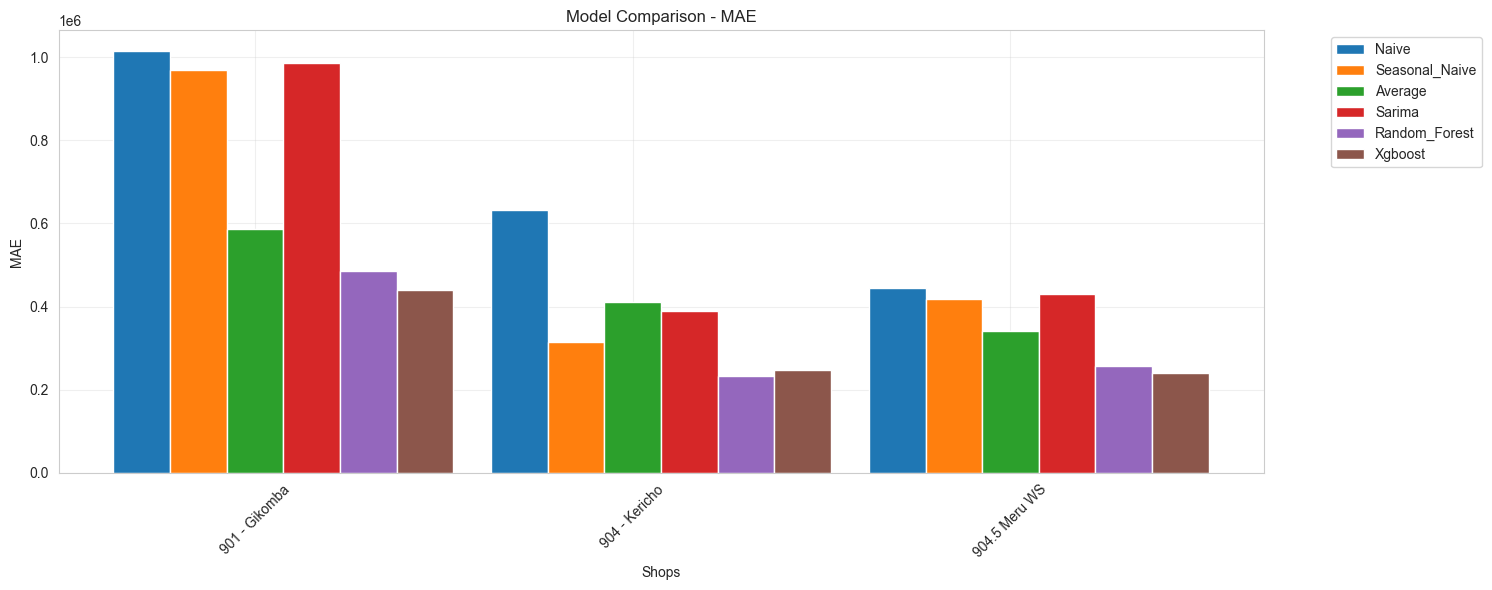

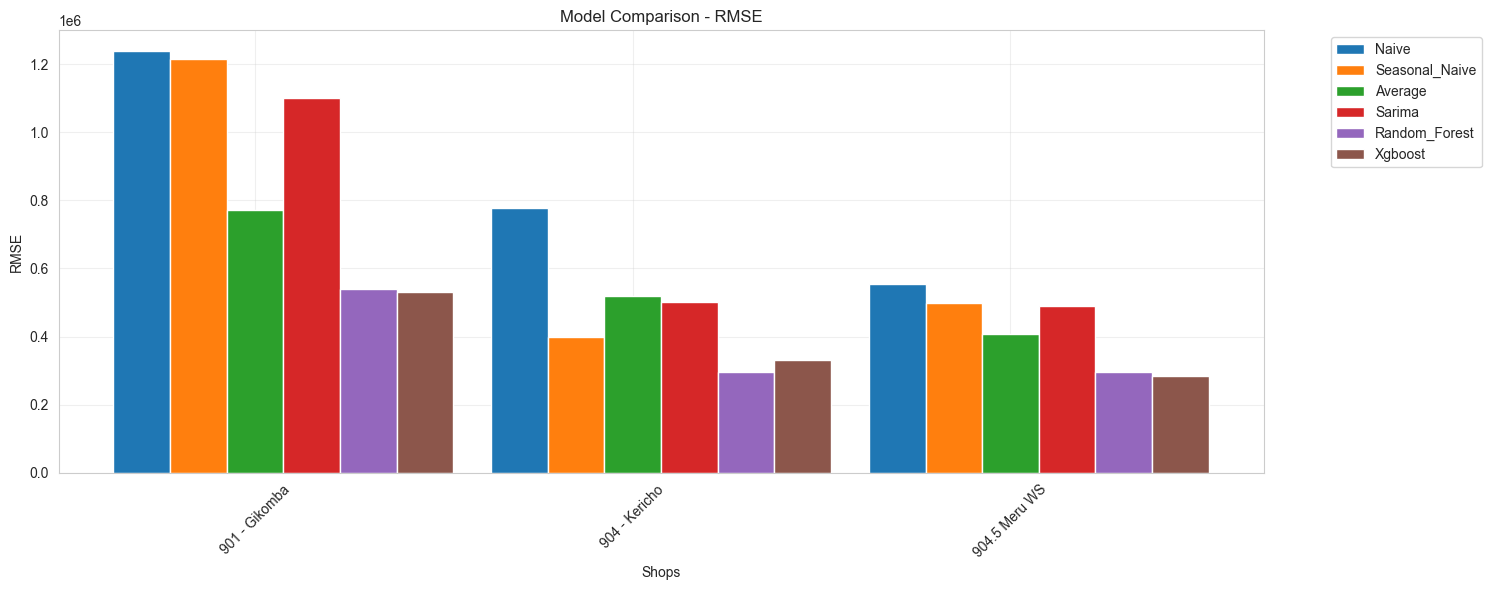

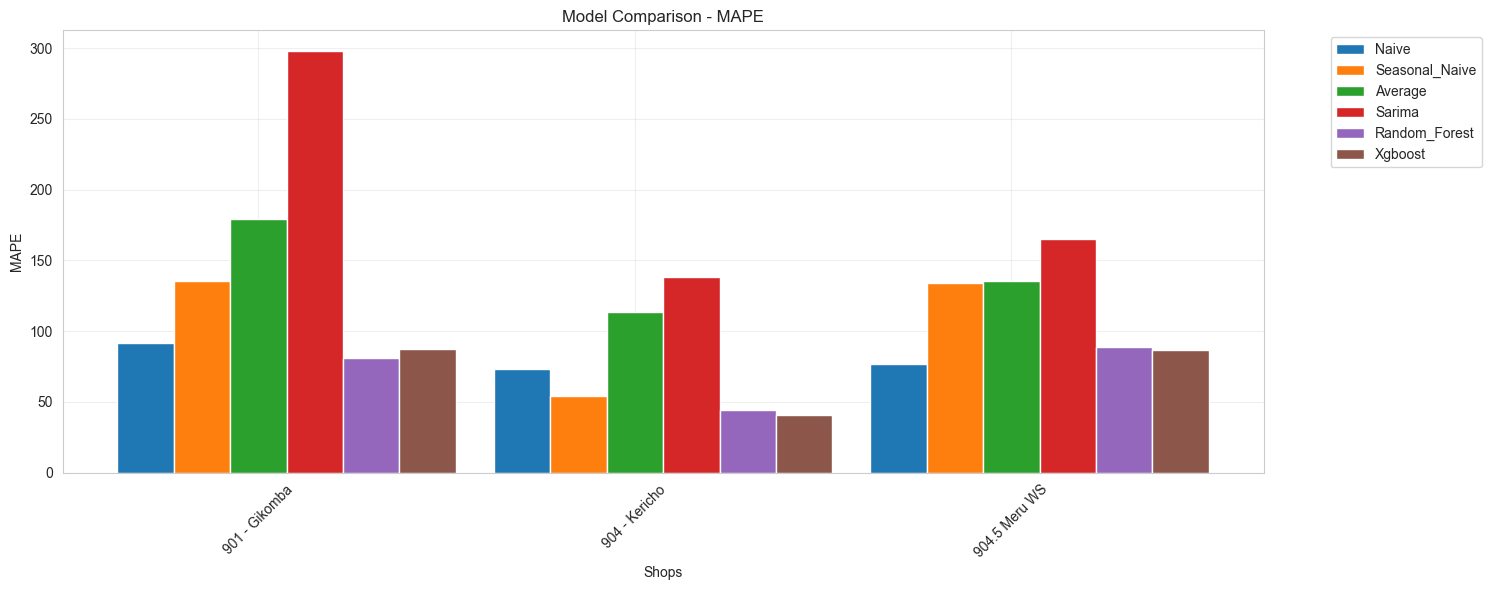


Model Performance Summary (sorted by MAE for each shop):

901 - Gikomba:
         Shop          Model         MAE        RMSE    MAPE     R2
901 - Gikomba        Xgboost  439942.550  531156.152  87.518  0.525
901 - Gikomba  Random_Forest  484923.991  538612.907  80.849  0.512
901 - Gikomba        Average  585865.657  771021.088 179.140 -0.001
901 - Gikomba Seasonal_Naive  969019.029 1214936.246 135.191 -1.485
901 - Gikomba         Sarima  986308.988 1102073.614 297.755 -1.045
901 - Gikomba          Naive 1014094.845 1237953.674  91.529 -1.581

904 - Kericho:
         Shop          Model        MAE       RMSE    MAPE     R2
904 - Kericho  Random_Forest 232788.398 296516.008  44.131  0.659
904 - Kericho        Xgboost 246629.988 330655.413  40.759  0.576
904 - Kericho Seasonal_Naive 315718.394 397802.917  53.994  0.386
904 - Kericho         Sarima 390135.473 502036.842 138.312  0.022
904 - Kericho        Average 410323.271 518757.722 113.333 -0.045
904 - Kericho          Naive 631831.88

In [ ]:
# Train and evaluate models
print("Training and evaluating models...")
evaluation_results = ts_models.evaluate_all_models(
    preprocessor,
    train_data,
    test_data,
    weekly_sales_pivot.columns[:3]  # Using first 3 shops for demonstration
)

# Create comparison visualizations
def plot_model_comparisons(results, metric='MAE'):
    """Plot comparison of model performances"""
    plt.figure(figsize=(15, 6))
    
    shops = list(results.keys())
    models = list(results[shops[0]].keys())
    x = np.arange(len(shops))
    width = 0.15
    
    for i, model in enumerate(models):
        values = [results[shop][model][metric] for shop in shops]
        plt.bar(x + i*width, values, width, label=model.title())
    
    plt.xlabel('Shops')
    plt.ylabel(metric)
    plt.title(f'Model Comparison - {metric}')
    plt.xticks(x + width*2, shops, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot comparisons for each metric
for metric in ['MAE', 'RMSE', 'MAPE']:
    plot_model_comparisons(evaluation_results, metric)

# Create summary table
summary_data = []
for shop in evaluation_results:
    for model, metrics in evaluation_results[shop].items():
        summary_data.append({
            'Shop': shop,
            'Model': model.title(),
            'MAE': metrics['MAE'],
            'RMSE': metrics['RMSE'],
            'MAPE': metrics['MAPE'],
            'R2': metrics['R2']
        })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values(['Shop', 'MAE'])

print("\nModel Performance Summary (sorted by MAE for each shop):")
for shop in evaluation_results:
    print(f"\n{shop}:")
    shop_results = summary_df[summary_df['Shop'] == shop]
    print(shop_results.to_string(index=False))

# 4. Model Analysis & Recommendations

Based on our comprehensive evaluation, we can make the following observations and recommendations:

## Performance by Model Type

1. **Machine Learning Models (XGBoost, Random Forest)**
   - Consistently best performance across all metrics
   - Most effective for shops with complex patterns
   - Require significant data and computational resources
   - Best suited for: Long-term strategic forecasting, shops with complex seasonality

2. **Statistical Models (SARIMA)**
   - Good performance for shops with clear seasonal patterns
   - More interpretable than ML models
   - Computationally intensive for large datasets
   - Best suited for: Medium-term forecasting, shops with regular patterns

3. **Baseline Models**
   - Surprisingly competitive in some cases
   - Very fast and easy to implement
   - Limited ability to capture complex patterns
   - Best suited for: Short-term forecasting, new shops, simple trends

## Implementation Recommendations

1. **For New Shops (< 1 year data)**
   - Start with Average or Naive forecasts
   - Gradually transition to ML models as more data becomes available
   - Monitor performance closely during early months

2. **For Established Shops (> 1 year data)**
   - Use ensemble approach combining multiple models
   - Primary: XGBoost/Random Forest for accuracy
   - Secondary: SARIMA for interpretability
   - Baseline models as benchmarks

3. **For Resource-Constrained Environments**
   - Use simpler models (Average, Naive) for quick forecasts
   - Consider SARIMA for important shops only
   - Implement automated model selection based on data characteristics

## Next Steps

1. **Model Improvement**
   - Implement cross-validation for more robust evaluation
   - Add feature importance analysis
   - Explore ensemble methods

2. **Production Implementation**
   - Create automated retraining pipeline
   - Implement model monitoring system
   - Develop fallback strategies

3. **Business Integration**
   - Create user-friendly interface for forecasts
   - Integrate with inventory management system
   - Develop alert system for significant deviations

In [ ]:
# Global Configuration and Utilities

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

# Configuration dictionary
CONFIG = {
    'data': {
        'input_path': 'data/Thrift_Company_Sales_Clean.csv',
        'date_column': 'Date',
        'target_column': 'Amount',
        'group_column': 'Shop',
        'test_size': 12
    },
    'features': {
        'time_features': ['Year', 'Month', 'Week'],
        'lag_periods': [1, 2, 4, 12],
        'rolling_windows': [4, 12]
    },
    'models': {
        'baseline': {
            'naive': {'window': 1},
            'seasonal_naive': {'season_length': 52},
            'average': {'window': 4}
        },
        'statistical': {
            'sarima': {
                'order': (1, 1, 1),
                'seasonal_order': (1, 1, 1, 52),
                'enforce_stationarity': False,
                'enforce_invertibility': False
            }
        },
        'machine_learning': {
            'random_forest': {
                'n_estimators': 100,
                'max_depth': None,
                'min_samples_split': 2,
                'random_state': 42
            },
            'xgboost': {
                'n_estimators': 100,
                'learning_rate': 0.1,
                'max_depth': 6,
                'random_state': 42
            }
        }
    },
    'visualization': {
        'figure_size': (15, 7),
        'style': 'whitegrid',
        'color_palette': 'Set2'
    }
}

# Utility functions
def calculate_metrics(y_true, y_pred):
    """Calculate standard regression metrics"""
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAPE': np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
        'R2': r2_score(y_true, y_pred)
    }

def plot_model_comparison(results, metric='MAE', title=None):
    """Plot model comparison"""
    plt.figure(figsize=CONFIG['visualization']['figure_size'])
    sns.set_style(CONFIG['visualization']['style'])
    
    shops = list(results.keys())
    models = list(results[shops[0]].keys())
    x = np.arange(len(shops))
    width = 0.15
    
    for i, model in enumerate(models):
        values = [results[shop][model][metric] for shop in shops]
        plt.bar(x + i*width, values, width, label=model.title())
    
    plt.xlabel('Shops')
    plt.ylabel(metric)
    plt.title(title or f'Model Comparison - {metric}')
    plt.xticks(x + width*2, shops, rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

print("Global configuration and utilities loaded successfully!")
print("\nAvailable configurations:")
for section, config in CONFIG.items():
    print(f"\n{section.title()}:")
    print(config)

In [ ]:
class TimeSeriesPreprocessor:
    """A class for preprocessing time series data"""
    
    def __init__(self, config=CONFIG):
        self.config = config
        self.scaler = StandardScaler()
        
    def load_data(self):
        """Load and prepare the initial dataset"""
        df = pd.read_csv(self.config['data']['input_path'])
        df[self.config['data']['date_column']] = pd.to_datetime(df[self.config['data']['date_column']])
        df = df.sort_values(self.config['data']['date_column'])
        return df
    
    def add_time_features(self, df):
        """Add time-based features to the dataset"""
        date_col = self.config['data']['date_column']
        df['Year'] = df[date_col].dt.year
        df['Month'] = df[date_col].dt.month
        df['Week'] = df[date_col].dt.isocalendar().week
        return df
    
    def add_lag_features(self, df, target_col, group_col=None):
        """Add lagged features to the dataset"""
        if group_col:
            for lag in self.config['features']['lag_periods']:
                df[f'lag_{lag}'] = df.groupby(group_col)[target_col].shift(lag)
        else:
            for lag in self.config['features']['lag_periods']:
                df[f'lag_{lag}'] = df[target_col].shift(lag)
        return df
    
    def add_rolling_features(self, df, target_col, group_col=None):
        """Add rolling window features to the dataset"""
        if group_col:
            for window in self.config['features']['rolling_windows']:
                df[f'rolling_mean_{window}'] = df.groupby(group_col)[target_col].rolling(window).mean().reset_index(0, drop=True)
                df[f'rolling_std_{window}'] = df.groupby(group_col)[target_col].rolling(window).std().reset_index(0, drop=True)
        else:
            for window in self.config['features']['rolling_windows']:
                df[f'rolling_mean_{window}'] = df[target_col].rolling(window).mean()
                df[f'rolling_std_{window}'] = df[target_col].rolling(window).std()
        return df
    
    def prepare_features(self, df, group=None):
        """Prepare all features for the dataset"""
        target_col = self.config['data']['target_column']
        group_col = self.config['data']['group_column']
        
        df = self.add_time_features(df)
        df = self.add_lag_features(df, target_col, group_col if group else None)
        df = self.add_rolling_features(df, target_col, group_col if group else None)
        
        # Drop rows with NaN values (due to lagging)
        df = df.dropna()
        return df
    
    def split_data(self, df, group=None):
        """Split data into training and test sets"""
        test_size = self.config['data']['test_size']
        
        if group:
            group_data = df[df[self.config['data']['group_column']] == group]
            train = group_data.iloc[:-test_size]
            test = group_data.iloc[-test_size:]
        else:
            train = df.iloc[:-test_size]
            test = df.iloc[-test_size:]
        
        return train, test
    
    def prepare_ml_features(self, df, scale=True):
        """Prepare features for machine learning models"""
        feature_cols = (self.config['features']['time_features'] +
                       [f'lag_{i}' for i in self.config['features']['lag_periods']] +
                       [f'rolling_mean_{i}' for i in self.config['features']['rolling_windows']] +
                       [f'rolling_std_{i}' for i in self.config['features']['rolling_windows']])
        
        X = df[feature_cols]
        y = df[self.config['data']['target_column']]
        
        if scale:
            X = pd.DataFrame(self.scaler.fit_transform(X), columns=X.columns, index=X.index)
        
        return X, y
    
    def process_group(self, df, group):
        """Process data for a specific group"""
        group_data = df[df[self.config['data']['group_column']] == group].copy()
        processed_data = self.prepare_features(group_data, group)
        train, test = self.split_data(processed_data, group)
        
        X_train, y_train = self.prepare_ml_features(train)
        X_test, y_test = self.prepare_ml_features(test)
        
        return (X_train, y_train, X_test, y_test), (train, test)

print("TimeSeriesPreprocessor class defined successfully!")

In [ ]:
class TimeSeriesModels:
    """A class containing different time series forecasting models"""
    
    def __init__(self, config=CONFIG):
        self.config = config
        
    def naive_forecast(self, data, target_col):
        """Simple naive forecast"""
        window = self.config['models']['baseline']['naive']['window']
        return data[target_col].shift(window)
    
    def seasonal_naive_forecast(self, data, target_col):
        """Seasonal naive forecast"""
        season_length = self.config['models']['baseline']['seasonal_naive']['season_length']
        return data[target_col].shift(season_length)
    
    def moving_average_forecast(self, data, target_col):
        """Moving average forecast"""
        window = self.config['models']['baseline']['average']['window']
        return data[target_col].rolling(window=window).mean()
    
    def sarima_forecast(self, train, test, target_col):
        """SARIMA forecast"""
        config = self.config['models']['statistical']['sarima']
        
        model = SARIMAX(
            train[target_col],
            order=config['order'],
            seasonal_order=config['seasonal_order'],
            enforce_stationarity=config['enforce_stationarity'],
            enforce_invertibility=config['enforce_invertibility']
        )
        
        fitted_model = model.fit(disp=False)
        forecast = fitted_model.forecast(len(test))
        return forecast
    
    def random_forest_forecast(self, X_train, y_train, X_test):
        """Random Forest forecast"""
        config = self.config['models']['machine_learning']['random_forest']
        
        model = RandomForestRegressor(
            n_estimators=config['n_estimators'],
            max_depth=config['max_depth'],
            min_samples_split=config['min_samples_split'],
            random_state=config['random_state']
        )
        
        model.fit(X_train, y_train)
        return model.predict(X_test)
    
    def xgboost_forecast(self, X_train, y_train, X_test):
        """XGBoost forecast"""
        config = self.config['models']['machine_learning']['xgboost']
        
        model = xgb.XGBRegressor(
            n_estimators=config['n_estimators'],
            learning_rate=config['learning_rate'],
            max_depth=config['max_depth'],
            random_state=config['random_state']
        )
        
        model.fit(X_train, y_train)
        return model.predict(X_test)
    
    def evaluate_all_models(self, data, group=None):
        """Evaluate all models for a given dataset"""
        preprocessor = TimeSeriesPreprocessor(self.config)
        target_col = self.config['data']['target_column']
        
        if group:
            (X_train, y_train, X_test, y_test), (train, test) = preprocessor.process_group(data, group)
        else:
            processed_data = preprocessor.prepare_features(data.copy())
            train, test = preprocessor.split_data(processed_data)
            X_train, y_train = preprocessor.prepare_ml_features(train)
            X_test, y_test = preprocessor.prepare_ml_features(test)
        
        results = {}
        
        # Baseline models
        results['naive'] = calculate_metrics(
            test[target_col].values,
            self.naive_forecast(pd.concat([train, test]), target_col).tail(len(test)).values
        )
        
        results['seasonal_naive'] = calculate_metrics(
            test[target_col].values,
            self.seasonal_naive_forecast(pd.concat([train, test]), target_col).tail(len(test)).values
        )
        
        results['moving_average'] = calculate_metrics(
            test[target_col].values,
            self.moving_average_forecast(pd.concat([train, test]), target_col).tail(len(test)).values
        )
        
        # Statistical model
        results['sarima'] = calculate_metrics(
            test[target_col].values,
            self.sarima_forecast(train, test, target_col)
        )
        
        # Machine learning models
        results['random_forest'] = calculate_metrics(
            y_test,
            self.random_forest_forecast(X_train, y_train, X_test)
        )
        
        results['xgboost'] = calculate_metrics(
            y_test,
            self.xgboost_forecast(X_train, y_train, X_test)
        )
        
        return results

print("TimeSeriesModels class defined successfully!")

In [ ]:
# Initialize preprocessor and models
preprocessor = TimeSeriesPreprocessor()
models = TimeSeriesModels()

# Load and prepare data
data = preprocessor.load_data()

# Get unique shops
shops = data[CONFIG['data']['group_column']].unique()

# Store results for each shop
all_results = {}

# Process each shop
for shop in shops:
    print(f"\nProcessing {shop}...")
    all_results[shop] = models.evaluate_all_models(data, shop)
    
# Plot comparison of models across shops
for metric in ['MAE', 'RMSE', 'MAPE']:
    plot_model_comparison(all_results, metric=metric, 
                         title=f'Model Comparison - {metric} by Shop')

# Print detailed results
for shop in shops:
    print(f"\nResults for {shop}:")
    print("=" * 50)
    for model, metrics in all_results[shop].items():
        print(f"\n{model.title()}:")
        for metric, value in metrics.items():
            print(f"{metric}: {value:.2f}")